Single experiment

Input file temporarily saved at /home/ec2-user/Kitana_e2e/Kitana-e2e/tmp/dev.table_entity_linking.json
Ensuring container directory exists: docker exec c3138415edf0 bash -c mkdir -p /TURL/data/kitana/country/buyer/2
Output from creating directory: 
Error (if any): 
Copying file into container with command: docker cp /home/ec2-user/Kitana_e2e/Kitana-e2e/tmp/dev.table_entity_linking.json c3138415edf0:/TURL/data/kitana/country/buyer/2/dev.table_entity_linking.json
Output from copying file: 
Error (if any): 
File successfully copied into container and verified.
Running command: docker exec c3138415edf0 bash -c source /root/miniconda3/etc/profile.d/conda.sh && conda activate TURL_origin && cd /TURL/ && CUDA_VISIBLE_DEVICES=0 python run_table_EL_finetuning.py --data_dir=/TURL/data/kitana/country/buyer/2 --output_dir=output/EL/v2/0/model_v1_table_0.2_0.6_0.7_10000_1e-4_candnew_0_adam --model_name_or_path=output/EL/v2/0/model_v1_table_0.2_0.6_0.7_10000_1e-4_candnew_0_adam --model_type=EL --do_

Registering sellers: 100%|██████████| 3/3 [00:00<00:00, 69.57it/s]


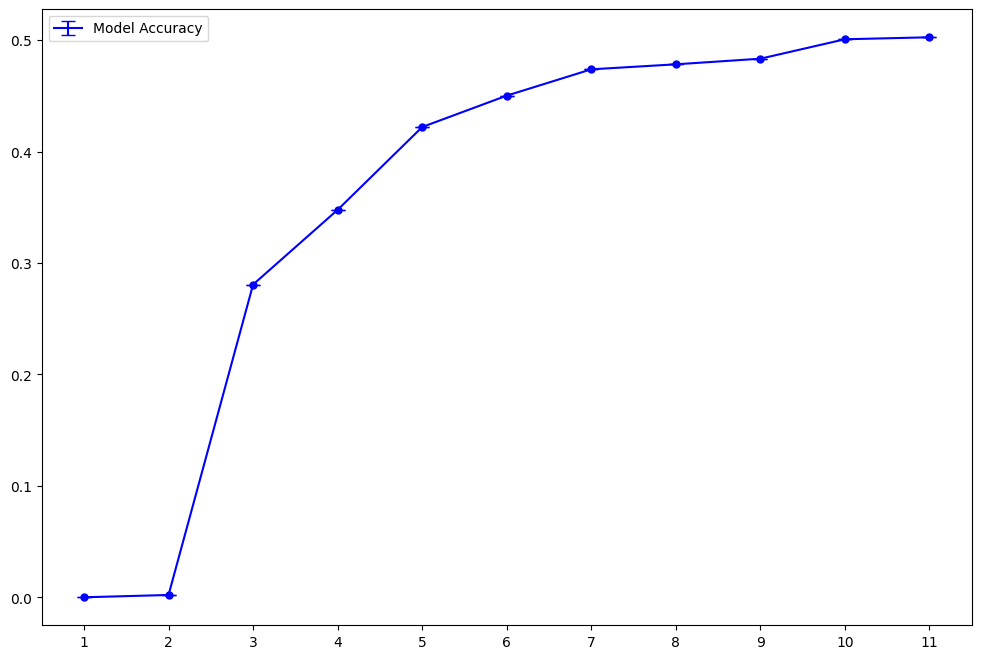


Experiment Results:
Final Accuracy: [0.0, 0.0020592136493452484, 0.28065407381793206, 0.3476843366754817, 0.42199686300898664, 0.4501598824445612, 0.47378977092043706, 0.4782746642453888, 0.48332305658278796, 0.5007556749213625, 0.5025430760307682]
Time Taken: 0.30 seconds
Number of Features Found: 10


In [1]:
from search_engine.experiment import ScaledExperiment
from search_engine.config import get_config, Config, DataConfig, SearchConfig, ExperimentConfig, LoggingConfig
from search_engine.entity_linking.el_test import DBpediaLinker, TURLExecuter, PredictionEntityConverter
import os


def main():
    config = get_config()
    # Instantiate the DBpediaLinker class
    linker = DBpediaLinker(output_dir_base="el_data/country/buyer/2/", auto_load_meta_data=True)
    input_data = {
        "data/country/buyer/buyer_gini.csv": ["country"]
    }
    percentage_list = [2]
    if not os.path.exists(linker.output_dir_base):
        linker.batch_link(input_data=input_data, percentage_list=percentage_list)


    executer = TURLExecuter()
    executer.prepare_input_file()
    executer.run_container_evaluation()
    buyer_predictions = executer.read_predictions()
    
    converter = PredictionEntityConverter(buyer_predictions, linker, "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country/buyer/2/structured_data.json")
    print("converted: ", converter.get_converted())
    converter.apply_convertion(input_data=input_data, output_dir="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country/buyer/2")

    input_data = {
        #"data/country/seller/seller_fifa.csv": ["country"],
        "data/country/seller/seller_happiness.csv": ["country"],
        "data/country/seller/seller_life.csv": ["country"],
        #"data/country/seller/seller_pollution.csv": ["country"],
        "data/country/seller/seller_suicide.csv": ["country"]
    }
    percentage_list = [2,2,2]
    linker.output_dir_base = "el_data/country/seller/2/"
    if not os.path.exists(linker.output_dir_base):
        linker.batch_link(input_data=input_data, percentage_list=percentage_list)

    executer = TURLExecuter(
        input_data="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country/seller/2/structured_data.json",
        host_input_dir="/TURL/data/kitana/country/seller/2"
    )
    executer.prepare_input_file()
    executer.run_container_evaluation()
    seller_predictions = executer.read_predictions()

    converter = PredictionEntityConverter(seller_predictions, linker, "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country/seller/2/structured_data.json")
    print("converted seller: ", converter.get_converted())
    converter.apply_convertion(input_data=input_data, output_dir="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country/seller/2/")
    
    experiment = ScaledExperiment(config)
    results = experiment.run()
    
    print("\nExperiment Results:")
    print(f"Final Accuracy: {results['accuracy']}")
    print(f"Time Taken: {results['time_taken']:.2f} seconds")
    print(f"Number of Features Found: {len(results['augplan'])}")

if __name__ == "__main__":
    main()

Registering sellers: 100%|██████████| 3/3 [00:00<00:00, 72.32it/s]


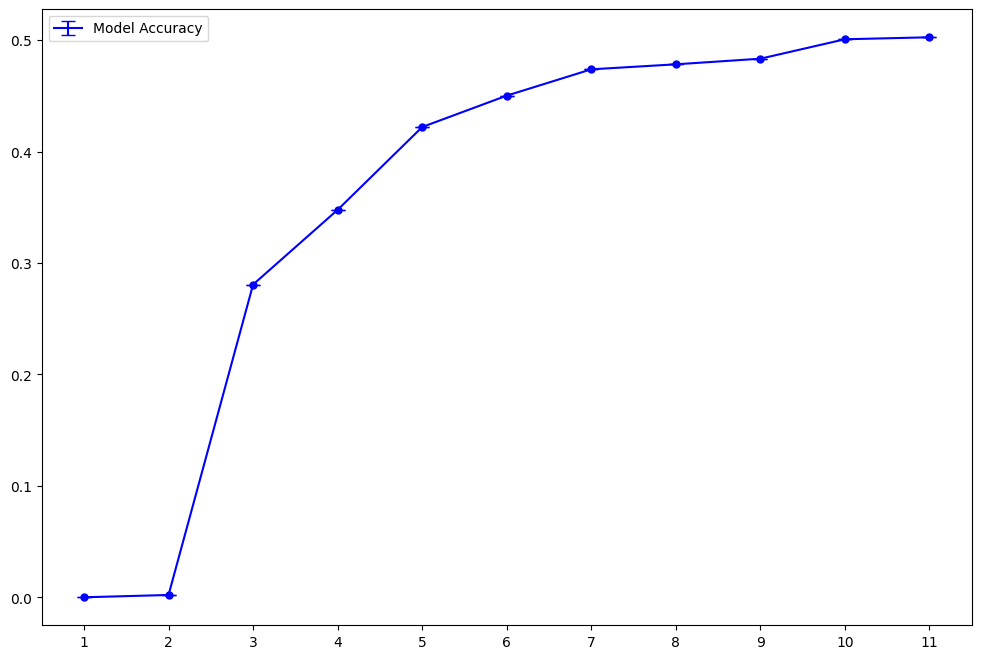

Registering sellers: 100%|██████████| 3/3 [00:00<00:00, 72.88it/s]


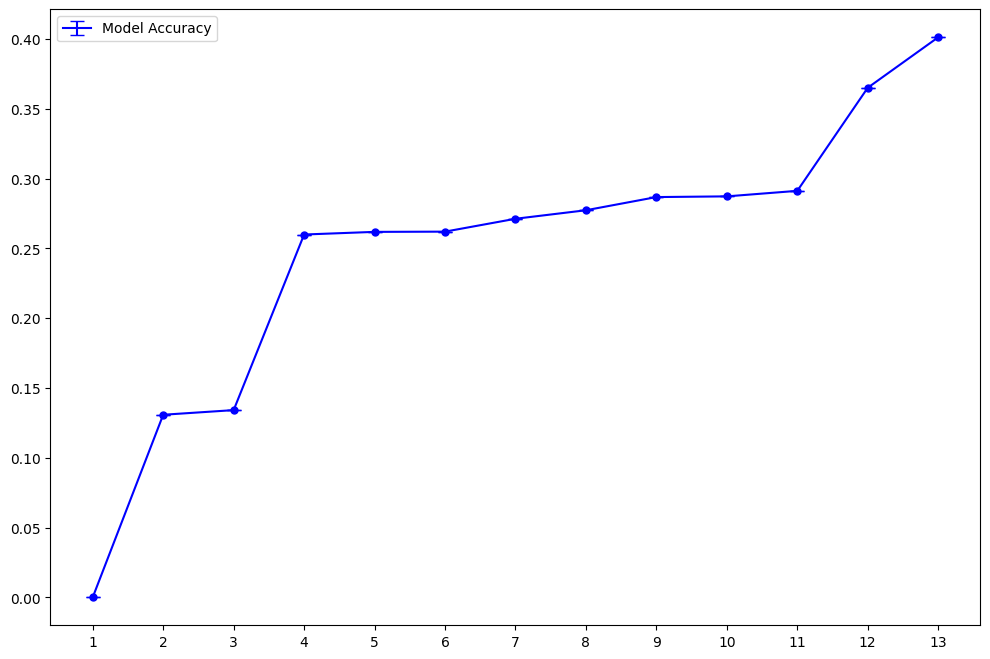

[{'augplan': [(1, 1, 'seller_life', 'country_seller_life_year'), (0, 2, 'seller_happiness', 'country_seller_happiness_SD of Ladder'), (1, 3, 'seller_life', 'country_seller_life_ HIV/AIDS'), (0, 4, 'seller_happiness', 'country_seller_happiness_Positive affect'), (1, 5, 'seller_life', 'country_seller_life_percentage expenditure'), (0, 6, 'seller_happiness', 'country_seller_happiness_Generosity'), (2, 7, 'seller_suicide', 'country_seller_suicide_year'), (0, 8, 'seller_happiness', 'country_seller_happiness_Ladder'), (0, 9, 'seller_happiness', 'country_seller_happiness_Negative affect'), (1, 10, 'seller_life', 'country_seller_life_infant deaths')], 'accuracy': [0.0, 0.0020592136493452484, 0.28065407381793206, 0.3476843366754817, 0.42199686300898664, 0.4501598824445612, 0.47378977092043706, 0.4782746642453888, 0.48332305658278796, 0.5007556749213625, 0.5025430760307682], 'time_taken': 0.3034951686859131}, {'augplan': [(1, 1, 'seller_life', 'country_seller_life_year'), (0, 2, 'seller_happines

In [2]:
from search_engine.utils.plot_utils import plot_whiskers
from search_engine.config import get_config, Config, DataConfig, SearchConfig, ExperimentConfig, LoggingConfig

def run_multiple_experiment():
    config1 = Config(
        search=SearchConfig(iterations=10),
        data=DataConfig(
            directory_path='data/country/seller',
            buyer_csv='data/country/buyer/buyer_gini.csv',
            join_keys=[['country']],
            target_feature='value',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )

    config2 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='el_data/country/seller/2',
            buyer_csv='el_data/country/buyer/2/buyer_gini.csv',
            join_keys=[['country']],
            target_feature='value',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )
    experiments = [
        ("origin-experiment", config1),
        ("TURL-experiment", config2)
    ]
    origin_experiment = ScaledExperiment(experiments[0][1])
    turl_experiment = ScaledExperiment(experiments[1][1])
    
    origin_experiment_result = origin_experiment.run()
    turl_experiment_result = turl_experiment.run()

    return [origin_experiment_result,origin_experiment_result]

print(run_multiple_experiment())

Registering sellers: 100%|██████████| 3/3 [00:00<00:00, 72.72it/s]


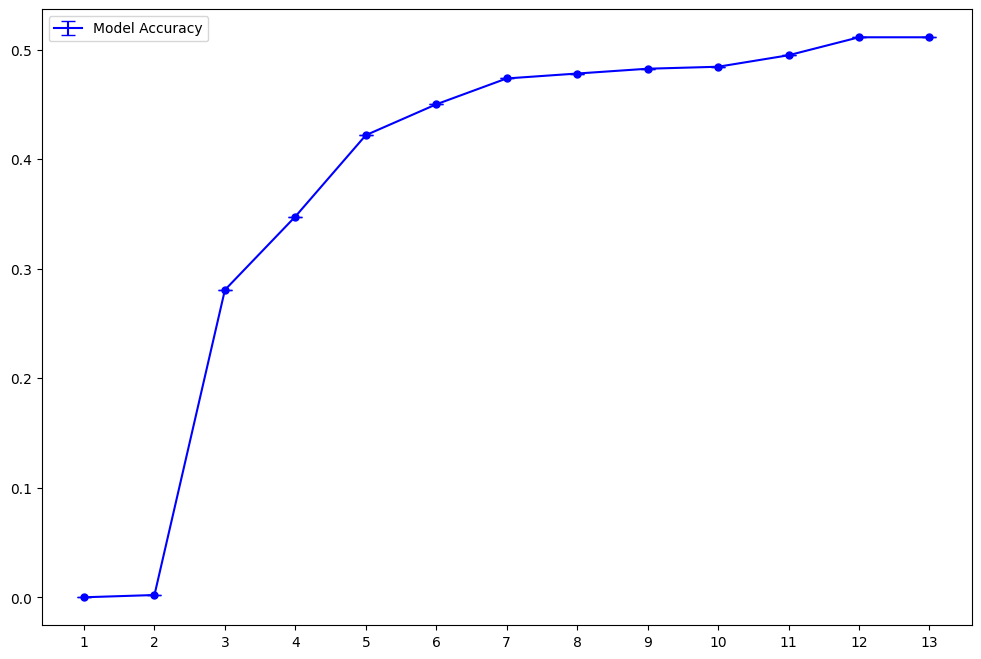

Registering sellers: 100%|██████████| 3/3 [00:00<00:00, 69.53it/s]


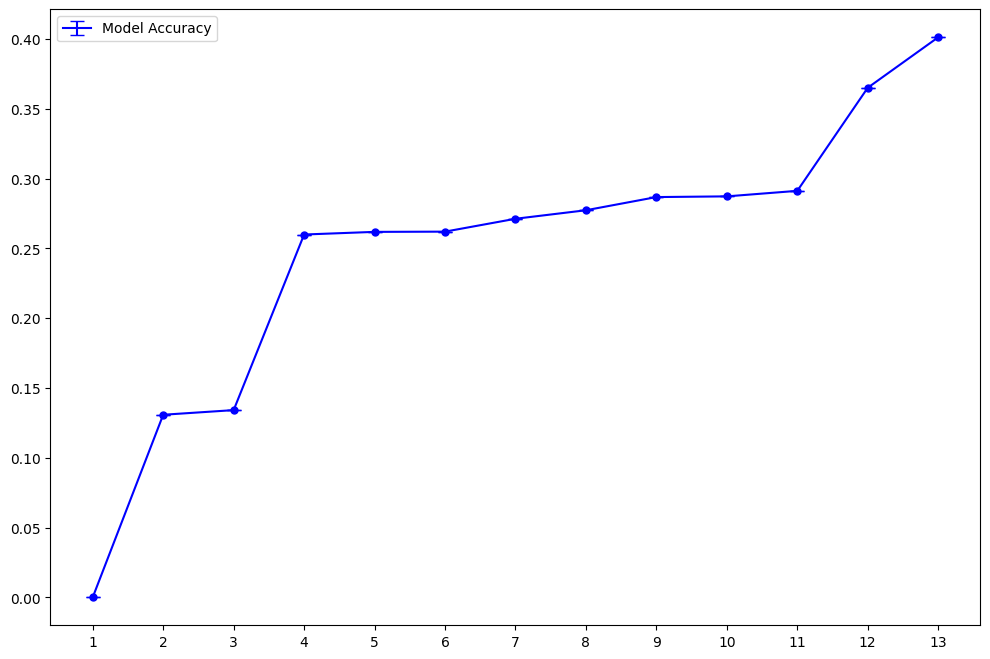

Loading sellers:   0%|          | 0/7 [00:00<?, ?it/s]

Seller: countries of the world's join key: Country does not have any intersection with the buyer's join key
Seller: countries of the world does not have the corresponding join keys
Seller: country-wise-average's join key: Country does not have any intersection with the buyer's join key
Seller: country-wise-average does not have the corresponding join keys


Registering sellers: 100%|██████████| 5/5 [00:00<00:00, 59.83it/s]


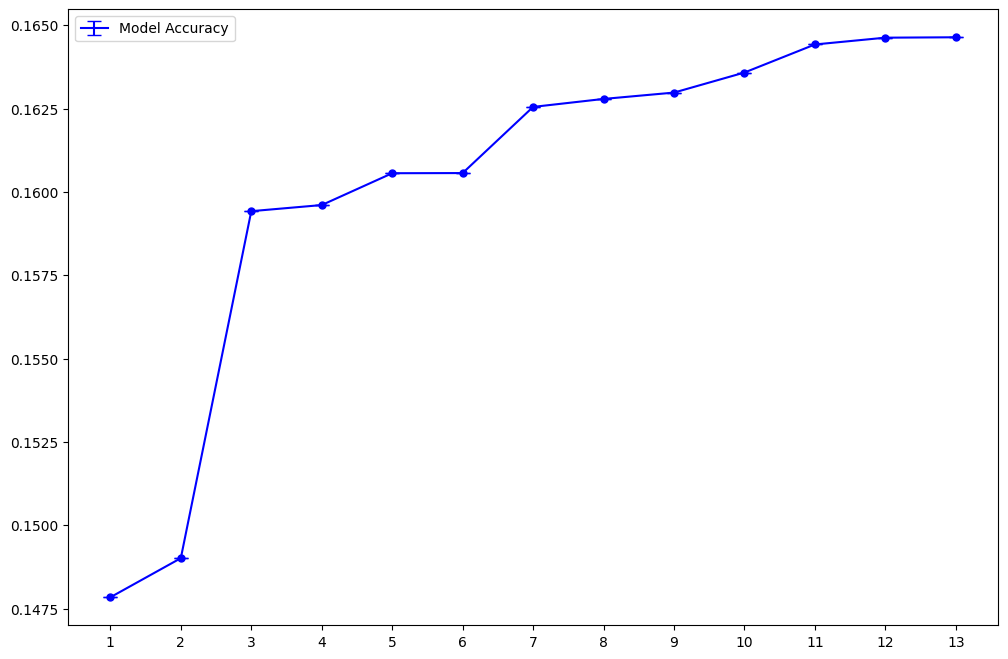

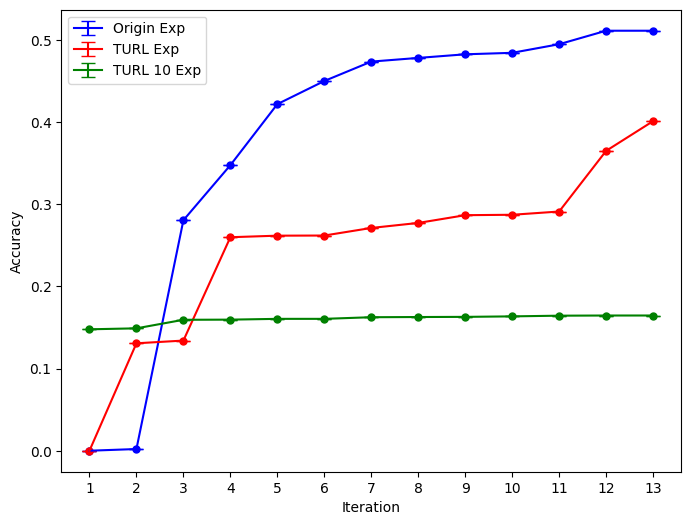

[{'augplan': [(1, 1, 'seller_life', 'country_seller_life_year'), (0, 2, 'seller_happiness', 'country_seller_happiness_SD of Ladder'), (1, 3, 'seller_life', 'country_seller_life_ HIV/AIDS'), (0, 4, 'seller_happiness', 'country_seller_happiness_Positive affect'), (1, 5, 'seller_life', 'country_seller_life_percentage expenditure'), (0, 6, 'seller_happiness', 'country_seller_happiness_Generosity'), (2, 7, 'seller_suicide', 'country_seller_suicide_year'), (0, 8, 'seller_happiness', 'country_seller_happiness_Social support'), (1, 9, 'seller_life', 'country_seller_life_Polio'), (1, 10, 'seller_life', 'country_seller_life_Diphtheria '), (1, 11, 'seller_life', 'country_seller_life_Hepatitis B'), (1, 12, 'seller_life', 'country_seller_life_Schooling')], 'accuracy': [0.0, 0.0020592136493452484, 0.28065407381793206, 0.3476843366754817, 0.42199686300898664, 0.4501598824445612, 0.47378977092043706, 0.4782746642453888, 0.4826683507014762, 0.4844727100501338, 0.4949603044719254, 0.5113831295985223, 0.

In [7]:
import pandas as pd
import numpy as np
def plot_two_experiments_results_max(
    origin_result: dict, 
    turl_result: dict, 
    turl_10_result: dict,
    output_fig="experiment_comparison.png"
):
    acc1 = origin_result["accuracy"]  # list
    max_len = max(len(acc1))
    acc1_padded = list(acc1) + [np.nan] * (max_len - len(acc1))

    iterations = range(1, max_len + 1)
    df = pd.DataFrame({
        "iteration": iterations,
        "origin_exp": acc1_padded,

    })


    from search_engine.utils.plot_utils import plot_whiskers
    plot_whiskers(
        df=df,
        x_col="iteration", 
        y_cols=["origin_exp"],
        labels=["Origin Exp"],
        colors=["blue"],
        linestyles=["-"],
        figsize=(8, 6),
        resultname=output_fig,
        xlabel="Iteration",
        ylabel="Accuracy"
    )

    return df

def run_multiple_experiment():
    config1 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='data/company_datasets/seller',
            buyer_csv='data/company_datasets/buyer/company_employee_details.csv',
            join_keys=[['company']],
            target_feature='value',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )

    # Run exps
    company = ScaledExperiment(config1)
    
    company_experiment_result = company.run()

    # Return as list
    results_list = [company_experiment_result]

    # plot
    plot_two_experiments_results_max(
        origin_result=company_experiment_result,
        output_fig="comparison_whiskers.png"
    )

    return results_list

if __name__ == "__main__":
    final_results = run_multiple_experiment()
    print(final_results)

In [3]:
def build_input_data(folder_path: str, columns: list) -> dict:
    input_data = {}
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            csv_path = os.path.join(folder_path, file)
            input_data[csv_path] = columns
    return input_data

print(build_input_data("data/country_extend/seller", ["country"]))
print(len(build_input_data("data/country_extend/seller", ["country"])))

{'data/country_extend/seller/Cost_of_Living_Index_by_Country_2024.csv': ['country'], 'data/country_extend/seller/countries of the world.csv': ['country'], 'data/country_extend/seller/country_vaccinations.csv': ['country'], 'data/country_extend/seller/country_wise_latest.csv': ['country'], 'data/country_extend/seller/country-wise-average.csv': ['country'], 'data/country_extend/seller/Country.csv': ['country'], 'data/country_extend/seller/fifa_ranking.csv': ['country'], 'data/country_extend/seller/Final.csv': ['country'], 'data/country_extend/seller/GCB2022v27_MtCO2_flat.csv': ['country'], 'data/country_extend/seller/global air pollution dataset.csv': ['country'], 'data/country_extend/seller/global-data-on-sustainable-energy (1).csv': ['country'], 'data/country_extend/seller/GlobalWeatherRepository.csv': ['country'], 'data/country_extend/seller/Life Expectancy Data.csv': ['country'], 'data/country_extend/seller/Petrol Dataset June 20 2022.csv': ['country'], 'data/country_extend/seller/po

In [4]:
def print_csv_head(folder_path: str, num_rows: int = 5):

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(file_path)
                print(f"\n===== {file} (First {num_rows} rows) =====")
                print(df.head(num_rows))
            except Exception as e:
                print(f"Error reading {file}: {e}")

print_csv_head("data/country_extend/buyer")

Error reading master.csv: name 'pd' is not defined


In [7]:
import json

def print_json_length(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        if isinstance(data, list):
            print("Length of the list:", len(data))

    except FileNotFoundError:
        print("File not found:", json_file_path)
    except json.JSONDecodeError:
        print("Failed to decode JSON from the file.")
    except Exception as e:
        print("An error occurred:", str(e))

def get_selected(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        if isinstance(data, dict):
            return data
    except Exception as e:
        print("An error occurred:", str(e))

print_json_length("/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/10/structured_data.json")


Length of the list: 8


In [3]:
from search_engine.experiment import ScaledExperiment
from search_engine.config import get_config, Config, DataConfig, SearchConfig, ExperimentConfig, LoggingConfig
from search_engine.entity_linking.el_test import DBpediaLinker, TURLExecuter, PredictionEntityConverter
import os
import json

def build_input_data(folder_path: str, columns: list) -> dict:
    input_data = {}
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            csv_path = os.path.join(folder_path, file)
            input_data[csv_path] = columns
    return input_data
def print_json_length(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        if isinstance(data, list):
            print("Length of the list:", len(data))

    except FileNotFoundError:
        print("File not found:", json_file_path)
    except json.JSONDecodeError:
        print("Failed to decode JSON from the file.")
    except Exception as e:
        print("An error occurred:", str(e))

def get_selected(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        if isinstance(data, dict):
            return data
    except Exception as e:
        print("An error occurred:", str(e))
def main():
    config = get_config()
    # Instantiate the DBpediaLinker class
    linker = DBpediaLinker(output_dir_base="el_data/country_extend/buyer/true/10/", auto_load_meta_data=True)
    input_data = {
        "data/country_extend/buyer/master.csv": ["Country"]
    }
    percentage_list = [10]
    if not os.path.exists(linker.output_dir_base):
        linker.batch_link(input_data=input_data, percentage_list=percentage_list)


    executer = TURLExecuter(
        input_data = "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/true/10/structured_data.json",
        host_input_dir="/TURL/data/kitana/country_extend/buyer/10",
        output_path=f"/home/ec2-user/TURL/data/kitana/country_extend/buyer/10/predictions.txt"
    )
    executer.prepare_input_file()
    executer.run_container_evaluation()
    buyer_predictions = executer.read_predictions()
    
    converter = PredictionEntityConverter(buyer_predictions, linker, "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/true/10/structured_data.json")
    print("converted seller: ", converter.get_converted())
    print("selected: ",get_selected("el_data/country_extend/buyer/true/10/selected_input.json"))
    converter.apply_convertion(input_data=get_selected("el_data/country_extend/buyer/true/10/selected_input.json"), output_dir="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/10")

    input_data = build_input_data("data/country_extend/seller", ["Country"])
    percentage_list = [10] * len(input_data)
    linker.output_dir_base = "el_data/country_extend/seller/10/"
    if not os.path.exists(linker.output_dir_base):
        linker.batch_link(input_data=input_data, percentage_list=percentage_list)

    executer = TURLExecuter(
        input_data="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/10/structured_data.json",
        host_input_dir="/TURL/data/kitana/country_extend/seller/10",
        output_path=f"/home/ec2-user/TURL/data/kitana/country_extend/seller/10/predictions.txt"
    )
    executer.prepare_input_file()
    executer.run_container_evaluation()
    seller_predictions = executer.read_predictions()

    converter = PredictionEntityConverter(seller_predictions, linker, "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/10/structured_data.json")
    print("converted seller: ", converter.get_converted())
    print("selected: ",get_selected("el_data/country_extend/seller/10/selected_input.json"))
    converter.apply_convertion(input_data=get_selected("el_data/country_extend/seller/10/selected_input.json"), output_dir="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/10/")


if __name__ == "__main__":
    main()

Input file temporarily saved at /home/ec2-user/Kitana_e2e/Kitana-e2e/tmp/dev.table_entity_linking.json
Ensuring container directory exists: docker exec c3138415edf0 bash -c mkdir -p /TURL/data/kitana/country_extend/buyer/10
Output from creating directory: 
Error (if any): 
Copying file into container with command: docker cp /home/ec2-user/Kitana_e2e/Kitana-e2e/tmp/dev.table_entity_linking.json c3138415edf0:/TURL/data/kitana/country_extend/buyer/10/dev.table_entity_linking.json
Output from copying file: 
Error (if any): 
File successfully copied into container and verified.
Running command: docker exec c3138415edf0 bash -c source /root/miniconda3/etc/profile.d/conda.sh && conda activate TURL_origin && cd /TURL/ && CUDA_VISIBLE_DEVICES=0 python run_table_EL_finetuning.py --data_dir=/TURL/data/kitana/country_extend/buyer/10 --output_dir=output/EL/v2/0/model_v1_table_0.2_0.6_0.7_10000_1e-4_candnew_0_adam --model_name_or_path=output/EL/v2/0/model_v1_table_0.2_0.6_0.7_10000_1e-4_candnew_0_ad

100%

In [ ]:
from search_engine.experiment import ScaledExperiment
from search_engine.config import get_config, Config, DataConfig, SearchConfig, ExperimentConfig, LoggingConfig
from search_engine.entity_linking.el_test import DBpediaLinker, TURLExecuter, PredictionEntityConverter
import os
import json

def build_input_data(folder_path: str, columns: list) -> dict:
    input_data = {}
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            csv_path = os.path.join(folder_path, file)
            input_data[csv_path] = columns
    return input_data
def print_json_length(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        if isinstance(data, list):
            print("Length of the list:", len(data))

    except FileNotFoundError:
        print("File not found:", json_file_path)
    except json.JSONDecodeError:
        print("Failed to decode JSON from the file.")
    except Exception as e:
        print("An error occurred:", str(e))

def get_selected(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        if isinstance(data, dict):
            return data
    except Exception as e:
        print("An error occurred:", str(e))
def main():
    config = get_config()
    # Instantiate the DBpediaLinker class
    linker = DBpediaLinker(output_dir_base="el_data/country_extend/buyer/100/", auto_load_meta_data=True)
    input_data = {
        "data/country_extend/buyer/master.csv": ["Country"]
    }
    percentage_list = [100]
    if not os.path.exists(linker.output_dir_base):
        linker.batch_link(input_data=input_data, percentage_list=percentage_list)


    executer = TURLExecuter(
        input_data = "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/100/structured_data.json",
        host_input_dir="/TURL/data/kitana/country_extend/buyer/100",
    )
    executer.prepare_input_file()
    executer.run_container_evaluation()
    buyer_predictions = executer.read_predictions()
    
    converter = PredictionEntityConverter(buyer_predictions, linker, "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/100/structured_data.json")
    print("converted seller: ", converter.get_converted())
    print("selected: ",get_selected("el_data/country_extend/buyer/100/selected_input.json"))
    converter.apply_convertion(input_data=get_selected("el_data/country_extend/buyer/100/selected_input.json"), output_dir="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/10")

    input_data = build_input_data("data/country_extend/seller", ["Country"])
    percentage_list = [100] * len(input_data)
    linker.output_dir_base = "el_data/country_extend/seller/100/"
    if not os.path.exists(linker.output_dir_base):
        linker.batch_link(input_data=input_data, percentage_list=percentage_list)

    executer = TURLExecuter(
        input_data="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/100/structured_data.json",
        host_input_dir="/TURL/data/kitana/country_extend/seller/100"
    )
    executer.prepare_input_file()
    executer.run_container_evaluation()
    seller_predictions = executer.read_predictions()

    converter = PredictionEntityConverter(seller_predictions, linker, "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/100/structured_data.json")
    print("converted seller: ", converter.get_converted())
    print("selected: ",get_selected("el_data/country_extend/seller/100/selected_input.json"))
    converter.apply_convertion(input_data=get_selected("el_data/country_extend/seller/100/selected_input.json"), output_dir="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/10/")


if __name__ == "__main__":
    main()

Input file temporarily saved at /home/ec2-user/Kitana_e2e/Kitana-e2e/tmp/dev.table_entity_linking.json
Ensuring container directory exists: docker exec c3138415edf0 bash -c mkdir -p /TURL/data/kitana/country_extend/buyer/100
Output from creating directory: 
Error (if any): 
Copying file into container with command: docker cp /home/ec2-user/Kitana_e2e/Kitana-e2e/tmp/dev.table_entity_linking.json c3138415edf0:/TURL/data/kitana/country_extend/buyer/100/dev.table_entity_linking.json
Output from copying file: 
Error (if any): 
File successfully copied into container and verified.
Running command: docker exec c3138415edf0 bash -c source /root/miniconda3/etc/profile.d/conda.sh && conda activate TURL_origin && cd /TURL/ && CUDA_VISIBLE_DEVICES=0 python run_table_EL_finetuning.py --data_dir=/TURL/data/kitana/country_extend/buyer/100 --output_dir=output/EL/v2/0/model_v1_table_0.2_0.6_0.7_10000_1e-4_candnew_0_adam --model_name_or_path=output/EL/v2/0/model_v1_table_0.2_0.6_0.7_10000_1e-4_candnew_0

In [1]:
from search_engine.experiment import ScaledExperiment
from search_engine.config import get_config, Config, DataConfig, SearchConfig, ExperimentConfig, LoggingConfig
from search_engine.entity_linking.el_test import DBpediaLinker, TURLExecuter, PredictionEntityConverter
import os
import json

def build_input_data(folder_path: str, columns: list) -> dict:
    input_data = {}
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            csv_path = os.path.join(folder_path, file)
            input_data[csv_path] = columns
    return input_data
def print_json_length(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        if isinstance(data, list):
            print("Length of the list:", len(data))

    except FileNotFoundError:
        print("File not found:", json_file_path)
    except json.JSONDecodeError:
        print("Failed to decode JSON from the file.")
    except Exception as e:
        print("An error occurred:", str(e))

def get_selected(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        if isinstance(data, dict):
            return data
    except Exception as e:
        print("An error occurred:", str(e))
def main():
    config = get_config()
    # Instantiate the DBpediaLinker class
    linker = DBpediaLinker(output_dir_base="el_data/country_extend/buyer/dbpedia/10/", auto_load_meta_data=True)
    input_data = {
        "data/country_extend/buyer/master.csv": ["Country"]
    }
    percentage_list = [10]
    if not os.path.exists(linker.output_dir_base):
        linker.batch_link(input_data=input_data, percentage_list=percentage_list)


    executer = TURLExecuter(
        input_data = "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/dbpedia/10/structured_data.json",
        host_input_dir="/TURL/data/kitana/country_extend/buyer/dbpedia/10",
    )
    executer.prepare_input_file()
    executer.run_container_evaluation()
    buyer_predictions = executer.read_predictions()
    
    converter = PredictionEntityConverter(buyer_predictions, linker, "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/dbpedia/10/structured_data.json")
    print("converted seller: ", converter.get_converted(dbpedia_only=True))
    print("selected: ",get_selected("el_data/country_extend/buyer/dbpedia/10/selected_input.json"))
    converter.apply_convertion(input_data=get_selected("el_data/country_extend/buyer/dbpedia/10/selected_input.json"), output_dir="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/buyer/dbpedia/10")

    input_data = build_input_data("data/country_extend/seller", ["Country"])
    percentage_list = [10] * len(input_data)
    linker.output_dir_base = "el_data/country_extend/seller/dbpedia/10/"
    if not os.path.exists(linker.output_dir_base):
        linker.batch_link(input_data=input_data, percentage_list=percentage_list)

    executer = TURLExecuter(
        input_data="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/dbpedia/10/structured_data.json",
        host_input_dir="/TURL/data/kitana/country_extend/seller/dbpedia/10"
    )
    executer.prepare_input_file()
    executer.run_container_evaluation()
    seller_predictions = executer.read_predictions()

    converter = PredictionEntityConverter(seller_predictions, linker, "/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/dbpedia/10/structured_data.json")
    print("converted seller: ", converter.get_converted(dbpedia_only=True))
    print("selected: ",get_selected("el_data/country_extend/seller/dbpedia/10/selected_input.json"))
    converter.apply_convertion(input_data=get_selected("el_data/country_extend/seller/dbpedia/10/selected_input.json"), output_dir="/home/ec2-user/Kitana_e2e/Kitana-e2e/el_data/country_extend/seller/dbpedia/10/")


if __name__ == "__main__":
    main()

Input file temporarily saved at /home/ec2-user/Kitana_e2e/Kitana-e2e/tmp/dev.table_entity_linking.json
Ensuring container directory exists: docker exec c3138415edf0 bash -c mkdir -p /TURL/data/kitana/country_extend/buyer/dbpedia/10
Output from creating directory: 
Error (if any): 
Copying file into container with command: docker cp /home/ec2-user/Kitana_e2e/Kitana-e2e/tmp/dev.table_entity_linking.json c3138415edf0:/TURL/data/kitana/country_extend/buyer/dbpedia/10/dev.table_entity_linking.json
Output from copying file: 
Error (if any): 
File successfully copied into container and verified.
Running command: docker exec c3138415edf0 bash -c source /root/miniconda3/etc/profile.d/conda.sh && conda activate TURL_origin && cd /TURL/ && CUDA_VISIBLE_DEVICES=0 python run_table_EL_finetuning.py --data_dir=/TURL/data/kitana/country_extend/buyer/dbpedia/10 --output_dir=output/EL/v2/0/model_v1_table_0.2_0.6_0.7_10000_1e-4_candnew_0_adam --model_name_or_path=output/EL/v2/0/model_v1_table_0.2_0.6_0.7

In [1]:
import pandas as pd
import numpy as np
from search_engine.experiment import ScaledExperiment
from search_engine.config import get_config, Config, DataConfig, SearchConfig, ExperimentConfig, LoggingConfig
from search_engine.entity_linking.el_test import DBpediaLinker, TURLExecuter, PredictionEntityConverter
import os
def plot_two_experiments_results_max(
    origin_result: dict, 
    dbpedia_result: dict, 
    turl_10_result: dict,
    turl_100_top10_single_result: dict,
    dbpedia_10_result: dict,
    dbpedia_100_top10_single_result: dict,
    output_fig="experiment_comparison.png"
):
    acc1 = origin_result["accuracy"]  # list
    acc2 = dbpedia_result["accuracy"]    # list
    acc3 = turl_10_result["accuracy"]
    acc4 = turl_100_top10_single_result["accuracy"]
    acc5 = dbpedia_10_result["accuracy"]
    acc6 = dbpedia_100_top10_single_result["accuracy"]

    max_len = max(len(acc1), len(acc2), len(acc3), len(acc4), len(acc5), len(acc6))
    acc1_padded = list(acc1) + [np.nan] * (max_len - len(acc1))
    acc2_padded = list(acc2) + [np.nan] * (max_len - len(acc2))
    acc3_padded = list(acc3) + [np.nan] * (max_len - len(acc3))
    acc4_padded = list(acc4) + [np.nan] * (max_len - len(acc4))
    acc5_padded = list(acc5) + [np.nan] * (max_len - len(acc5))
    acc6_padded = list(acc6) + [np.nan] * (max_len - len(acc6))

    iterations = range(1, max_len + 1)
    df = pd.DataFrame({
        "iteration": iterations,
        "origin_exp": acc1_padded,
        "turl_top10_exp": acc2_padded,
        "turl_10_exp": acc3_padded,
        "turl_100_top10_single_exp": acc4_padded,
        "dbpedia_10_exp": acc5_padded,
        "dbpedia_100_top10_single_exp": acc6_padded
    })


    from search_engine.utils.plot_utils import plot_whiskers
    plot_whiskers(
        df=df,
        x_col="iteration", 
        y_cols=["origin_exp", "turl_top10_exp", "turl_10_exp", "turl_100_top10_single_exp", "dbpedia_10_exp", "dbpedia_100_top10_single_exp"],
        labels=["Origin Exp", "turl top 10 exp", "TURL 10 Exp", "TURL 100 top 10 single Exp", "DBpedia 10 Exp", "DBpedia 100 top 10 single Exp"],
        colors=["blue", "red", "green", "yellow", "purple", "orange"],
        linestyles=["-", "-", "-", "-", "-", "-"],
        figsize=(8, 6),
        resultname=output_fig,
        xlabel="Iteration",
        ylabel="Accuracy"
    )

    return df

def run_multiple_experiment():
    config1 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='data/country_extend/seller',
            buyer_csv='data/country_extend/buyer/master.csv',
            join_keys=[['Country']],
            target_feature='suicides/100k pop',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )

    config2 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='el_data/country_extend/seller/10_top10',
            buyer_csv='el_data/country_extend/buyer/10_top10/master.csv',
            join_keys=[['Country']],
            target_feature='suicides/100k pop',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )
    config3 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='el_data/country_extend/seller/10',
            buyer_csv='el_data/country_extend/buyer/10/master.csv',
            join_keys=[['Country']],
            target_feature='suicides/100k pop',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )
    # 100_top10_single
    config4 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='el_data/country_extend/seller/100_top10_single',
            buyer_csv='el_data/country_extend/buyer/100_top10_single/master.csv',
            join_keys=[['Country']],
            target_feature='suicides/100k pop',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )

    config5 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='el_data/country_extend/seller/dbpedia/10',
            buyer_csv='el_data/country_extend/buyer/dbpedia/10/master.csv',
            join_keys=[['Country']],
            target_feature='suicides/100k pop',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )

    config6 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='el_data/country_extend/seller/100_top10_single_dbpedia',
            buyer_csv='el_data/country_extend/buyer/100_top10_single_dbpedia/master.csv',
            join_keys=[['Country']],
            target_feature='suicides/100k pop',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=True,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )

    # Run exps
    origin_experiment = ScaledExperiment(config1)
    dbpedia_experiment = ScaledExperiment(config2)
    turl_10_experiment = ScaledExperiment(config3)
    turl_100_top10_single_experiment = ScaledExperiment(config4)
    dbpedia_10_experiment = ScaledExperiment(config5)
    dbpedia_100_top10_single_experiment = ScaledExperiment(config6)
    
    origin_experiment_result = origin_experiment.run()
    dbpedia_experiment_result = dbpedia_experiment.run()
    turl_10_experiment_result = turl_10_experiment.run()
    turl_100_top10_single_experiment_result = turl_100_top10_single_experiment.run()
    dbpedia_10_experiment_result = dbpedia_10_experiment.run()
    dbpedia_100_top10_single_experiment_result = dbpedia_100_top10_single_experiment.run()

    # Return as list
    results_list = [
        origin_experiment_result, 
        dbpedia_experiment_result, 
        turl_10_experiment_result, 
        turl_100_top10_single_experiment_result,
        dbpedia_10_experiment_result,
        dbpedia_100_top10_single_experiment_result
        ]

    # plot
    plot_two_experiments_results_max(
        origin_result=origin_experiment_result,
        dbpedia_result=dbpedia_experiment_result,
        turl_10_result=turl_10_experiment_result,
        turl_100_top10_single_result=turl_100_top10_single_experiment_result,
        dbpedia_10_result=dbpedia_10_experiment_result,
        dbpedia_100_top10_single_result=dbpedia_100_top10_single_experiment_result,
        output_fig="comparison_whiskers.png"
    )

    return results_list

if __name__ == "__main__":
    final_results = run_multiple_experiment()
    print(final_results)

SyntaxError: invalid syntax (3002387930.py, line 38)

In [15]:
import numpy as np
import io

data = [[ 1.7347e+01,  9.6548e+00,  9.1868e+00,  1.1384e+01,  2.6512e+00,
          7.6461e+00,  5.6327e+00,  2.7829e+00, -1.5049e+01,  5.0605e+00,
          1.1778e+01, -1.2660e+00,  8.7072e+00,  4.2758e-01,  8.4814e+00,
         -1.4419e+00,  7.0221e+00,  5.7632e+00,  9.4944e+00,  1.0777e+01,
          1.1793e+01,  6.3996e+00,  1.0436e+01,  1.6086e+01, -3.5465e+00,
          2.3083e+00,  5.6446e+00,  1.1011e+01,  1.3027e+01, -7.0397e-01,
          3.0255e+00,  6.5210e+00,  3.2287e-01,  8.1411e+00,  5.2202e+00,
          4.8119e+00,  1.1400e+01,  9.1686e+00,  1.5539e+01,  4.8621e+00,
          3.7866e+00,  1.6257e+01,  2.2873e+01,  1.3372e+01, -3.9988e+00,
         -3.6248e+00, -5.0889e-01,  1.5068e+00,  1.3028e+01, -8.6956e+00,
          5.0375e+00,  5.8994e+00, -1.7339e+00,  6.1659e+00,  3.7372e+00,
          1.0319e+01,  8.7966e+00,  7.3364e-01,  6.7771e+00,  6.7141e+00,
          1.1824e+00,  7.3982e+00,  6.5249e+00,  8.8990e+00,  6.4328e+00,
          7.1967e+00,  1.7395e+01,  2.0805e+00,  3.4404e+00, -1.5089e+01,
          1.3439e+01,  1.1640e+01,  1.1087e+01,  1.0510e+01,  8.5783e+00,
         -3.5940e+00,  9.3857e+00,  7.0389e+00, -4.4702e+00,  9.8683e+00,
          1.7776e+01,  2.4814e+00,  6.6364e+00,  4.2222e+00,  2.4771e+00,
          4.9350e+00,  1.0073e+00,  1.3311e+01,  5.4184e+00, -1.1614e+00,
          5.2250e+00, -9.8478e-01,  1.2900e+00,  4.9650e+00,  1.5776e+01,
          4.0928e+00,  7.7472e+00, -1.0926e+00,  8.1433e+00,  1.0002e+01,
         -1.9300e+01, -1.8163e+01, -2.6661e+01, -2.1616e+01, -8.6329e+00,
         -3.1020e+01, -1.9640e+01, -1.4215e+01, -1.1269e+01, -8.9700e+00,
         -2.8337e+01, -1.6845e+01, -4.1488e+01, -1.4067e+01, -1.3518e+01,
         -1.0306e+01, -3.0945e+01, -2.3727e+01, -1.1648e+01, -7.4386e+00,
         -8.6397e+00, -8.7323e+00, -1.0663e+01, -2.3333e+01, -6.9657e+00,
         -1.9320e+01, -3.0863e+01, -2.7656e+01, -8.3146e+00, -3.5177e+00,
         -2.8533e+01, -1.7450e+01, -3.5287e+01, -5.2506e+00, -9.5229e+00,
         -2.5127e+01, -1.2671e+01, -1.9701e+01, -9.1669e+00, -1.5741e+01,
         -1.2785e+01, -6.0126e+00, -1.3362e+01, -1.8719e+01, -1.4164e+01,
         -1.6789e+01, -1.6123e+01, -2.3262e+01, -1.7198e+01, -1.2741e+01,
         -9.2250e+00, -1.0485e+01, -2.8110e+01, -1.9520e+01, -1.6073e+01,
         -9.5370e+00, -1.9675e+01, -2.8871e+01, -2.2370e+01, -2.2617e+01,
         -1.0633e+01, -5.5125e+00, -2.0151e+01, -1.0389e+01, -1.5457e+01,
         -1.0755e+01, -1.6844e+01, -1.7650e+01, -3.3065e+01, -4.0141e+01,
         -7.8301e+00, -1.5253e+01, -2.5314e+01, -1.4548e+01, -1.0561e+01,
         -9.9772e+00, -2.3891e+01, -1.0171e+01, -2.3303e+01, -1.0108e+01,
         -1.6660e+01, -3.4790e+01, -7.9160e+00, -1.0168e+01, -4.7154e+00,
         -1.2644e+01, -1.5678e+01, -8.6785e+00, -2.2417e+01,  6.3996e+00,
         -8.4106e+00, -2.3431e+01, -5.3867e+00, -2.0690e+00, -1.0626e+01,
         -1.2125e+01, -9.4951e+00, -6.7177e+00,  1.4369e+00, -6.4215e+00,
         -2.0301e+01, -1.9800e+00, -2.6077e+00,  9.2411e-01, -1.9208e+01,
         -1.8921e+01, -2.1283e+01, -1.1906e+01, -1.8847e+01, -3.7313e+00,
         -1.2744e+01, -1.2041e+01, -3.1329e+00, -1.2817e+01, -1.8084e+01,
         -1.3339e+00, -9.4606e+00, -1.1192e+01, -7.5781e+00, -1.7551e+01,
         -2.7279e+01, -5.0325e+00, -1.0114e+01, -5.2946e+00, -5.1555e+00,
         -3.3192e+00, -1.8696e+01, -1.7945e+01, -4.4075e+00, -2.6309e+00,
         -1.8478e+01, -7.3794e+00, -7.3949e+00, -4.7910e+00, -1.4471e+01,
         -1.7627e+00, -1.9786e+01, -2.3117e+00, -3.2661e+00, -1.3020e+01,
         -1.5155e+01, -2.1260e+01, -1.1449e+01, -6.5482e+00, -1.3375e+01,
         -5.0802e+00, -1.5225e+01, -1.4231e+01, -1.1004e+01, -9.4374e+00,
         -8.4373e+00, -1.0281e+01, -1.3368e+00, -5.9164e+00, -7.4420e+00,
         -7.1507e+00, -9.7354e+00, -8.9324e+00, -1.0347e+01, -7.1340e+00,
         -2.0273e+00,  1.1920e+00, -1.2366e+01, -2.2638e+01, -8.0697e+00,
         -1.0693e+01, -2.3025e+01, -6.3341e+00, -9.5036e+00, -2.5973e+00,
         -6.0432e+00, -3.4720e+00, -1.1934e+01, -2.6592e+00, -6.9303e+00,
         -8.5881e+00, -1.6119e+01, -5.0070e+00,  1.7268e+00, -4.3155e+01,
         -8.6674e+00, -8.0205e+00, -1.3404e+01, -2.5958e+00, -5.3474e+00,
         -1.3483e+01, -1.0413e+01, -8.2278e+00, -4.1261e+00, -5.9086e+00,
         -8.7584e+00, -4.7971e+00, -1.3105e+01, -3.3402e+00, -8.8512e-01,
         -1.3399e+01, -8.0659e+00, -1.9460e+01, -2.8099e+00, -2.1158e+00],
        [-1.3827e+01, -1.7862e+01, -3.0335e+00, -3.0697e+00, -3.5435e+00,
         -4.1458e+00, -1.3225e+01, -1.7189e+01, -2.4785e+01, -3.3484e+00,
         -1.1720e+01, -1.3723e+01, -4.7888e+00, -1.8513e+01, -2.0459e+01,
         -1.3938e+01, -1.8408e+01, -1.2415e+01, -8.3185e+00, -8.3391e+00,
         -9.2109e+00,  1.0974e+01, -1.9809e+01, -8.6098e+00, -1.4542e+01,
         -8.4794e+00, -9.9565e+00, -5.1913e+00, -2.0795e+01, -8.7334e+00,
         -1.1473e+01, -4.1709e+00, -8.2826e+00, -8.0346e-01, -8.5398e+00,
         -4.2253e+00, -1.0996e+01, -1.4845e+01, -5.3598e+00, -5.9879e+00,
         -2.0958e+00, -2.1660e+01, -2.2920e+01, -1.6543e+01, -8.4869e+00,
         -1.2115e+01, -7.6498e+00, -1.1324e+01, -6.1879e+00, -4.6133e+01,
         -1.2254e+01, -8.4236e+00, -1.1546e+01, -1.9970e+01, -1.5330e+01,
         -1.4183e+01, -1.5852e+01, -1.1580e+01, -9.2057e+00, -1.8534e+01,
         -1.9991e+01, -1.1359e-01, -2.0615e+01, -9.5965e+00, -1.3050e+01,
         -1.0555e+01, -9.1799e+00, -2.5158e+00, -1.3534e+01, -1.8624e+01,
         -6.7942e+00, -7.8350e+00, -8.8135e-01, -1.8384e+01, -1.0549e+01,
         -8.0078e+00, -1.5060e+01, -1.0428e+00, -1.1278e+01, -3.1665e+00,
         -2.4277e+01, -8.2484e+00, -1.5834e+00, -5.8886e+00, -4.3102e+00,
         -2.2440e+01, -5.3001e+00, -4.7243e+00, -7.7996e+00, -3.1582e+00,
         -1.6326e+01, -1.0508e+01, -1.1693e+01, -1.1085e+01, -2.3945e+01,
         -1.4853e+01, -4.9459e+00, -1.0103e+01, -1.2152e+01, -2.0473e+01,
          9.2751e+00,  6.0524e+00, -3.3347e-01,  6.2875e+00,  1.1853e+01,
          1.2693e+01, -4.8948e+00,  6.4351e+00,  1.0115e+01,  6.7893e+00,
          2.7931e+00,  1.6426e+01,  2.4118e+01,  1.3775e+01,  4.3008e-01,
          9.0023e+00,  7.0895e+00,  9.7682e-01,  1.8452e+01,  1.2543e+01,
          3.4080e+00,  9.0952e+00,  5.7009e+00,  7.9419e+00,  1.0269e+01,
          1.4257e+00,  4.6995e+00,  1.2329e+01,  1.4662e+01,  1.0973e+01,
         -1.2603e+00, -2.1195e+00,  2.8192e-01,  1.3604e+01,  8.2518e+00,
          1.0472e+01,  6.1093e+00,  4.0922e+00,  1.2246e+01,  6.9551e+00,
          2.3765e+00, -9.5527e+00,  8.7333e+00, -3.0873e+00,  1.2993e+01,
          3.9117e+00,  1.4656e+01,  1.0650e+01,  1.2893e+01,  1.4232e+01,
          2.2467e+01,  8.8356e+00,  6.7983e+00,  5.0406e+00,  1.2143e+01,
          1.1744e+01, -4.1018e+00,  1.4022e+01,  2.6510e+00,  1.1839e+01,
          1.7324e+01,  1.7757e+01,  1.7774e+01,  8.4665e+00, -5.7194e+00,
          8.8497e+00,  1.3186e+01, -1.9274e+00,  1.0011e+01, -5.4826e+00,
          4.6777e+00,  7.8996e+00,  9.8624e+00,  5.6294e+00,  1.4835e+01,
          1.2454e+01,  1.2685e+01,  9.1900e+00,  6.9990e+00,  1.3859e+01,
          1.2332e+01,  7.8928e+00,  1.9851e+01,  7.6925e+00,  1.4589e+01,
          1.1487e+01,  1.3451e+01,  1.0305e+01,  2.1577e+01,  1.0974e+01,
          9.5252e+00, -7.2122e+00,  9.4732e+00,  8.6952e+00,  2.9691e+01,
          1.6122e+01,  1.1388e+01,  1.0387e+01,  7.4193e+00,  1.0632e+01,
         -7.2673e+00,  2.7285e+00, -1.1256e+01,  3.4900e+00, -5.5321e+00,
         -7.6919e+00, -1.0709e+01, -1.2481e+01,  1.9627e+00, -4.6432e+00,
         -1.0288e+01, -1.4915e+00, -7.1380e+00, -1.1188e+01, -9.9513e+00,
         -3.3864e-01, -2.6307e+00, -1.1025e+01, -4.2006e+00, -8.2046e+00,
         -1.5860e+01,  2.4877e-01, -3.4204e-01, -3.2105e+00, -2.1385e+00,
         -9.0161e+00, -5.9999e+00, -6.9281e+00, -1.2215e+00, -7.1189e-01,
         -1.3121e+01,  3.0194e+00, -5.7894e+00, -6.6653e+00, -6.3790e+00,
          1.0339e+00, -5.1393e+00, -1.0350e-01, -4.6286e+00, -1.3733e+01,
         -9.9172e+00, -7.6191e+00, -4.8580e+00,  5.7508e+00, -9.0819e+00,
         -5.5614e+00, -1.2182e+01, -2.3971e+00, -1.3206e+01, -1.1604e+01,
         -6.0007e+00, -8.9178e+00, -1.5824e+01, -1.0053e+01, -1.4234e+01,
         -1.0873e+01, -7.3826e+00,  1.3281e+00, -3.8466e+00, -7.7819e+00,
         -1.0210e+01, -1.1891e+01, -5.6679e+00, -9.5498e+00, -3.7594e+00,
         -9.1550e+00, -1.7331e+01, -2.2615e-01, -2.1239e+01, -6.3632e+00,
         -8.4512e+00,  7.4524e-01, -1.0021e+01, -6.0969e-01, -1.1850e+01,
         -5.7248e-01, -1.4094e+01, -1.3718e+01, -1.1675e+00,  3.4635e+00,
         -5.0735e-01, -3.4134e-02, -9.6851e+00, -5.2201e-01, -2.7792e-01,
         -1.2723e+01, -1.6514e+01, -1.6482e+00, -1.6413e+00, -2.7876e+00,
         -9.4043e+00,  5.7231e-02, -1.1546e+01,  1.9856e+00, -3.3905e+00,
          5.5727e-01, -3.0328e+00, -9.8142e+00,  5.2304e+00,  1.2052e+00],
        [-1.4570e+00, -1.0786e+01,  4.2852e-01, -4.8808e-01, -2.5398e+00,
         -5.6468e+00, -1.0339e+01, -8.0555e+00, -2.1841e+01,  2.5015e+00,
          4.0820e-01, -9.6016e-01, -2.6083e+00, -8.2566e+00, -6.1552e+00,
         -3.8898e+00, -1.4373e+01, -6.3910e+00, -4.7379e+00, -1.5174e+01,
         -2.5147e+00, -1.8597e+00, -9.9373e+00,  7.7914e-01, -6.5547e+00,
         -3.4669e+00, -3.4100e+00, -1.3256e+00, -1.3443e+00, -1.1295e+01,
         -5.1843e+00, -2.2990e+00, -2.0054e+01,  3.3031e+00, -3.5614e+00,
         -9.2155e+00, -1.7041e+00, -6.4740e+00, -3.5525e+00, -3.1948e+00,
         -2.3794e-01, -6.5550e+00, -3.6204e+00, -7.6355e+00, -6.1637e+00,
          1.4915e+00, -8.1047e+00, -1.0406e+00, -1.3348e+01, -3.0988e+01,
         -1.5130e+00, -5.1547e+00, -1.6168e-01, -8.4830e+00, -4.7659e+00,
         -3.2966e+00, -5.4240e+00, -6.9164e+00, -3.6879e-01, -6.5539e+00,
         -9.0878e+00,  7.9083e-01, -7.4810e+00, -1.5663e-02, -1.9124e+00,
          1.2274e+00, -5.6031e+00, -5.3948e-01,  1.9491e+00,  1.1359e+00,
         -9.9408e+00, -5.3626e+00, -7.2763e-02, -4.8114e+00, -9.7531e+00,
         -1.8532e+00, -4.9652e+00, -1.4143e+00, -3.0030e+00, -9.0847e+00,
         -1.3844e+01, -1.4676e+01, -2.2594e-01, -4.4649e+00,  3.3225e-01,
         -4.8638e+00, -1.4882e+00, -5.9210e+00, -8.6613e-01,  2.7657e+00,
         -7.3354e+00, -1.6059e+00, -9.3966e+00, -8.2555e+00, -1.1656e+01,
         -4.8555e-01, -2.9460e+00, -5.5651e+00, -8.3142e+00, -1.3105e+01,
         -4.7130e+00, -1.2178e+01, -2.0453e+01, -2.8530e+01, -1.2216e+00,
         -7.1789e+00, -1.8921e+00, -1.0217e+01, -7.1872e+00, -6.4853e+00,
         -6.7128e+00, -1.0470e+01, -3.5471e+01, -1.2250e+01, -1.9522e+00,
         -3.9073e-01, -1.1989e+01, -9.0766e+00, -2.9299e+00, -1.5328e+00,
         -1.8430e+00, -1.0110e-01, -2.5457e+00, -3.6566e+00, -5.6638e+00,
         -6.2607e-01, -1.7422e+01, -1.5145e+01, -9.7024e+00, -2.0687e+00,
         -1.0891e+01, -1.4383e+01, -7.7066e+00,  1.6368e-01, -3.4093e+00,
         -2.8220e+01, -8.8267e+00, -1.2687e+01, -5.5125e+00, -4.1616e+00,
         -9.2190e+00, -5.3791e+00, -6.8573e+00, -1.2756e+01, -6.2834e+00,
         -9.8945e+00, -9.7543e+00, -1.7035e+01, -9.1511e+00, -1.8925e+01,
          3.3017e+00, -4.8744e+00, -9.1113e+00, -6.8333e+00, -5.5174e+00,
         -2.6186e+00, -1.1394e+01, -1.6690e+01, -3.2611e+00, -5.5069e+00,
         -6.7934e+00, -3.4779e+00, -2.3235e+01, -1.6106e+00, -5.5347e+00,
         -7.5925e+00, -3.1286e+00, -1.2312e+01, -1.4817e+01, -2.8069e+01,
         -5.9361e+00,  9.7587e-01, -1.3551e+01, -5.5913e+00, -6.8282e+00,
         -3.0183e+00, -4.5273e-01, -5.4368e+00, -7.6476e+00, -8.0382e+00,
         -1.3742e+01, -5.8396e+00, -1.1649e+01, -2.9669e+00, -2.0139e+00,
         -1.7852e+00, -8.9828e-01, -3.7864e+00, -1.5451e+01, -1.8597e+00,
         -5.2389e+00, -5.2713e+00, -4.4279e+00, -8.2347e+00, -2.0625e+01,
          1.6597e+00, -6.7914e+00,  2.5889e+00, -4.0355e+00, -8.5639e+00,
          1.1256e+01, -8.0192e-01,  4.0692e+00,  9.9511e+00,  8.1612e+00,
          3.8268e+00,  3.5693e+00,  1.2936e+01,  1.1264e+00,  7.5745e+00,
          2.5935e+00,  8.9208e+00,  1.8364e+01, -6.8023e-02,  1.5047e+01,
          9.0962e+00,  1.3345e+01,  6.9748e+00,  1.1678e+01, -3.4285e+00,
         -1.6681e+01,  1.4796e+01,  7.4530e+00,  5.4952e+00,  8.9012e+00,
          1.7573e+01,  1.8914e+00, -3.4084e+00,  1.3311e+01,  9.2523e+00,
          3.0265e+00,  9.5734e+00,  8.6480e+00,  1.0567e+01,  8.5195e+00,
          1.5636e+01,  9.4752e+00,  1.5513e+01,  1.0524e+01,  4.1396e+00,
          7.1318e+00, -2.1806e+00,  2.0503e+00,  1.4610e+01, -1.3227e+01,
          9.9402e+00,  1.2220e+00,  9.8041e+00,  1.1964e+01,  3.9095e+00,
          1.2364e+01,  2.3938e+00,  1.5108e+01, -3.1999e+00,  1.6961e+00,
          5.8418e+00, -1.1164e+01,  9.5520e+00,  7.6364e+00,  1.0538e+01,
          1.1745e+01,  3.4534e+00,  5.7733e+00,  7.3160e+00,  9.4149e+00,
          1.6578e+00,  1.3208e+00,  1.1767e+01,  1.0527e+01,  1.8844e+01,
          1.7230e+00,  8.7449e+00,  1.2965e+01,  1.4236e+01, -7.0399e+00,
          1.0249e+01, -1.2794e+01,  1.1854e+01,  9.4608e+00,  7.5246e+00,
          3.7108e+00,  1.4369e+00,  7.9037e+00,  1.5563e+01,  9.0607e+00,
          6.4100e+00,  1.5985e+01,  1.8317e+01,  1.2010e+01,  1.2205e+01,
          5.6846e-01,  1.2523e+01,  6.6256e+00,  1.3731e+01,  1.3507e+01,
          1.0344e+01, -4.1877e+00, -9.4265e+00,  1.1150e+01,  1.1630e+01]]



In [29]:
import json

def link_predictions_with_entities(predictions, entities):
    linked_data = []
    for index, prediction_set in enumerate(predictions):
        for score, entity in zip(prediction_set, entities[index::3]):  # Adjust indexing to match entities correctly
            linked_data.append((entity[0], score))  # Convert scores to list if needed
    return linked_data

# Save the linked data to a new file
def save_linked_data(linked_data, output_file_path):
    with open(output_file_path, 'w') as file:
        json.dump(linked_data, file, indent=4)

def load_entity_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

In [30]:
entities = load_entity_data("el_data/country/buyer/2/structured_data.json")[0][6]
linked = link_predictions_with_entities(data,  entities)
save_linked_data(linked, "tmp/res.json")

In [23]:
    config1 = Config(
        search=SearchConfig(iterations=10),
        data=DataConfig(
            directory_path='data/country/seller',
            buyer_csv='data/country/buyer/buyer_gini.csv',
            join_keys=[['country']],
            target_feature='value',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=False,   # 这里先不单独画，再统一画
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )

    config2 = Config(
        search=SearchConfig(iterations=12),
        data=DataConfig(
            directory_path='data/country/seller',
            buyer_csv='data/country/buyer/buyer_happiness.csv',
            join_keys=[['country']],
            target_feature='score',
            one_target_feature=False,
            need_to_clean_data=True
        ),
        experiment=ExperimentConfig(
            plot_results=False,
            results_dir='results/'
        ),
        logging=LoggingConfig(
            level='ERROR',
            file='logs/experiment.log'
        )
    )

[['Germany',
  'Germany (German: Deutschland, German pronunciation: [ˈdɔʏtʃlant]), constitutionally the Federal Republic of Germany (German: Bundesrepublik Deutschland, ), is a country in Central and Western Europe. It borders Denmark to the north, Poland and the Czech Republic to the east, Austria and Switzerland to the south, France to the southwest, and Luxembourg, Belgium, and the Netherlands to the west.',
  []],
 ['West Germany',
  'West Germany was the informal name for the Federal Republic of Germany, a country in Western Europe, in the period between its formation on 23 May 1949 and German reunification on 3 October 1990. During this Cold War period, the western portion of Germany was part of the Western Bloc. The Federal Republic was created during the Allied occupation of Germany after World War II, established from eleven states formed in the three Allied zones of occupation held by the United States, the United Kingdom and France. Its (provisional) capital was the city of 

In [2]:
import pandas as pd
import numpy as np
from search_engine.experiment import ScaledExperiment
from search_engine.config import get_config, Config, DataConfig, SearchConfig, ExperimentConfig, LoggingConfig
from search_engine.entity_linking.el_test import DBpediaLinker, TURLExecuter, PredictionEntityConverter
import os
import json
import argparse

def plot_two_experiments_results_max(
    origin_result: dict, 
    alite_result: dict,
    output_fig="experiment_comparison.png"
):
    acc1 = origin_result["accuracy"] 
    acc2 = alite_result["accuracy"]
    max_len = max(len(acc1), len(acc2))
    acc1_padded = list(acc1) + [np.nan] * (max_len - len(acc1))
    acc2_padded = list(acc2) + [np.nan] * (max_len - len(acc2))

    iterations = range(1, max_len + 1)
    df = pd.DataFrame({
        "iteration": iterations,
        "origin_exp": acc1_padded,
        "alite_exp": acc2_padded
    })


    from search_engine.utils.plot_utils import plot_whiskers
    plot_whiskers(
        df=df,
        x_col="iteration", 
        y_cols=["origin_exp", "alite_exp"],
        labels=["Origin Exp", "Alite Exp"],
        colors=["blue", "red"],
        linestyles=["-", "--"],
        figsize=(8, 6),
        resultname=output_fig,
        xlabel="Iteration",
        ylabel="Accuracy"
    )

    return df

config1 = Config(
    search=SearchConfig(iterations=12),
    data=DataConfig(
        directory_path='data/stock_ticker_datasets/seller',
        buyer_csv='data/stock_ticker_datasets/buyer/financial data sp500 companies.csv',
        join_keys=[['Ticker']],
        target_feature='Income Before Tax',
        one_target_feature=False,
        need_to_clean_data=True
    ),
    experiment=ExperimentConfig(
        plot_results=True,
        results_dir='results/'
    ),
    logging=LoggingConfig(
        level='ERROR',
        file='logs/experiment.log'
    )
)
config2 = Config(
    search=SearchConfig(iterations=12),
    data=DataConfig(
        directory_path='data/alite_searched_stock_ticker_datasets/seller',
        buyer_csv='data/alite_searched_stock_ticker_datasets/buyer/financial data sp500 companies.csv',
        join_keys=[['Ticker']],
        target_feature='Income Before Tax',
        one_target_feature=False,
        need_to_clean_data=True
    ),
    experiment=ExperimentConfig(
        plot_results=True,
        results_dir='results/'
    ),
    logging=LoggingConfig(
        level='ERROR',
        file='logs/experiment.log'
    )
)
# Run exps
company = ScaledExperiment(config1)
company_2 = ScaledExperiment(config2)

company_experiment_result = company.run()
company_experiment_result_2 = company_2.run()

# Return as list
results_list = [company_experiment_result]
results_list.append(company_experiment_result_2)

# plot
plot_two_experiments_results_max(
    origin_result=company_experiment_result,
    alite_result=company_experiment_result_2,
    output_fig="results/comparison_ticker_whiskers.png"
)

Loading sellers:   0%|          | 4/8379 [00:00<07:53, 17.70it/s]

Seller: ^AORD_data does not have the corresponding join keys
Seller: ^AXJO_data does not have the corresponding join keys
Seller: ^BFX_data does not have the corresponding join keys
Seller: ^BSESN_data does not have the corresponding join keys
Seller: ^BUK100P_data does not have the corresponding join keys


2025-02-20 05:48:31,452 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:48:31,453 - ERROR - Error processing data/stock_ticker_datasets/seller/^CASE30_data.csv: 'NoneType' object is not iterable
Loading sellers:   0%|          | 8/8379 [00:00<06:04, 22.98it/s]

Seller: ^BVSP_data does not have the corresponding join keys
Seller: ^DJI_data does not have the corresponding join keys
Seller: ^FCHI_data does not have the corresponding join keys
Seller: ^FTSE_data does not have the corresponding join keys


Loading sellers:   0%|          | 11/8379 [00:00<07:12, 19.33it/s]

Seller: ^GDAXI_data does not have the corresponding join keys
Seller: ^GSPC_data does not have the corresponding join keys


Loading sellers:   0%|          | 16/8379 [00:00<09:23, 14.85it/s]

Seller: ^GSPTSE_data does not have the corresponding join keys
Seller: ^HSI_data does not have the corresponding join keys
Seller: ^IPSA_data does not have the corresponding join keys
Seller: ^IXIC_data does not have the corresponding join keys


Loading sellers:   0%|          | 21/8379 [00:01<07:54, 17.61it/s]

Seller: ^JKSE_data does not have the corresponding join keys
Seller: ^JN0U.JO_data does not have the corresponding join keys
Seller: ^KLSE_data does not have the corresponding join keys
Seller: ^KS11_data does not have the corresponding join keys
Seller: ^MERV_data does not have the corresponding join keys


Loading sellers:   0%|          | 23/8379 [00:01<08:02, 17.31it/s]

Seller: ^MXX_data does not have the corresponding join keys
Seller: ^N100_data does not have the corresponding join keys
Seller: ^N225_data does not have the corresponding join keys


Loading sellers:   0%|          | 27/8379 [00:01<09:07, 15.26it/s]

Seller: ^NYA_data does not have the corresponding join keys
Seller: ^NZ50_data does not have the corresponding join keys
Seller: ^RUT_data does not have the corresponding join keys
Seller: ^STI_data does not have the corresponding join keys
Seller: ^STOXX50E_data does not have the corresponding join keys


Loading sellers:   0%|          | 32/8379 [00:01<08:13, 16.93it/s]

Seller: ^TA125.TA_data does not have the corresponding join keys
Seller: ^TWII_data does not have the corresponding join keys
Seller: ^VIX_data does not have the corresponding join keys
Seller: ^XAX_data does not have the corresponding join keys
Seller: 1_1 does not have the corresponding join keys
Seller: 1 does not have the corresponding join keys


Loading sellers:   1%|          | 42/8379 [00:02<05:15, 26.44it/s]

Seller: 000001.SS_data does not have the corresponding join keys
Seller: 2_1 does not have the corresponding join keys
Seller: 2 does not have the corresponding join keys
Seller: 3_1 does not have the corresponding join keys
Seller: 3 does not have the corresponding join keys
Seller: 3IINFOTECH does not have the corresponding join keys
Seller: 3MINDIA does not have the corresponding join keys


Loading sellers:   1%|          | 65/8379 [00:02<02:05, 66.44it/s]

Seller: 3PLAND does not have the corresponding join keys
Seller: 4_1 does not have the corresponding join keys
Seller: 4 does not have the corresponding join keys
Seller: 5_1 does not have the corresponding join keys
Seller: 5 does not have the corresponding join keys
Seller: 5PAISA does not have the corresponding join keys
Seller: 6_1 does not have the corresponding join keys
Seller: 6 does not have the corresponding join keys
Seller: 7_1 does not have the corresponding join keys
Seller: 7 does not have the corresponding join keys
Seller: 8_1 does not have the corresponding join keys
Seller: 8 does not have the corresponding join keys
Seller: 8KMILES does not have the corresponding join keys
Seller: 9_1 does not have the corresponding join keys
Seller: 9 does not have the corresponding join keys
Seller: 10_1 does not have the corresponding join keys
Seller: 10 does not have the corresponding join keys
Seller: 11_1 does not have the corresponding join keys
Seller: 11 does not have the 

Loading sellers:   1%|          | 73/8379 [00:02<02:05, 66.35it/s]

Seller: 000020 does not have the corresponding join keys
Seller: 20MICRONS does not have the corresponding join keys
Seller: 21STCENMGM does not have the corresponding join keys
Seller: 000030 does not have the corresponding join keys
Seller: 000040 does not have the corresponding join keys
Seller: 000050 does not have the corresponding join keys
Seller: 000060 does not have the corresponding join keys


Loading sellers:   1%|          | 81/8379 [00:02<02:55, 47.23it/s]

Seller: 63MOONS does not have the corresponding join keys
Seller: 000070 does not have the corresponding join keys
Seller: 000080 does not have the corresponding join keys
Seller: 000100 does not have the corresponding join keys
Seller: 000120 does not have the corresponding join keys
Seller: 000140 does not have the corresponding join keys
Seller: 000150 does not have the corresponding join keys


Loading sellers:   1%|          | 87/8379 [00:03<03:16, 42.13it/s]

Seller: 000180 does not have the corresponding join keys
Seller: 200_Crypto_tickers's join key: Ticker does not have any intersection with the buyer's join key
Seller: 200_Crypto_tickers does not have the corresponding join keys
Seller: 000210 does not have the corresponding join keys
Seller: 000220 does not have the corresponding join keys
Seller: 000230 does not have the corresponding join keys
Seller: 000240 does not have the corresponding join keys
Seller: 000270 does not have the corresponding join keys


Loading sellers:   1%|          | 98/8379 [00:03<03:54, 35.25it/s]

Seller: 000300 does not have the corresponding join keys
Seller: 000320 does not have the corresponding join keys
Seller: 000370 does not have the corresponding join keys
Seller: 000390 does not have the corresponding join keys
Seller: 000400 does not have the corresponding join keys
Seller: 000430 does not have the corresponding join keys
Seller: 000480 does not have the corresponding join keys


Loading sellers:   1%|▏         | 106/8379 [00:03<04:07, 33.43it/s]

Seller: 000490 does not have the corresponding join keys
Seller: 000500 does not have the corresponding join keys
Seller: 000520 does not have the corresponding join keys
Seller: 000540 does not have the corresponding join keys
Seller: 000590 does not have the corresponding join keys
Seller: 000640 does not have the corresponding join keys
Seller: 000650 does not have the corresponding join keys


Loading sellers:   1%|▏         | 110/8379 [00:03<04:18, 31.95it/s]

Seller: 000660 does not have the corresponding join keys
Seller: 000670 does not have the corresponding join keys
Seller: 000680 does not have the corresponding join keys
Seller: 000700 does not have the corresponding join keys
Seller: 000720 does not have the corresponding join keys
Seller: 000760 does not have the corresponding join keys


Loading sellers:   1%|▏         | 118/8379 [00:04<04:38, 29.71it/s]

Seller: 000810 does not have the corresponding join keys
Seller: 000850 does not have the corresponding join keys
Seller: 000860 does not have the corresponding join keys
Seller: 000880 does not have the corresponding join keys
Seller: 000890 does not have the corresponding join keys
Seller: 000910 does not have the corresponding join keys


Loading sellers:   1%|▏         | 122/8379 [00:04<04:43, 29.10it/s]

Seller: 000950 does not have the corresponding join keys
Seller: 000970 does not have the corresponding join keys
Seller: 000990 does not have the corresponding join keys
Seller: 001020 does not have the corresponding join keys
Seller: 001040 does not have the corresponding join keys
Seller: 001060 does not have the corresponding join keys


Loading sellers:   2%|▏         | 128/8379 [00:04<04:47, 28.71it/s]

Seller: 001070 does not have the corresponding join keys
Seller: 001080 does not have the corresponding join keys
Seller: 001120 does not have the corresponding join keys
Seller: 001130 does not have the corresponding join keys
Seller: 001140 does not have the corresponding join keys
Seller: 001200 does not have the corresponding join keys


Loading sellers:   2%|▏         | 134/8379 [00:04<04:52, 28.15it/s]

Seller: 001210 does not have the corresponding join keys
Seller: 001230 does not have the corresponding join keys
Seller: 001250 does not have the corresponding join keys
Seller: 001260 does not have the corresponding join keys
Seller: 001270 does not have the corresponding join keys
Seller: 001290 does not have the corresponding join keys


Loading sellers:   2%|▏         | 140/8379 [00:04<04:59, 27.52it/s]

Seller: 001340 does not have the corresponding join keys
Seller: 001360 does not have the corresponding join keys
Seller: 001380 does not have the corresponding join keys
Seller: 001390 does not have the corresponding join keys
Seller: 001420 does not have the corresponding join keys
Seller: 001430 does not have the corresponding join keys


Loading sellers:   2%|▏         | 147/8379 [00:05<04:50, 28.29it/s]

Seller: 001440 does not have the corresponding join keys
Seller: 001450 does not have the corresponding join keys
Seller: 001460 does not have the corresponding join keys
Seller: 001470 does not have the corresponding join keys
Seller: 001500 does not have the corresponding join keys
Seller: 001510 does not have the corresponding join keys
Seller: 001520 does not have the corresponding join keys


Loading sellers:   2%|▏         | 155/8379 [00:05<04:43, 29.06it/s]

Seller: 001530 does not have the corresponding join keys
Seller: 001550 does not have the corresponding join keys
Seller: 001560 does not have the corresponding join keys
Seller: 001570 does not have the corresponding join keys
Seller: 001620 does not have the corresponding join keys
Seller: 001630 does not have the corresponding join keys
Seller: 001680 does not have the corresponding join keys


Loading sellers:   2%|▏         | 162/8379 [00:05<04:40, 29.29it/s]

Seller: 001720 does not have the corresponding join keys
Seller: 001740 does not have the corresponding join keys
Seller: 001750 does not have the corresponding join keys
Seller: 001770 does not have the corresponding join keys
Seller: 001780 does not have the corresponding join keys
Seller: 001790 does not have the corresponding join keys
Seller: 001800 does not have the corresponding join keys


Loading sellers:   2%|▏         | 169/8379 [00:05<04:32, 30.15it/s]

Seller: 001820 does not have the corresponding join keys
Seller: 001880 does not have the corresponding join keys
Seller: 001940 does not have the corresponding join keys
Seller: 002000 does not have the corresponding join keys
Seller: 2008_Globla_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2008_Globla_Markets_Data does not have the corresponding join keys
Seller: 2009_Globla_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2009_Globla_Markets_Data does not have the corresponding join keys
Seller: 2010_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2010_Global_Markets_Data does not have the corresponding join keys


Loading sellers:   2%|▏         | 177/8379 [00:06<04:27, 30.68it/s]

Seller: 2011_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2011_Global_Markets_Data does not have the corresponding join keys
Seller: 2012_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2012_Global_Markets_Data does not have the corresponding join keys
Seller: 2013_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2013_Global_Markets_Data does not have the corresponding join keys
Seller: 2014_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2014_Global_Markets_Data does not have the corresponding join keys
Seller: 2015_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2015_Global_Markets_Data does not have the corresponding join keys
Seller: 2016_Global_Markets_Data's join key: Ticker does not have any intersecti

Loading sellers:   2%|▏         | 181/8379 [00:06<04:21, 31.32it/s]

Seller: 2018_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2018_Global_Markets_Data does not have the corresponding join keys
Seller: 2019_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2019_Global_Markets_Data does not have the corresponding join keys
Seller: 2020_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2020_Global_Markets_Data does not have the corresponding join keys
Seller: 002020 does not have the corresponding join keys
Seller: 2021_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2021_Global_Markets_Data does not have the corresponding join keys
Seller: 2022_Global_Markets_Data's join key: Ticker does not have any intersection with the buyer's join key
Seller: 2022_Global_Markets_Data does not have the corresponding join keys
Seller: 2023_Global_Mar

Loading sellers:   2%|▏         | 189/8379 [00:06<04:22, 31.21it/s]

Seller: 002030 does not have the corresponding join keys
Seller: 002070 does not have the corresponding join keys
Seller: 002100 does not have the corresponding join keys
Seller: 002140 does not have the corresponding join keys
Seller: 002150 does not have the corresponding join keys
Seller: 002170 does not have the corresponding join keys
Seller: 002200 does not have the corresponding join keys


Loading sellers:   2%|▏         | 197/8379 [00:06<04:35, 29.75it/s]

Seller: 002210 does not have the corresponding join keys
Seller: 002220 does not have the corresponding join keys
Seller: 002240 does not have the corresponding join keys
Seller: 002250 does not have the corresponding join keys
Seller: 002270 does not have the corresponding join keys
Seller: 002300 does not have the corresponding join keys


Loading sellers:   2%|▏         | 203/8379 [00:07<04:52, 27.94it/s]

Seller: 002310 does not have the corresponding join keys
Seller: 002320 does not have the corresponding join keys
Seller: 002350 does not have the corresponding join keys
Seller: 002360 does not have the corresponding join keys
Seller: 002380 does not have the corresponding join keys
Seller: 002390 does not have the corresponding join keys


Loading sellers:   2%|▏         | 209/8379 [00:07<04:54, 27.71it/s]

Seller: 002410 does not have the corresponding join keys
Seller: 002420 does not have the corresponding join keys
Seller: 002450 does not have the corresponding join keys
Seller: 002460 does not have the corresponding join keys
Seller: 002550 does not have the corresponding join keys
Seller: 002600 does not have the corresponding join keys


Loading sellers:   3%|▎         | 216/8379 [00:07<04:37, 29.47it/s]

Seller: 002620 does not have the corresponding join keys
Seller: 002630 does not have the corresponding join keys
Seller: 002690 does not have the corresponding join keys
Seller: 002700 does not have the corresponding join keys
Seller: 002710 does not have the corresponding join keys
Seller: 002720 does not have the corresponding join keys
Seller: 002760 does not have the corresponding join keys
Seller: 002780 does not have the corresponding join keys


Loading sellers:   3%|▎         | 220/8379 [00:07<04:23, 30.99it/s]

Seller: 002790 does not have the corresponding join keys
Seller: 002810 does not have the corresponding join keys
Seller: 002820 does not have the corresponding join keys
Seller: 002840 does not have the corresponding join keys
Seller: 002870 does not have the corresponding join keys
Seller: 002880 does not have the corresponding join keys


Loading sellers:   3%|▎         | 227/8379 [00:07<04:38, 29.24it/s]

Seller: 002900 does not have the corresponding join keys
Seller: 002920 does not have the corresponding join keys
Seller: 002960 does not have the corresponding join keys
Seller: 002990 does not have the corresponding join keys
Seller: 003000 does not have the corresponding join keys
Seller: 003010 does not have the corresponding join keys
Seller: 003030 does not have the corresponding join keys


Loading sellers:   3%|▎         | 235/8379 [00:08<04:38, 29.26it/s]

Seller: 003060 does not have the corresponding join keys
Seller: 003070 does not have the corresponding join keys
Seller: 003080 does not have the corresponding join keys
Seller: 003090 does not have the corresponding join keys
Seller: 003120 does not have the corresponding join keys
Seller: 003160 does not have the corresponding join keys
Seller: 003200 does not have the corresponding join keys


Loading sellers:   3%|▎         | 242/8379 [00:08<04:42, 28.80it/s]

Seller: 003220 does not have the corresponding join keys
Seller: 003230 does not have the corresponding join keys
Seller: 003240 does not have the corresponding join keys
Seller: 003280 does not have the corresponding join keys
Seller: 003300 does not have the corresponding join keys
Seller: 003350 does not have the corresponding join keys


Loading sellers:   3%|▎         | 249/8379 [00:08<04:42, 28.73it/s]

Seller: 003410 does not have the corresponding join keys
Seller: 003460 does not have the corresponding join keys
Seller: 003470 does not have the corresponding join keys
Seller: 003480 does not have the corresponding join keys
Seller: 003490 does not have the corresponding join keys
Seller: 003520 does not have the corresponding join keys
Seller: 003530 does not have the corresponding join keys


Loading sellers:   3%|▎         | 255/8379 [00:08<04:44, 28.55it/s]

Seller: 003540 does not have the corresponding join keys
Seller: 003550 does not have the corresponding join keys
Seller: 003560 does not have the corresponding join keys
Seller: 003570 does not have the corresponding join keys
Seller: 003580 does not have the corresponding join keys
Seller: 003610 does not have the corresponding join keys
Seller: 003620 does not have the corresponding join keys


Loading sellers:   3%|▎         | 261/8379 [00:08<04:46, 28.34it/s]

Seller: 003650 does not have the corresponding join keys
Seller: 003680 does not have the corresponding join keys
Seller: 003690 does not have the corresponding join keys
Seller: 003720 does not have the corresponding join keys
Seller: 003780 does not have the corresponding join keys
Seller: 003830 does not have the corresponding join keys


Loading sellers:   3%|▎         | 267/8379 [00:09<04:53, 27.66it/s]

Seller: 003850 does not have the corresponding join keys
Seller: 003920 does not have the corresponding join keys
Seller: 003960 does not have the corresponding join keys
Seller: 004000 does not have the corresponding join keys
Seller: 004020 does not have the corresponding join keys
Seller: 004060 does not have the corresponding join keys


Loading sellers:   3%|▎         | 273/8379 [00:09<04:53, 27.60it/s]

Seller: 004080 does not have the corresponding join keys
Seller: 004090 does not have the corresponding join keys
Seller: 004100 does not have the corresponding join keys
Seller: 004130 does not have the corresponding join keys
Seller: 004140 does not have the corresponding join keys
Seller: 004150 does not have the corresponding join keys
Seller: 004170 does not have the corresponding join keys


Loading sellers:   3%|▎         | 281/8379 [00:09<04:42, 28.72it/s]

Seller: 004200 does not have the corresponding join keys
Seller: 004250 does not have the corresponding join keys
Seller: 004270 does not have the corresponding join keys
Seller: 004310 does not have the corresponding join keys
Seller: 004360 does not have the corresponding join keys
Seller: 004370 does not have the corresponding join keys
Seller: 004380 does not have the corresponding join keys


Loading sellers:   3%|▎         | 288/8379 [00:09<04:26, 30.30it/s]

Seller: 004410 does not have the corresponding join keys
Seller: 004430 does not have the corresponding join keys
Seller: 004440 does not have the corresponding join keys
Seller: 004450 does not have the corresponding join keys
Seller: 004490 does not have the corresponding join keys
Seller: 004540 does not have the corresponding join keys
Seller: 004560 does not have the corresponding join keys


Loading sellers:   4%|▎         | 295/8379 [00:10<04:34, 29.47it/s]

Seller: 004690 does not have the corresponding join keys
Seller: 004700 does not have the corresponding join keys
Seller: 004710 does not have the corresponding join keys
Seller: 004720 does not have the corresponding join keys
Seller: 004770 does not have the corresponding join keys
Seller: 004800 does not have the corresponding join keys


Loading sellers:   4%|▎         | 302/8379 [00:10<04:36, 29.18it/s]

Seller: 004830 does not have the corresponding join keys
Seller: 004840 does not have the corresponding join keys
Seller: 004870 does not have the corresponding join keys
Seller: 004890 does not have the corresponding join keys
Seller: 004910 does not have the corresponding join keys
Seller: 004920 does not have the corresponding join keys


Loading sellers:   4%|▎         | 309/8379 [00:10<04:30, 29.81it/s]

Seller: 004960 does not have the corresponding join keys
Seller: 004970 does not have the corresponding join keys
Seller: 004980 does not have the corresponding join keys
Seller: 004990 does not have the corresponding join keys
Seller: 005010 does not have the corresponding join keys
Seller: 005030 does not have the corresponding join keys
Seller: 005070 does not have the corresponding join keys


Loading sellers:   4%|▍         | 315/8379 [00:10<04:42, 28.56it/s]

Seller: 005090 does not have the corresponding join keys
Seller: 005110 does not have the corresponding join keys
Seller: 005180 does not have the corresponding join keys
Seller: 005190 does not have the corresponding join keys
Seller: 005250 does not have the corresponding join keys
Seller: 005300 does not have the corresponding join keys


Loading sellers:   4%|▍         | 321/8379 [00:11<04:49, 27.85it/s]

Seller: 005320 does not have the corresponding join keys
Seller: 005360 does not have the corresponding join keys
Seller: 005380 does not have the corresponding join keys
Seller: 005390 does not have the corresponding join keys
Seller: 005420 does not have the corresponding join keys
Seller: 005430 does not have the corresponding join keys


Loading sellers:   4%|▍         | 324/8379 [00:11<04:52, 27.54it/s]

Seller: 005440 does not have the corresponding join keys
Seller: 005450 does not have the corresponding join keys
Seller: 005490 does not have the corresponding join keys
Seller: 005500 does not have the corresponding join keys
Seller: 005610 does not have the corresponding join keys
Seller: 005620 does not have the corresponding join keys


Loading sellers:   4%|▍         | 331/8379 [00:11<04:44, 28.24it/s]

Seller: 005680 does not have the corresponding join keys
Seller: 005690 does not have the corresponding join keys
Seller: 005720 does not have the corresponding join keys
Seller: 005740 does not have the corresponding join keys
Seller: 005750 does not have the corresponding join keys
Seller: 005800 does not have the corresponding join keys


Loading sellers:   4%|▍         | 337/8379 [00:11<04:50, 27.70it/s]

Seller: 005810 does not have the corresponding join keys
Seller: 005820 does not have the corresponding join keys
Seller: 005830 does not have the corresponding join keys
Seller: 005850 does not have the corresponding join keys
Seller: 005870 does not have the corresponding join keys
Seller: 005880 does not have the corresponding join keys


Loading sellers:   4%|▍         | 343/8379 [00:11<04:54, 27.32it/s]

Seller: 005930 does not have the corresponding join keys
Seller: 005940 does not have the corresponding join keys
Seller: 005950 does not have the corresponding join keys
Seller: 005960 does not have the corresponding join keys
Seller: 005980 does not have the corresponding join keys
Seller: 006040 does not have the corresponding join keys
Seller: 006060 does not have the corresponding join keys


Loading sellers:   4%|▍         | 352/8379 [00:12<04:57, 27.00it/s]

Seller: 006090 does not have the corresponding join keys
Seller: 006110 does not have the corresponding join keys
Seller: 006120 does not have the corresponding join keys
Seller: 006200 does not have the corresponding join keys
Seller: 006220 does not have the corresponding join keys
Seller: 006260 does not have the corresponding join keys


Loading sellers:   4%|▍         | 358/8379 [00:12<04:54, 27.24it/s]

Seller: 006280 does not have the corresponding join keys
Seller: 006340 does not have the corresponding join keys
Seller: 006360 does not have the corresponding join keys
Seller: 006370 does not have the corresponding join keys
Seller: 006380 does not have the corresponding join keys
Seller: 006390 does not have the corresponding join keys
Seller: 006400 does not have the corresponding join keys


Loading sellers:   4%|▍         | 364/8379 [00:12<04:53, 27.31it/s]

Seller: 006490 does not have the corresponding join keys
Seller: 006570 does not have the corresponding join keys
Seller: 006650 does not have the corresponding join keys
Seller: 006660 does not have the corresponding join keys
Seller: 006740 does not have the corresponding join keys
Seller: 006800 does not have the corresponding join keys
Seller: 006840 does not have the corresponding join keys


Loading sellers:   4%|▍         | 372/8379 [00:12<04:21, 30.66it/s]

Seller: 006880 does not have the corresponding join keys
Seller: 006890 does not have the corresponding join keys
Seller: 006980 does not have the corresponding join keys
Seller: 007070 does not have the corresponding join keys
Seller: 007110 does not have the corresponding join keys
Seller: 007120 does not have the corresponding join keys
Seller: 007160 does not have the corresponding join keys


Loading sellers:   5%|▍         | 379/8379 [00:13<04:37, 28.82it/s]

Seller: 007210 does not have the corresponding join keys
Seller: 007280 does not have the corresponding join keys
Seller: 007310 does not have the corresponding join keys
Seller: 007340 does not have the corresponding join keys
Seller: 007460 does not have the corresponding join keys
Seller: 007540 does not have the corresponding join keys


Loading sellers:   5%|▍         | 385/8379 [00:13<04:42, 28.31it/s]

Seller: 007570 does not have the corresponding join keys
Seller: 007590 does not have the corresponding join keys
Seller: 007610 does not have the corresponding join keys
Seller: 007630 does not have the corresponding join keys
Seller: 007660 does not have the corresponding join keys
Seller: 007690 does not have the corresponding join keys


Loading sellers:   5%|▍         | 391/8379 [00:13<04:45, 28.00it/s]

Seller: 007700 does not have the corresponding join keys
Seller: 007810 does not have the corresponding join keys
Seller: 007860 does not have the corresponding join keys
Seller: 007980 does not have the corresponding join keys
Seller: 008000 does not have the corresponding join keys
Seller: 008040 does not have the corresponding join keys


Loading sellers:   5%|▍         | 397/8379 [00:13<04:53, 27.18it/s]

Seller: 008060 does not have the corresponding join keys
Seller: 008110 does not have the corresponding join keys
Seller: 008250 does not have the corresponding join keys
Seller: 008260 does not have the corresponding join keys
Seller: 008350 does not have the corresponding join keys
Seller: 008420 does not have the corresponding join keys


Loading sellers:   5%|▍         | 403/8379 [00:14<04:50, 27.44it/s]

Seller: 008490 does not have the corresponding join keys
Seller: 008500 does not have the corresponding join keys
Seller: 008560 does not have the corresponding join keys
Seller: 008600 does not have the corresponding join keys
Seller: 008700 does not have the corresponding join keys
Seller: 008730 does not have the corresponding join keys


Loading sellers:   5%|▍         | 409/8379 [00:14<04:46, 27.77it/s]

Seller: 008770 does not have the corresponding join keys
Seller: 008870 does not have the corresponding join keys
Seller: 008930 does not have the corresponding join keys
Seller: 008970 does not have the corresponding join keys
Seller: 009070 does not have the corresponding join keys
Seller: 009140 does not have the corresponding join keys


Loading sellers:   5%|▍         | 415/8379 [00:14<04:45, 27.93it/s]

Seller: 009150 does not have the corresponding join keys
Seller: 009160 does not have the corresponding join keys
Seller: 009180 does not have the corresponding join keys
Seller: 009190 does not have the corresponding join keys
Seller: 009200 does not have the corresponding join keys
Seller: 009240 does not have the corresponding join keys


Loading sellers:   5%|▌         | 422/8379 [00:14<04:35, 28.88it/s]

Seller: 009270 does not have the corresponding join keys
Seller: 009290 does not have the corresponding join keys
Seller: 009310 does not have the corresponding join keys
Seller: 009320 does not have the corresponding join keys
Seller: 009410 does not have the corresponding join keys
Seller: 009420 does not have the corresponding join keys
Seller: 009440 does not have the corresponding join keys


Loading sellers:   5%|▌         | 428/8379 [00:14<04:39, 28.48it/s]

Seller: 009450 does not have the corresponding join keys
Seller: 009460 does not have the corresponding join keys
Seller: 009470 does not have the corresponding join keys
Seller: 009540 does not have the corresponding join keys
Seller: 009580 does not have the corresponding join keys
Seller: 009680 does not have the corresponding join keys


Loading sellers:   5%|▌         | 432/8379 [00:15<04:36, 28.75it/s]

Seller: 009770 does not have the corresponding join keys
Seller: 009810 does not have the corresponding join keys
Seller: 009830 does not have the corresponding join keys
Seller: 009970 does not have the corresponding join keys
Seller: 010040 does not have the corresponding join keys
Seller: 010050 does not have the corresponding join keys


Loading sellers:   5%|▌         | 438/8379 [00:15<04:38, 28.55it/s]

Seller: 010060 does not have the corresponding join keys
Seller: 010100 does not have the corresponding join keys
Seller: 010120 does not have the corresponding join keys
Seller: 010130 does not have the corresponding join keys
Seller: 010140 does not have the corresponding join keys
Seller: 010420 does not have the corresponding join keys


Loading sellers:   5%|▌         | 445/8379 [00:15<04:30, 29.35it/s]

Seller: 010580 does not have the corresponding join keys
Seller: 010600 does not have the corresponding join keys
Seller: 010620 does not have the corresponding join keys
Seller: 010640 does not have the corresponding join keys
Seller: 010660 does not have the corresponding join keys
Seller: 010690 does not have the corresponding join keys
Seller: 010770 does not have the corresponding join keys


Loading sellers:   5%|▌         | 451/8379 [00:15<04:34, 28.86it/s]

Seller: 010780 does not have the corresponding join keys
Seller: 010820 does not have the corresponding join keys
Seller: 010950 does not have the corresponding join keys
Seller: 010960 does not have the corresponding join keys
Seller: 011000 does not have the corresponding join keys
Seller: 011070 does not have the corresponding join keys
Seller: 011090 does not have the corresponding join keys


Loading sellers:   5%|▌         | 459/8379 [00:15<04:18, 30.64it/s]

Seller: 011150 does not have the corresponding join keys
Seller: 011160 does not have the corresponding join keys
Seller: 011170 does not have the corresponding join keys
Seller: 011200 does not have the corresponding join keys
Seller: 011210 does not have the corresponding join keys
Seller: 011230 does not have the corresponding join keys
Seller: 011280 does not have the corresponding join keys


Loading sellers:   6%|▌         | 466/8379 [00:16<04:30, 29.30it/s]

Seller: 011300 does not have the corresponding join keys
Seller: 011330 does not have the corresponding join keys
Seller: 011390 does not have the corresponding join keys
Seller: 011420 does not have the corresponding join keys
Seller: 011500 does not have the corresponding join keys
Seller: 011690 does not have the corresponding join keys
Seller: 011700 does not have the corresponding join keys


Loading sellers:   6%|▌         | 473/8379 [00:16<04:18, 30.62it/s]

Seller: 011760 does not have the corresponding join keys
Seller: 011780 does not have the corresponding join keys
Seller: 011790 does not have the corresponding join keys
Seller: 011810 does not have the corresponding join keys
Seller: 011930 does not have the corresponding join keys
Seller: 012030 does not have the corresponding join keys
Seller: 012160 does not have the corresponding join keys


Loading sellers:   6%|▌         | 481/8379 [00:16<04:26, 29.68it/s]

Seller: 012170 does not have the corresponding join keys
Seller: 012200 does not have the corresponding join keys
Seller: 012280 does not have the corresponding join keys
Seller: 012320 does not have the corresponding join keys
Seller: 012330 does not have the corresponding join keys
Seller: 012450 does not have the corresponding join keys


Loading sellers:   6%|▌         | 487/8379 [00:16<04:38, 28.35it/s]

Seller: 012510 does not have the corresponding join keys
Seller: 012600 does not have the corresponding join keys
Seller: 012610 does not have the corresponding join keys
Seller: 012630 does not have the corresponding join keys
Seller: 012690 does not have the corresponding join keys
Seller: 012750 does not have the corresponding join keys


Loading sellers:   6%|▌         | 493/8379 [00:17<04:46, 27.52it/s]

Seller: 012800 does not have the corresponding join keys
Seller: 013000 does not have the corresponding join keys
Seller: 013360 does not have the corresponding join keys
Seller: 013520 does not have the corresponding join keys
Seller: 013570 does not have the corresponding join keys
Seller: 013580 does not have the corresponding join keys
Seller: 013700 does not have the corresponding join keys


Loading sellers:   6%|▌         | 500/8379 [00:17<04:34, 28.69it/s]

Seller: 013870 does not have the corresponding join keys
Seller: 014130 does not have the corresponding join keys
Seller: 014160 does not have the corresponding join keys
Seller: 014280 does not have the corresponding join keys
Seller: 014440 does not have the corresponding join keys
Seller: 014530 does not have the corresponding join keys


Loading sellers:   6%|▌         | 507/8379 [00:17<04:25, 29.65it/s]

Seller: 014580 does not have the corresponding join keys
Seller: 014680 does not have the corresponding join keys
Seller: 014710 does not have the corresponding join keys
Seller: 014790 does not have the corresponding join keys
Seller: 014820 does not have the corresponding join keys
Seller: 014830 does not have the corresponding join keys
Seller: 014910 does not have the corresponding join keys


Loading sellers:   6%|▌         | 513/8379 [00:17<04:35, 28.53it/s]

Seller: 014990 does not have the corresponding join keys
Seller: 015020 does not have the corresponding join keys
Seller: 015230 does not have the corresponding join keys
Seller: 015260 does not have the corresponding join keys
Seller: 015350 does not have the corresponding join keys
Seller: 015360 does not have the corresponding join keys


Loading sellers:   6%|▌         | 519/8379 [00:18<04:44, 27.59it/s]

Seller: 015540 does not have the corresponding join keys
Seller: 015590 does not have the corresponding join keys
Seller: 015760 does not have the corresponding join keys
Seller: 015860 does not have the corresponding join keys
Seller: 015890 does not have the corresponding join keys
Seller: 016090 does not have the corresponding join keys


Loading sellers:   6%|▋         | 525/8379 [00:18<04:45, 27.48it/s]

Seller: 016360 does not have the corresponding join keys
Seller: 016380 does not have the corresponding join keys
Seller: 016450 does not have the corresponding join keys
Seller: 016580 does not have the corresponding join keys
Seller: 016590 does not have the corresponding join keys
Seller: 016610 does not have the corresponding join keys


Loading sellers:   6%|▋         | 533/8379 [00:18<04:16, 30.63it/s]

Seller: 016710 does not have the corresponding join keys
Seller: 016740 does not have the corresponding join keys
Seller: 016800 does not have the corresponding join keys
Seller: 016880 does not have the corresponding join keys
Seller: 017040 does not have the corresponding join keys
Seller: 017180 does not have the corresponding join keys
Seller: 017370 does not have the corresponding join keys
Seller: 017390 does not have the corresponding join keys


Loading sellers:   6%|▋         | 537/8379 [00:18<04:25, 29.50it/s]

Seller: 017550 does not have the corresponding join keys
Seller: 017670 does not have the corresponding join keys
Seller: 017800 does not have the corresponding join keys
Seller: 017810 does not have the corresponding join keys
Seller: 017900 does not have the corresponding join keys
Seller: 017940 does not have the corresponding join keys
Seller: 017960 does not have the corresponding join keys


Loading sellers:   7%|▋         | 545/8379 [00:18<04:19, 30.21it/s]

Seller: 018260 does not have the corresponding join keys
Seller: 018470 does not have the corresponding join keys
Seller: 018500 does not have the corresponding join keys
Seller: 018670 does not have the corresponding join keys
Seller: 018880 does not have the corresponding join keys
Seller: 019170 does not have the corresponding join keys
Seller: 019180 does not have the corresponding join keys


Loading sellers:   7%|▋         | 553/8379 [00:19<04:16, 30.52it/s]

Seller: 019440 does not have the corresponding join keys
Seller: 019490 does not have the corresponding join keys
Seller: 019680 does not have the corresponding join keys
Seller: 020000 does not have the corresponding join keys
Seller: 020120 does not have the corresponding join keys
Seller: 020150 does not have the corresponding join keys


Loading sellers:   7%|▋         | 557/8379 [00:19<04:23, 29.69it/s]

Seller: 020560 does not have the corresponding join keys
Seller: 020760 does not have the corresponding join keys
Seller: 021050 does not have the corresponding join keys
Seller: 021240 does not have the corresponding join keys
Seller: 021820 does not have the corresponding join keys
Seller: 021960 does not have the corresponding join keys
Seller: 023000 does not have the corresponding join keys


Loading sellers:   7%|▋         | 565/8379 [00:19<04:01, 32.34it/s]

Seller: 023150 does not have the corresponding join keys
Seller: 023350 does not have the corresponding join keys
Seller: 023450 does not have the corresponding join keys
Seller: 023530 does not have the corresponding join keys
Seller: 023590 does not have the corresponding join keys
Seller: 023800 does not have the corresponding join keys
Seller: 023810 does not have the corresponding join keys


Loading sellers:   7%|▋         | 573/8379 [00:19<04:23, 29.60it/s]

Seller: 023960 does not have the corresponding join keys
Seller: 024070 does not have the corresponding join keys
Seller: 024090 does not have the corresponding join keys
Seller: 024110 does not have the corresponding join keys
Seller: 024720 does not have the corresponding join keys
Seller: 024890 does not have the corresponding join keys


Loading sellers:   7%|▋         | 577/8379 [00:19<04:24, 29.47it/s]

Seller: 024900 does not have the corresponding join keys
Seller: 025000 does not have the corresponding join keys
Seller: 025530 does not have the corresponding join keys
Seller: 025540 does not have the corresponding join keys
Seller: 025560 does not have the corresponding join keys
Seller: 025620 does not have the corresponding join keys
Seller: 025750 does not have the corresponding join keys


Loading sellers:   7%|▋         | 584/8379 [00:20<04:26, 29.23it/s]

Seller: 025820 does not have the corresponding join keys
Seller: 025860 does not have the corresponding join keys
Seller: 025890 does not have the corresponding join keys
Seller: 026890 does not have the corresponding join keys
Seller: 026940 does not have the corresponding join keys
Seller: 026960 does not have the corresponding join keys
Seller: 027390 does not have the corresponding join keys


Loading sellers:   7%|▋         | 591/8379 [00:20<04:18, 30.07it/s]

Seller: 027410 does not have the corresponding join keys
Seller: 027740 does not have the corresponding join keys
Seller: 027970 does not have the corresponding join keys
Seller: 028050 does not have the corresponding join keys
Seller: 028100 does not have the corresponding join keys
Seller: 028260 does not have the corresponding join keys
Seller: 028670 does not have the corresponding join keys
Seller: 029460 does not have the corresponding join keys
Seller: 029530 does not have the corresponding join keys


Loading sellers:   7%|▋         | 600/8379 [00:20<03:57, 32.79it/s]

Seller: 029780 does not have the corresponding join keys
Seller: 030000 does not have the corresponding join keys
Seller: 030200 does not have the corresponding join keys
Seller: 030210 does not have the corresponding join keys
Seller: 030610 does not have the corresponding join keys
Seller: 030720 does not have the corresponding join keys


Loading sellers:   7%|▋         | 608/8379 [00:20<04:03, 31.92it/s]

Seller: 030790 does not have the corresponding join keys
Seller: 031430 does not have the corresponding join keys
Seller: 031440 does not have the corresponding join keys
Seller: 031820 does not have the corresponding join keys
Seller: 032350 does not have the corresponding join keys
Seller: 032560 does not have the corresponding join keys
Seller: 032640 does not have the corresponding join keys
Seller: 032830 does not have the corresponding join keys


Loading sellers:   7%|▋         | 616/8379 [00:21<04:14, 30.54it/s]

Seller: 033180 does not have the corresponding join keys
Seller: 033240 does not have the corresponding join keys
Seller: 033250 does not have the corresponding join keys
Seller: 033270 does not have the corresponding join keys
Seller: 033530 does not have the corresponding join keys
Seller: 033660 does not have the corresponding join keys
Seller: 033780 does not have the corresponding join keys


Loading sellers:   7%|▋         | 624/8379 [00:21<04:08, 31.22it/s]

Seller: 033920 does not have the corresponding join keys
Seller: 034020 does not have the corresponding join keys
Seller: 034120 does not have the corresponding join keys
Seller: 034220 does not have the corresponding join keys
Seller: 034300 does not have the corresponding join keys
Seller: 034310 does not have the corresponding join keys
Seller: 034590 does not have the corresponding join keys
Seller: 034730 does not have the corresponding join keys


Loading sellers:   7%|▋         | 628/8379 [00:21<03:59, 32.35it/s]

Seller: 034830 does not have the corresponding join keys
Seller: 035000 does not have the corresponding join keys
Seller: 035150 does not have the corresponding join keys
Seller: 035250 does not have the corresponding join keys
Seller: 035420 does not have the corresponding join keys
Seller: 035510 does not have the corresponding join keys


Loading sellers:   8%|▊         | 636/8379 [00:21<04:11, 30.73it/s]

Seller: 036460 does not have the corresponding join keys
Seller: 036530 does not have the corresponding join keys
Seller: 036570 does not have the corresponding join keys
Seller: 036580 does not have the corresponding join keys
Seller: 037270 does not have the corresponding join keys
Seller: 037560 does not have the corresponding join keys
Seller: 037710 does not have the corresponding join keys
Seller: 039130 does not have the corresponding join keys


Loading sellers:   8%|▊         | 646/8379 [00:22<03:30, 36.74it/s]

Seller: 039490 does not have the corresponding join keys
Seller: 039570 does not have the corresponding join keys
Seller: 041650 does not have the corresponding join keys
Seller: 042660 does not have the corresponding join keys
Seller: 042670 does not have the corresponding join keys
Seller: 042700 does not have the corresponding join keys
Seller: 044380 does not have the corresponding join keys
Seller: 044450 does not have the corresponding join keys
Seller: 044820 does not have the corresponding join keys


Loading sellers:   8%|▊         | 654/8379 [00:22<03:34, 36.05it/s]

Seller: 047040 does not have the corresponding join keys
Seller: 047050 does not have the corresponding join keys
Seller: 047400 does not have the corresponding join keys
Seller: 047810 does not have the corresponding join keys
Seller: 049770 does not have the corresponding join keys
Seller: 049800 does not have the corresponding join keys
Seller: 051600 does not have the corresponding join keys
Seller: 051630 does not have the corresponding join keys


Loading sellers:   8%|▊         | 663/8379 [00:22<03:25, 37.64it/s]

Seller: 051900 does not have the corresponding join keys
Seller: 051910 does not have the corresponding join keys
Seller: 052690 does not have the corresponding join keys
Seller: 053210 does not have the corresponding join keys
Seller: 053690 does not have the corresponding join keys
Seller: 055550 does not have the corresponding join keys
Seller: 057050 does not have the corresponding join keys
Seller: 058430 does not have the corresponding join keys


Loading sellers:   8%|▊         | 672/8379 [00:22<03:22, 38.10it/s]

Seller: 058650 does not have the corresponding join keys
Seller: 058730 does not have the corresponding join keys
Seller: 058850 does not have the corresponding join keys
Seller: 058860 does not have the corresponding join keys
Seller: 060980 does not have the corresponding join keys
Seller: 063160 does not have the corresponding join keys
Seller: 064350 does not have the corresponding join keys
Seller: 064960 does not have the corresponding join keys
Seller: 066570 does not have the corresponding join keys


Loading sellers:   8%|▊         | 680/8379 [00:23<03:27, 37.17it/s]

Seller: 067830 does not have the corresponding join keys
Seller: 068290 does not have the corresponding join keys
Seller: 068400 does not have the corresponding join keys
Seller: 069260 does not have the corresponding join keys
Seller: 069460 does not have the corresponding join keys
Seller: 069620 does not have the corresponding join keys
Seller: 069640 does not have the corresponding join keys
Seller: 069730 does not have the corresponding join keys
Seller: 069960 does not have the corresponding join keys


Loading sellers:   8%|▊         | 690/8379 [00:23<03:11, 40.17it/s]

Seller: 070960 does not have the corresponding join keys
Seller: 071050 does not have the corresponding join keys
Seller: 071090 does not have the corresponding join keys
Seller: 071320 does not have the corresponding join keys
Seller: 071840 does not have the corresponding join keys
Seller: 071950 does not have the corresponding join keys
Seller: 071970 does not have the corresponding join keys
Seller: 072130 does not have the corresponding join keys
Seller: 072710 does not have the corresponding join keys


Loading sellers:   8%|▊         | 699/8379 [00:23<03:16, 39.09it/s]

Seller: 073240 does not have the corresponding join keys
Seller: 074610 does not have the corresponding join keys
Seller: 075180 does not have the corresponding join keys
Seller: 075580 does not have the corresponding join keys
Seller: 077500 does not have the corresponding join keys
Seller: 077970 does not have the corresponding join keys
Seller: 078000 does not have the corresponding join keys
Seller: 078520 does not have the corresponding join keys
Seller: 078930 does not have the corresponding join keys


Loading sellers:   8%|▊         | 711/8379 [00:23<02:49, 45.35it/s]

Seller: 079160 does not have the corresponding join keys
Seller: 079430 does not have the corresponding join keys
Seller: 079440 does not have the corresponding join keys
Seller: 079550 does not have the corresponding join keys
Seller: 079660 does not have the corresponding join keys
Seller: 079980 does not have the corresponding join keys
Seller: 081000 does not have the corresponding join keys
Seller: 081660 does not have the corresponding join keys
Seller: 082640 does not have the corresponding join keys
Seller: 082740 does not have the corresponding join keys
Seller: 083370 does not have the corresponding join keys
Seller: 083380 does not have the corresponding join keys


Loading sellers:   9%|▊         | 721/8379 [00:23<02:48, 45.47it/s]

Seller: 083420 does not have the corresponding join keys
Seller: 083620 does not have the corresponding join keys
Seller: 084010 does not have the corresponding join keys
Seller: 084670 does not have the corresponding join keys
Seller: 084680 does not have the corresponding join keys
Seller: 084690 does not have the corresponding join keys
Seller: 084870 does not have the corresponding join keys
Seller: 085310 does not have the corresponding join keys
Seller: 085620 does not have the corresponding join keys
Seller: 086280 does not have the corresponding join keys


Loading sellers:   9%|▊         | 731/8379 [00:24<02:43, 46.73it/s]

Seller: 086790 does not have the corresponding join keys
Seller: 088350 does not have the corresponding join keys
Seller: 088790 does not have the corresponding join keys
Seller: 088980 does not have the corresponding join keys
Seller: 089470 does not have the corresponding join keys
Seller: 089590 does not have the corresponding join keys
Seller: 090080 does not have the corresponding join keys
Seller: 090350 does not have the corresponding join keys
Seller: 090370 does not have the corresponding join keys
Seller: 090430 does not have the corresponding join keys
Seller: 091090 does not have the corresponding join keys


Loading sellers:   9%|▉         | 741/8379 [00:24<02:48, 45.30it/s]

Seller: 092200 does not have the corresponding join keys
Seller: 092220 does not have the corresponding join keys
Seller: 092230 does not have the corresponding join keys
Seller: 092440 does not have the corresponding join keys
Seller: 093050 does not have the corresponding join keys
Seller: 093230 does not have the corresponding join keys
Seller: 093240 does not have the corresponding join keys
Seller: 093370 does not have the corresponding join keys
Seller: 094280 does not have the corresponding join keys
Seller: 094800 does not have the corresponding join keys
Seller: 095570 does not have the corresponding join keys


2025-02-20 05:48:55,591 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:48:55,592 - ERROR - Error processing data/stock_ticker_datasets/seller/096300.csv: 'NoneType' object is not iterable
Loading sellers:   9%|▉         | 747/8379 [00:24<02:34, 49.36it/s]2025-02-20 05:48:55,688 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:48:55,689 - ERROR - Error processing data/stock_ticker_datasets/seller/099340.csv: 'NoneType' object is not iterable
2025-02-20 05:48:55,692 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:48:55,692 - ERROR - Error processing data/stock_ticker_datasets/seller/099350.csv: 'NoneType' object is not iterable
Loading sellers:   9%|▉         | 754/8379 [00:24<02:25, 52.24it/s]

Seller: 095720 does not have the corresponding join keys
Seller: 096760 does not have the corresponding join keys
Seller: 096770 does not have the corresponding join keys
Seller: 097230 does not have the corresponding join keys
Seller: 097950 does not have the corresponding join keys
Seller: 100220 does not have the corresponding join keys
Seller: 100250 does not have the corresponding join keys
Seller: 100840 does not have the corresponding join keys
Seller: 101060 does not have the corresponding join keys
Seller: 101140 does not have the corresponding join keys


Loading sellers:   9%|▉         | 766/8379 [00:24<02:28, 51.31it/s]

Seller: 101530 does not have the corresponding join keys
Seller: 102260 does not have the corresponding join keys
Seller: 102280 does not have the corresponding join keys
Seller: 102460 does not have the corresponding join keys
Seller: 103130 does not have the corresponding join keys
Seller: 103140 does not have the corresponding join keys
Seller: 103590 does not have the corresponding join keys
Seller: 104700 does not have the corresponding join keys
Seller: 105560 does not have the corresponding join keys
Seller: 105630 does not have the corresponding join keys
Seller: 105840 does not have the corresponding join keys


Loading sellers:   9%|▉         | 779/8379 [00:25<02:18, 55.05it/s]

Seller: 107590 does not have the corresponding join keys
Seller: 108670 does not have the corresponding join keys
Seller: 109070 does not have the corresponding join keys
Seller: 111110 does not have the corresponding join keys
Seller: 111770 does not have the corresponding join keys
Seller: 112610 does not have the corresponding join keys
Seller: 114090 does not have the corresponding join keys
Seller: 115390 does not have the corresponding join keys
Seller: 117580 does not have the corresponding join keys
Seller: 118000 does not have the corresponding join keys
Seller: 119650 does not have the corresponding join keys
Seller: 120030 does not have the corresponding join keys
Seller: 120110 does not have the corresponding join keys


Loading sellers:   9%|▉         | 793/8379 [00:25<02:08, 58.92it/s]

Seller: 122900 does not have the corresponding join keys
Seller: 123690 does not have the corresponding join keys
Seller: 123700 does not have the corresponding join keys
Seller: 123890 does not have the corresponding join keys
Seller: 126560 does not have the corresponding join keys
Seller: 128820 does not have the corresponding join keys
Seller: 128940 does not have the corresponding join keys
Seller: 129260 does not have the corresponding join keys
Seller: 130660 does not have the corresponding join keys
Seller: 133820 does not have the corresponding join keys
Seller: 134380 does not have the corresponding join keys
Seller: 134790 does not have the corresponding join keys
Seller: 136490 does not have the corresponding join keys
Seller: 138040 does not have the corresponding join keys


Loading sellers:  10%|▉         | 808/8379 [00:25<02:01, 62.11it/s]

Seller: 138250 does not have the corresponding join keys
Seller: 138490 does not have the corresponding join keys
Seller: 138930 does not have the corresponding join keys
Seller: 139130 does not have the corresponding join keys
Seller: 139480 does not have the corresponding join keys
Seller: 140890 does not have the corresponding join keys
Seller: 140910 does not have the corresponding join keys
Seller: 143210 does not have the corresponding join keys
Seller: 144620 does not have the corresponding join keys
Seller: 145210 does not have the corresponding join keys
Seller: 145270 does not have the corresponding join keys
Seller: 145720 does not have the corresponding join keys
Seller: 145990 does not have the corresponding join keys
Seller: 152330 does not have the corresponding join keys
Seller: 152550 does not have the corresponding join keys
Seller: 153360 does not have the corresponding join keys


Loading sellers:  10%|▉         | 822/8379 [00:25<02:01, 62.29it/s]

Seller: 155660 does not have the corresponding join keys
Seller: 155900 does not have the corresponding join keys
Seller: 159650 does not have the corresponding join keys
Seller: 161000 does not have the corresponding join keys
Seller: 161390 does not have the corresponding join keys
Seller: 161890 does not have the corresponding join keys
Seller: 163560 does not have the corresponding join keys
Seller: 168490 does not have the corresponding join keys
Seller: 170900 does not have the corresponding join keys
Seller: 172580 does not have the corresponding join keys
Seller: 175330 does not have the corresponding join keys
Seller: 180640 does not have the corresponding join keys
Seller: 181710 does not have the corresponding join keys


Loading sellers:  10%|█         | 845/8379 [00:25<01:25, 87.73it/s]

Seller: 183190 does not have the corresponding join keys
Seller: 185750 does not have the corresponding join keys
Seller: 192400 does not have the corresponding join keys
Seller: 192530 does not have the corresponding join keys
Seller: 192820 does not have the corresponding join keys
Seller: 194370 does not have the corresponding join keys
Seller: 195870 does not have the corresponding join keys
Seller: 200880 does not have the corresponding join keys
Seller: 204210 does not have the corresponding join keys
Seller: 204320 does not have the corresponding join keys
Seller: 207940 does not have the corresponding join keys
Seller: 210540 does not have the corresponding join keys
Seller: 210980 does not have the corresponding join keys
Seller: 213500 does not have the corresponding join keys
Seller: 214320 does not have the corresponding join keys
Seller: 214330 does not have the corresponding join keys
Seller: 214390 does not have the corresponding join keys
Seller: 214420 does not have th

Loading sellers:  10%|█         | 858/8379 [00:26<01:17, 97.58it/s]

Seller: 264900 does not have the corresponding join keys
Seller: 267250 does not have the corresponding join keys
Seller: 267260 does not have the corresponding join keys
Seller: 267270 does not have the corresponding join keys
Seller: 267290 does not have the corresponding join keys
Seller: 268280 does not have the corresponding join keys
Seller: 399001.SZ_data does not have the corresponding join keys
Seller: 900050 does not have the corresponding join keys
Seller: 900140 does not have the corresponding join keys
Seller: 06082024_1y does not have the corresponding join keys
Seller: 06082024_5y does not have the corresponding join keys


Loading sellers:  10%|█         | 868/8379 [00:28<11:07, 11.25it/s]

Seller: 06082024_10y does not have the corresponding join keys
Seller: a does not have the corresponding join keys
Seller: A2ZINFRA does not have the corresponding join keys
Seller: AACG does not have the corresponding join keys
Seller: AADI does not have the corresponding join keys
Seller: AAKASH does not have the corresponding join keys
Seller: aal does not have the corresponding join keys
Seller: AAL does not have the corresponding join keys
Seller: AAME does not have the corresponding join keys
Seller: AAOI does not have the corresponding join keys
Seller: AAON does not have the corresponding join keys
Seller: aap does not have the corresponding join keys
Seller: AAPL_1 does not have the corresponding join keys


Loading sellers:  10%|█         | 876/8379 [00:29<09:44, 12.84it/s]

Seller: AAPL_2 does not have the corresponding join keys
Seller: AAPL_3 does not have the corresponding join keys
Seller: AAPL_fundamentals_test does not have the corresponding join keys
Seller: AAPL_fundamentals_train does not have the corresponding join keys
Seller: AAPL_technicals_test does not have the corresponding join keys
Seller: AAPL_technicals_train does not have the corresponding join keys


Loading sellers:  11%|█         | 882/8379 [00:29<09:54, 12.60it/s]

Seller: aapl does not have the corresponding join keys
Seller: AAPL does not have the corresponding join keys
Seller: AARON does not have the corresponding join keys
Seller: AARTIDRUGS does not have the corresponding join keys
Seller: AARTIIND does not have the corresponding join keys


Loading sellers:  11%|█         | 891/8379 [00:30<08:00, 15.58it/s]

Seller: AARTISURF does not have the corresponding join keys
Seller: AARVEEDEN does not have the corresponding join keys
Seller: AARVI does not have the corresponding join keys
Seller: AAVAS does not have the corresponding join keys
Seller: AB's join key: Ticker does not have any intersection with the buyer's join key
Seller: AB does not have the corresponding join keys
Seller: ABAN does not have the corresponding join keys


Loading sellers:  11%|█         | 895/8379 [00:30<07:53, 15.82it/s]

Seller: ABAT does not have the corresponding join keys
Seller: ABB does not have the corresponding join keys
Seller: ABBOTINDIA does not have the corresponding join keys
Seller: ABBV_fundamentals_test does not have the corresponding join keys


Loading sellers:  11%|█         | 899/8379 [00:30<07:56, 15.69it/s]

Seller: ABBV_fundamentals_train does not have the corresponding join keys
Seller: ABBV_technicals_test does not have the corresponding join keys
Seller: ABBV_technicals_train does not have the corresponding join keys
Seller: abbv does not have the corresponding join keys


Loading sellers:  11%|█         | 906/8379 [00:30<06:28, 19.22it/s]

Seller: abc does not have the corresponding join keys
Seller: ABCAPITAL does not have the corresponding join keys
Seller: ABCL does not have the corresponding join keys
Seller: ABEO does not have the corresponding join keys
Seller: ABFRL does not have the corresponding join keys
Seller: ABL does not have the corresponding join keys
Seller: ABLV does not have the corresponding join keys


Loading sellers:  11%|█         | 916/8379 [00:31<04:43, 26.32it/s]

Seller: abmd does not have the corresponding join keys
Seller: ABMINTLTD does not have the corresponding join keys
Seller: ABNB_1 does not have the corresponding join keys
Seller: ABNB does not have the corresponding join keys
Seller: ABOS does not have the corresponding join keys
Seller: ABP does not have the corresponding join keys
Seller: ABSI does not have the corresponding join keys
Seller: ABT_fundamentals_test does not have the corresponding join keys
Seller: ABT_fundamentals_train does not have the corresponding join keys
Seller: ABT_technicals_test does not have the corresponding join keys
Seller: ABT_technicals_train does not have the corresponding join keys


Loading sellers:  11%|█         | 926/8379 [00:31<04:44, 26.18it/s]

Seller: abt does not have the corresponding join keys
Seller: ABTS does not have the corresponding join keys
Seller: ABUS does not have the corresponding join keys
Seller: ABVC does not have the corresponding join keys
Seller: ABVE does not have the corresponding join keys
Seller: ABVX does not have the corresponding join keys
Seller: ACAB does not have the corresponding join keys
Seller: ACAD does not have the corresponding join keys
Seller: ACB does not have the corresponding join keys


Loading sellers:  11%|█         | 930/8379 [00:31<05:08, 24.15it/s]

Seller: ACC does not have the corresponding join keys
Seller: ACCD does not have the corresponding join keys
Seller: ACCELYA does not have the corresponding join keys
Seller: ACCURACY does not have the corresponding join keys
Seller: ACDC does not have the corresponding join keys
Seller: ACE does not have the corresponding join keys
Seller: ACET does not have the corresponding join keys


Loading sellers:  11%|█         | 939/8379 [00:31<04:30, 27.50it/s]

Seller: ACGL does not have the corresponding join keys
Seller: ACHC does not have the corresponding join keys
Seller: ACHL does not have the corresponding join keys
Seller: ACHV does not have the corresponding join keys
Seller: ACIC does not have the corresponding join keys
Seller: ACIU does not have the corresponding join keys
Seller: ACIW does not have the corresponding join keys


Loading sellers:  11%|█▏        | 943/8379 [00:32<04:16, 29.02it/s]

Seller: ACLS does not have the corresponding join keys
Seller: ACLX does not have the corresponding join keys
Seller: ACMR does not have the corresponding join keys
Seller: ACN_fundamentals_test does not have the corresponding join keys
Seller: ACN_fundamentals_train does not have the corresponding join keys


Loading sellers:  11%|█▏        | 947/8379 [00:32<04:57, 25.01it/s]

Seller: ACN_technicals_test does not have the corresponding join keys
Seller: ACN_technicals_train does not have the corresponding join keys
Seller: acn does not have the corresponding join keys
Seller: ACN does not have the corresponding join keys


Loading sellers:  11%|█▏        | 961/8379 [00:32<03:46, 32.72it/s]

Seller: ACNB does not have the corresponding join keys
Seller: ACNT does not have the corresponding join keys
Seller: ACOG does not have the corresponding join keys
Seller: ACON does not have the corresponding join keys
Seller: ACRS does not have the corresponding join keys
Seller: ACRV does not have the corresponding join keys
Seller: ACRYSIL does not have the corresponding join keys
Seller: ACT does not have the corresponding join keys
Seller: ACTG does not have the corresponding join keys
Seller: ACTU does not have the corresponding join keys
Seller: ACVA does not have the corresponding join keys
Seller: ACXP does not have the corresponding join keys


Loading sellers:  12%|█▏        | 965/8379 [00:32<03:50, 32.11it/s]

Seller: ADAG does not have the corresponding join keys
Seller: ADANIENT does not have the corresponding join keys
Seller: ADANIGAS does not have the corresponding join keys
Seller: ADANIGREEN does not have the corresponding join keys
Seller: ADANIPORTS does not have the corresponding join keys


Loading sellers:  12%|█▏        | 969/8379 [00:33<04:07, 29.88it/s]

Seller: ADANIPOWER does not have the corresponding join keys
Seller: ADANITRANS does not have the corresponding join keys
Seller: ADAP does not have the corresponding join keys
Seller: ADBE_1 does not have the corresponding join keys
Seller: ADBE_2 does not have the corresponding join keys


Loading sellers:  12%|█▏        | 976/8379 [00:33<04:49, 25.56it/s]

Seller: adbe does not have the corresponding join keys
Seller: ADBE does not have the corresponding join keys
Seller: ADD does not have the corresponding join keys
Seller: ADEA does not have the corresponding join keys
Seller: ADFFOODS does not have the corresponding join keys
Seller: ADGM does not have the corresponding join keys
Seller: ADHUNIKIND does not have the corresponding join keys


Loading sellers:  12%|█▏        | 983/8379 [00:33<04:54, 25.15it/s]2025-02-20 05:49:04,813 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:49:04,814 - ERROR - Error processing data/stock_ticker_datasets/seller/ADL.csv: 'NoneType' object is not iterable


Seller: ADI_1 does not have the corresponding join keys
Seller: adi does not have the corresponding join keys
Seller: ADI does not have the corresponding join keys
Seller: ADIL does not have the corresponding join keys


Loading sellers:  12%|█▏        | 989/8379 [00:33<05:25, 22.73it/s]

Seller: adm does not have the corresponding join keys
Seller: ADMA does not have the corresponding join keys
Seller: ADN does not have the corresponding join keys
Seller: Adobe_Data does not have the corresponding join keys
Seller: ADORWELD does not have the corresponding join keys


Loading sellers:  12%|█▏        | 995/8379 [00:34<05:29, 22.43it/s]

Seller: adp does not have the corresponding join keys
Seller: ADP does not have the corresponding join keys
Seller: ADPT does not have the corresponding join keys
Seller: ADRO_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: ADROITINFO does not have the corresponding join keys
Seller: ads does not have the corresponding join keys


Loading sellers:  12%|█▏        | 998/8379 [00:34<05:35, 21.98it/s]

Seller: ADSE does not have the corresponding join keys
Seller: ADSK_1 does not have the corresponding join keys
Seller: adsk does not have the corresponding join keys
Seller: ADSK does not have the corresponding join keys


Loading sellers:  12%|█▏        | 1006/8379 [00:34<04:31, 27.14it/s]

Seller: ADSL does not have the corresponding join keys
Seller: ADTN does not have the corresponding join keys
Seller: ADTX does not have the corresponding join keys
Seller: ADUR does not have the corresponding join keys
Seller: ADUS does not have the corresponding join keys
Seller: ADV does not have the corresponding join keys
Seller: ADVANIHOTR does not have the corresponding join keys
Seller: ADVENZYMES does not have the corresponding join keys


Loading sellers:  12%|█▏        | 1011/8379 [00:34<04:03, 30.25it/s]

Seller: ADVM does not have the corresponding join keys
Seller: ADWYA's join key: Ticker does not have any intersection with the buyer's join key
Seller: ADWYA does not have the corresponding join keys
Seller: ADXN does not have the corresponding join keys
Seller: aee does not have the corresponding join keys
Seller: AEGISCHEM does not have the corresponding join keys


Loading sellers:  12%|█▏        | 1018/8379 [00:35<04:22, 28.01it/s]

Seller: AEHL does not have the corresponding join keys
Seller: AEHR does not have the corresponding join keys
Seller: AEI does not have the corresponding join keys
Seller: AEIS does not have the corresponding join keys
Seller: AEMD does not have the corresponding join keys
Seller: AENT does not have the corresponding join keys


Loading sellers:  12%|█▏        | 1021/8379 [00:35<05:23, 22.71it/s]

Seller: aep does not have the corresponding join keys
Seller: AEP does not have the corresponding join keys
Seller: AERT does not have the corresponding join keys
Seller: aes does not have the corresponding join keys
Seller: AETEC's join key: Ticker does not have any intersection with the buyer's join key
Seller: AETEC does not have the corresponding join keys
Seller: AEYE does not have the corresponding join keys


Loading sellers:  12%|█▏        | 1030/8379 [00:35<04:04, 30.00it/s]

Seller: AFAR does not have the corresponding join keys
Seller: AFBI does not have the corresponding join keys
Seller: AFCG does not have the corresponding join keys
Seller: AFFLE does not have the corresponding join keys
Seller: AFJK does not have the corresponding join keys
Seller: afl does not have the corresponding join keys
Seller: AFMD does not have the corresponding join keys
Seller: AFRI does not have the corresponding join keys
Seller: AFRM does not have the corresponding join keys
Seller: AFYA does not have the corresponding join keys
Seller: AGAE does not have the corresponding join keys


Loading sellers:  12%|█▏        | 1040/8379 [00:35<03:48, 32.10it/s]

Seller: AGARIND does not have the corresponding join keys
Seller: AGCNET does not have the corresponding join keys
Seller: AGEN does not have the corresponding join keys
Seller: AGFY does not have the corresponding join keys
Seller: AGIO does not have the corresponding join keys
Seller: AGMH does not have the corresponding join keys


Loading sellers:  12%|█▏        | 1046/8379 [00:35<03:39, 33.40it/s]

Seller: AGNC does not have the corresponding join keys
Seller: AGRI does not have the corresponding join keys
Seller: AGRITECH does not have the corresponding join keys
Seller: AGROPHOS does not have the corresponding join keys
Seller: AGYS does not have the corresponding join keys
Seller: AHCO does not have the corresponding join keys
Seller: AHG does not have the corresponding join keys
Seller: AHLADA does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1055/8379 [00:36<03:32, 34.42it/s]

Seller: AHLEAST does not have the corresponding join keys
Seller: AHLUCONT does not have the corresponding join keys
Seller: AHLWEST does not have the corresponding join keys
Seller: AIAENG does not have the corresponding join keys
Seller: AIEV does not have the corresponding join keys
Seller: AIFF does not have the corresponding join keys
Seller: AIFU does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1059/8379 [00:36<03:41, 33.00it/s]

Seller: aig does not have the corresponding join keys
Seller: AIHS does not have the corresponding join keys
Seller: AIICO Historical Data does not have the corresponding join keys
Seller: AILE does not have the corresponding join keys
Seller: AIMAU does not have the corresponding join keys
Seller: AIMD does not have the corresponding join keys
Seller: AIOT does not have the corresponding join keys
Seller: AIP does not have the corresponding join keys
Seller: AIRAN does not have the corresponding join keys
Seller: AIRE does not have the corresponding join keys
Seller: AIRG does not have the corresponding join keys
Seller: AIRJ does not have the corresponding join keys
Seller: AIRS does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1075/8379 [00:36<02:42, 44.89it/s]

Seller: AIRT does not have the corresponding join keys
Seller: AISP does not have the corresponding join keys
Seller: AITR does not have the corresponding join keys
Seller: aiv does not have the corresponding join keys
Seller: AIXI does not have the corresponding join keys
Seller: aiz does not have the corresponding join keys
Seller: AJANTPHARM does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1080/8379 [00:36<03:35, 33.92it/s]

Seller: ajg does not have the corresponding join keys
Seller: AJMERA does not have the corresponding join keys
Seller: AJOONI does not have the corresponding join keys
Seller: AKAM_1 does not have the corresponding join keys
Seller: akam does not have the corresponding join keys
Seller: AKAM does not have the corresponding join keys
Seller: AKAN does not have the corresponding join keys
Seller: AKASH does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1090/8379 [00:37<03:18, 36.71it/s]

Seller: AKBA does not have the corresponding join keys
Seller: AKG does not have the corresponding join keys
Seller: AKLI does not have the corresponding join keys
Seller: AKRO does not have the corresponding join keys
Seller: AKSHARCHEM does not have the corresponding join keys
Seller: AKSHOPTFBR does not have the corresponding join keys
Seller: AKTS does not have the corresponding join keys
Seller: AKTX does not have the corresponding join keys
Seller: AKYA does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1099/8379 [00:37<03:25, 35.47it/s]

Seller: AKZOINDIA does not have the corresponding join keys
Seller: AL's join key: Ticker does not have any intersection with the buyer's join key
Seller: AL does not have the corresponding join keys
Seller: ALAB does not have the corresponding join keys
Seller: ALANKIT does not have the corresponding join keys
Seller: ALAR does not have the corresponding join keys
Seller: alb does not have the corresponding join keys
Seller: ALBERTDAVD does not have the corresponding join keys
Seller: ALBT does not have the corresponding join keys
Seller: ALCE does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1104/8379 [00:37<03:40, 32.93it/s]

Seller: ALCHEM does not have the corresponding join keys
Seller: ALCO does not have the corresponding join keys
Seller: ALCY does not have the corresponding join keys
Seller: ALDX does not have the corresponding join keys
Seller: ALEC does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1113/8379 [00:37<03:29, 34.73it/s]

Seller: ALEMBICLTD does not have the corresponding join keys
Seller: ALF does not have the corresponding join keys
Seller: ALGM does not have the corresponding join keys
Seller: algn does not have the corresponding join keys
Seller: ALGN does not have the corresponding join keys
Seller: ALGS does not have the corresponding join keys
Seller: ALGT does not have the corresponding join keys
Seller: ALHC does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1117/8379 [00:37<03:56, 30.66it/s]

Seller: ALICON does not have the corresponding join keys
Seller: alk does not have the corresponding join keys
Seller: ALKALI does not have the corresponding join keys
Seller: ALKEM does not have the corresponding join keys
Seller: ALKIM's join key: Ticker does not have any intersection with the buyer's join key
Seller: ALKIM does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1121/8379 [00:38<04:04, 29.63it/s]

Seller: ALKS does not have the corresponding join keys
Seller: ALKT does not have the corresponding join keys
Seller: ALKYLAMINE does not have the corresponding join keys
Seller: All Stock Prices does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1125/8379 [00:39<19:06,  6.33it/s]

Seller: all_indices_data does not have the corresponding join keys
Seller: all_stock_AdjClose_price does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1128/8379 [00:48<1:30:21,  1.34it/s]

Seller: all_stock_closing_price does not have the corresponding join keys
Seller: all_stock_High_price does not have the corresponding join keys


Loading sellers:  13%|█▎        | 1130/8379 [00:54<2:22:18,  1.18s/it]

Seller: all_stock_Low_price does not have the corresponding join keys
Seller: all_stock_Open_price does not have the corresponding join keys


Loading sellers:  14%|█▎        | 1134/8379 [01:00<2:25:27,  1.20s/it]

Seller: all_stock_Volume does not have the corresponding join keys
Seller: all does not have the corresponding join keys
Seller: ALLCARGO does not have the corresponding join keys
Seller: alle does not have the corresponding join keys
Seller: ALLK does not have the corresponding join keys
Seller: ALLO does not have the corresponding join keys
Seller: ALLR does not have the corresponding join keys


Loading sellers:  14%|█▎        | 1143/8379 [01:00<55:12,  2.18it/s]  

Seller: ALLSEC does not have the corresponding join keys
Seller: ALLT does not have the corresponding join keys
Seller: ALMONDZ does not have the corresponding join keys
Seller: ALMS does not have the corresponding join keys
Seller: ALNT does not have the corresponding join keys
Seller: ALNY does not have the corresponding join keys
Seller: ALOKINDS does not have the corresponding join keys


Loading sellers:  14%|█▎        | 1149/8379 [01:00<32:04,  3.76it/s]

Seller: ALOT does not have the corresponding join keys
Seller: ALPA does not have the corresponding join keys
Seller: ALPHAGEO does not have the corresponding join keys
Seller: ALPSINDUS does not have the corresponding join keys
Seller: ALRM does not have the corresponding join keys
Seller: ALRN does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1160/8379 [01:01<13:17,  9.05it/s]

Seller: ALRS does not have the corresponding join keys
Seller: ALSA does not have the corresponding join keys
Seller: ALT does not have the corresponding join keys
Seller: ALTI does not have the corresponding join keys
Seller: ALTO does not have the corresponding join keys
Seller: ALTR does not have the corresponding join keys
Seller: ALVO does not have the corresponding join keys
Seller: ALVR does not have the corresponding join keys
Seller: alxn does not have the corresponding join keys
Seller: ALXO does not have the corresponding join keys
Seller: ALZN does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1164/8379 [01:01<10:39, 11.29it/s]

Seller: AMAL does not have the corresponding join keys
Seller: AMARAJABAT does not have the corresponding join keys
Seller: AMAT_1 does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1172/8379 [01:01<07:42, 15.59it/s]

Seller: amat does not have the corresponding join keys
Seller: AMAT does not have the corresponding join keys
Seller: Amazon_Stock_Data does not have the corresponding join keys
Seller: AMBA does not have the corresponding join keys
Seller: AMBER does not have the corresponding join keys
Seller: AMBICAAGAR does not have the corresponding join keys
Seller: AMBIKCO does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1176/8379 [01:01<07:35, 15.83it/s]

Seller: AMBUJACEM does not have the corresponding join keys
Seller: amcr does not have the corresponding join keys
Seller: AMCX does not have the corresponding join keys
Seller: AMD_1 does not have the corresponding join keys
Seller: amd does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1179/8379 [01:02<07:25, 16.15it/s]

Seller: AMD does not have the corresponding join keys
Seller: AMDIND does not have the corresponding join keys
Seller: ame does not have the corresponding join keys
Seller: AMED does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1186/8379 [01:02<06:46, 17.69it/s]

Seller: amgn does not have the corresponding join keys
Seller: AMGN does not have the corresponding join keys
Seller: AMI's join key: Ticker does not have any intersection with the buyer's join key
Seller: AMI does not have the corresponding join keys
Seller: AMIX does not have the corresponding join keys
Seller: AMJLAND does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1195/8379 [01:02<04:39, 25.66it/s]

Seller: AMKR does not have the corresponding join keys
Seller: AMLI does not have the corresponding join keys
Seller: AMLX does not have the corresponding join keys
Seller: amp does not have the corresponding join keys
Seller: AMPG does not have the corresponding join keys
Seller: AMPH does not have the corresponding join keys
Seller: AMPL does not have the corresponding join keys
Seller: AMRK does not have the corresponding join keys
Seller: AMRN does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1199/8379 [01:02<04:45, 25.18it/s]

Seller: AMRUTANJAN does not have the corresponding join keys
Seller: AMRX does not have the corresponding join keys
Seller: AMS's join key: Ticker does not have any intersection with the buyer's join key
Seller: AMS does not have the corresponding join keys
Seller: AMSC does not have the corresponding join keys
Seller: AMSF does not have the corresponding join keys
Seller: AMST does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1206/8379 [01:03<04:35, 26.07it/s]

Seller: amt does not have the corresponding join keys
Seller: AMTX does not have the corresponding join keys
Seller: AMV's join key: Ticker does not have any intersection with the buyer's join key
Seller: AMV does not have the corresponding join keys
Seller: AMWD does not have the corresponding join keys
Seller: AMZN_1 does not have the corresponding join keys
Seller: AMZN_fundamentals_test does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1209/8379 [01:03<05:22, 22.26it/s]

Seller: AMZN_fundamentals_train does not have the corresponding join keys
Seller: AMZN_technicals_test does not have the corresponding join keys
Seller: AMZN_technicals_train does not have the corresponding join keys


Loading sellers:  14%|█▍        | 1212/8379 [01:03<06:19, 18.88it/s]

Seller: amzn does not have the corresponding join keys
Seller: AMZN does not have the corresponding join keys
Seller: ANAB does not have the corresponding join keys


Loading sellers:  15%|█▍        | 1215/8379 [01:12<1:44:31,  1.14it/s]

Seller: analyst_ratings_processed does not have the corresponding join keys
Seller: ANANTRAJ does not have the corresponding join keys
Seller: ANDE does not have the corresponding join keys
Seller: ANDHRACEMT does not have the corresponding join keys


Loading sellers:  15%|█▍        | 1220/8379 [01:12<1:01:46,  1.93it/s]

Seller: ANDHRAPAP does not have the corresponding join keys
Seller: ANDHRSUGAR does not have the corresponding join keys
Seller: ANEB does not have the corresponding join keys
Seller: anet does not have the corresponding join keys
Seller: ANET does not have the corresponding join keys
Seller: ANGELBRKG does not have the corresponding join keys
Seller: ANGH does not have the corresponding join keys
Seller: ANGI does not have the corresponding join keys


Loading sellers:  15%|█▍        | 1229/8379 [01:13<26:25,  4.51it/s]  

Seller: ANGO does not have the corresponding join keys
Seller: ANIK does not have the corresponding join keys
Seller: ANIKINDS does not have the corresponding join keys
Seller: ANIP does not have the corresponding join keys


Loading sellers:  15%|█▍        | 1236/8379 [01:13<15:03,  7.90it/s]

Seller: ANIX does not have the corresponding join keys
Seller: ANKITMETAL does not have the corresponding join keys
Seller: ANL does not have the corresponding join keys
Seller: ANMOL does not have the corresponding join keys
Seller: ANNX does not have the corresponding join keys
Seller: ANSALAPI does not have the corresponding join keys
Seller: ANSALHSG does not have the corresponding join keys
Seller: ANSC does not have the corresponding join keys


Loading sellers:  15%|█▍        | 1243/8379 [01:13<09:28, 12.56it/s]

Seller: ANSS_1 does not have the corresponding join keys
Seller: anss does not have the corresponding join keys
Seller: ANSS does not have the corresponding join keys
Seller: ANTE does not have the corresponding join keys
Seller: ANTM_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: antm does not have the corresponding join keys
Seller: ANTX does not have the corresponding join keys


Loading sellers:  15%|█▍        | 1248/8379 [01:13<07:09, 16.62it/s]

Seller: ANUP does not have the corresponding join keys
Seller: ANURAS does not have the corresponding join keys
Seller: ANY does not have the corresponding join keys
Seller: aon does not have the corresponding join keys
Seller: aos does not have the corresponding join keys


Loading sellers:  15%|█▍        | 1252/8379 [01:13<06:44, 17.63it/s]

Seller: AOSL does not have the corresponding join keys
Seller: AOUT does not have the corresponding join keys
Seller: apa does not have the corresponding join keys
Seller: APA does not have the corresponding join keys


Loading sellers:  15%|█▍        | 1255/8379 [01:14<06:42, 17.68it/s]

Seller: APARINDS does not have the corresponding join keys
Seller: APCL does not have the corresponding join keys
Seller: APCOTEXIND does not have the corresponding join keys
Seller: APCX does not have the corresponding join keys


Loading sellers:  15%|█▌        | 1263/8379 [01:14<05:47, 20.50it/s]

Seller: apd does not have the corresponding join keys
Seller: APDN does not have the corresponding join keys
Seller: APEI does not have the corresponding join keys
Seller: APEX does not have the corresponding join keys
Seller: APGE does not have the corresponding join keys
Seller: aph does not have the corresponding join keys
Seller: APH does not have the corresponding join keys


Loading sellers:  15%|█▌        | 1267/8379 [01:14<04:57, 23.93it/s]

Seller: API does not have the corresponding join keys
Seller: APLAPOLLO does not have the corresponding join keys
Seller: APLD does not have the corresponding join keys
Seller: APLLTD does not have the corresponding join keys
Seller: APLM does not have the corresponding join keys
Seller: APLS does not have the corresponding join keys
Seller: APLT does not have the corresponding join keys
Seller: APM does not have the corresponding join keys


Loading sellers:  15%|█▌        | 1276/8379 [01:14<04:35, 25.74it/s]

Seller: APOG does not have the corresponding join keys
Seller: APOLLO does not have the corresponding join keys
Seller: APOLLOHOSP does not have the corresponding join keys
Seller: APOLLOPIPE does not have the corresponding join keys


Loading sellers:  15%|█▌        | 1279/8379 [01:14<04:47, 24.71it/s]

Seller: APOLLOTYRE does not have the corresponding join keys
Seller: APOLSINHOT does not have the corresponding join keys
Seller: APP does not have the corresponding join keys
Seller: APPF does not have the corresponding join keys
Seller: APPN does not have the corresponding join keys
Seller: APPS does not have the corresponding join keys
Seller: APRE does not have the corresponding join keys
Seller: APRN does not have the corresponding join keys
Seller: APTECHT does not have the corresponding join keys


Loading sellers:  15%|█▌        | 1295/8379 [01:15<03:18, 35.71it/s]

Seller: APTO does not have the corresponding join keys
Seller: aptv does not have the corresponding join keys
Seller: APVO does not have the corresponding join keys
Seller: APWC does not have the corresponding join keys
Seller: APXI does not have the corresponding join keys
Seller: APYX does not have the corresponding join keys
Seller: AQB does not have the corresponding join keys
Seller: AQMS does not have the corresponding join keys
Seller: AQST does not have the corresponding join keys
Seller: AQU does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1300/8379 [01:15<03:08, 37.52it/s]

Seller: ARAY does not have the corresponding join keys
Seller: ARBB does not have the corresponding join keys
Seller: ARBE does not have the corresponding join keys
Seller: ARBK does not have the corresponding join keys
Seller: ARCB does not have the corresponding join keys
Seller: ARCC does not have the corresponding join keys
Seller: ARCHIDPLY does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1308/8379 [01:15<03:36, 32.67it/s]

Seller: ARCHIES does not have the corresponding join keys
Seller: ARCOTECH does not have the corresponding join keys
Seller: ARCT does not have the corresponding join keys
Seller: ARDX does not have the corresponding join keys
Seller: are does not have the corresponding join keys
Seller: AREB does not have the corresponding join keys
Seller: AREC does not have the corresponding join keys
Seller: ARENTERP does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1312/8379 [01:15<03:48, 30.99it/s]

Seller: ARGX does not have the corresponding join keys
Seller: ARHS does not have the corresponding join keys
Seller: ARIES does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1316/8379 [01:16<05:00, 23.54it/s]

Seller: ARIHANT does not have the corresponding join keys
Seller: ARIHANTCAP does not have the corresponding join keys
Seller: ARIHANTSUP does not have the corresponding join keys
Seller: ARKO does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1319/8379 [01:16<07:18, 16.10it/s]

Seller: ARKR does not have the corresponding join keys
Seller: ARLP does not have the corresponding join keys
Seller: ARM does not have the corresponding join keys
Seller: ARMANFIN does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1325/8379 [01:16<07:10, 16.39it/s]

Seller: AROGRANITE does not have the corresponding join keys
Seller: AROW does not have the corresponding join keys
Seller: ARQ does not have the corresponding join keys
Seller: ARQQ does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1330/8379 [01:17<05:40, 20.72it/s]

Seller: ARQT does not have the corresponding join keys
Seller: ARROWGREEN does not have the corresponding join keys
Seller: ARRY does not have the corresponding join keys
Seller: ARSHIYA does not have the corresponding join keys
Seller: ARSSINFRA does not have the corresponding join keys
Seller: ARTEMISMED does not have the corresponding join keys
Seller: ARTES's join key: Ticker does not have any intersection with the buyer's join key
Seller: ARTES does not have the corresponding join keys
Seller: ARTL does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1337/8379 [01:17<04:55, 23.80it/s]

Seller: ARTNA does not have the corresponding join keys
Seller: ARTV does not have the corresponding join keys
Seller: ARTW does not have the corresponding join keys
Seller: ARVEE does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1340/8379 [01:17<06:39, 17.63it/s]

Seller: ARVIND does not have the corresponding join keys
Seller: ARVINDFASN does not have the corresponding join keys
Seller: ARVN does not have the corresponding join keys
Seller: ARVSMART does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1343/8379 [01:18<09:19, 12.59it/s]

Seller: ARWR does not have the corresponding join keys
Seller: ASAHIINDIA does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1345/8379 [01:18<10:45, 10.90it/s]

Seller: ASAHISONG does not have the corresponding join keys
Seller: ASAL does not have the corresponding join keys
Seller: ASALCBR does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1350/8379 [01:18<08:56, 13.11it/s]

Seller: ASHAPURMIN does not have the corresponding join keys
Seller: ASHIANA does not have the corresponding join keys
Seller: ASHIMASYN does not have the corresponding join keys
Seller: ASHOKA does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1352/8379 [01:18<10:22, 11.28it/s]

Seller: ASHOKLEY does not have the corresponding join keys
Seller: ASIANHOTNR does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1354/8379 [01:19<13:22,  8.75it/s]

Seller: ASIANPAINT does not have the corresponding join keys
Seller: ASIANTILES does not have the corresponding join keys


Loading sellers:  16%|█▌        | 1359/8379 [01:19<09:52, 11.85it/s]

Seller: ASII_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: ASLE does not have the corresponding join keys
Seller: ASLN does not have the corresponding join keys
Seller: ASMB does not have the corresponding join keys
Seller: ASML_1 does not have the corresponding join keys


Loading sellers:  16%|█▋        | 1367/8379 [01:19<05:46, 20.23it/s]

Seller: ASML does not have the corresponding join keys
Seller: ASND does not have the corresponding join keys
Seller: ASNS does not have the corresponding join keys
Seller: ASO does not have the corresponding join keys
Seller: ASPI does not have the corresponding join keys
Seller: ASPINWALL does not have the corresponding join keys
Seller: ASPS does not have the corresponding join keys
Seller: ASRT does not have the corresponding join keys


Loading sellers:  17%|█▋        | 1390/8379 [01:20<01:53, 61.79it/s]

Seller: ASRV does not have the corresponding join keys
Seller: ASSAD's join key: Ticker does not have any intersection with the buyer's join key
Seller: ASSAD does not have the corresponding join keys
Seller: assets_liabilities_1 does not have the corresponding join keys
Seller: assets_liabilities_2 does not have the corresponding join keys
Seller: assets_liabilities_3 does not have the corresponding join keys
Seller: assets_liabilities_4 does not have the corresponding join keys
Seller: assets_liabilities_5 does not have the corresponding join keys
Seller: assets_liabilities_6 does not have the corresponding join keys
Seller: assets_liabilities_7 does not have the corresponding join keys
Seller: assets_liabilities_8 does not have the corresponding join keys
Seller: assets_liabilities_9 does not have the corresponding join keys
Seller: assets_liabilities_10 does not have the corresponding join keys
Seller: assets_liabilities_11 does not have the corresponding join keys
Seller: assets_l

Loading sellers:  17%|█▋        | 1427/8379 [01:20<01:05, 105.41it/s]

Seller: assets_liabilities_36 does not have the corresponding join keys
Seller: assets_liabilities_37 does not have the corresponding join keys
Seller: assets_liabilities_38 does not have the corresponding join keys
Seller: assets_liabilities_39 does not have the corresponding join keys
Seller: assets_liabilities_40 does not have the corresponding join keys
Seller: assets_liabilities_41 does not have the corresponding join keys
Seller: assets_liabilities_42 does not have the corresponding join keys
Seller: assets_liabilities_43 does not have the corresponding join keys
Seller: assets_liabilities_44 does not have the corresponding join keys
Seller: assets_liabilities_45 does not have the corresponding join keys
Seller: assets_liabilities_46 does not have the corresponding join keys
Seller: assets_liabilities_47 does not have the corresponding join keys
Seller: assets_liabilities_48 does not have the corresponding join keys
Seller: assets_liabilities_49 does not have the corresponding jo

Loading sellers:  17%|█▋        | 1439/8379 [01:20<01:57, 59.25it/s] 

Seller: ASTRAMICRO does not have the corresponding join keys
Seller: ASTRAZEN does not have the corresponding join keys
Seller: ASTRON does not have the corresponding join keys
Seller: ASTS does not have the corresponding join keys
Seller: ASUR does not have the corresponding join keys
Seller: ASYS does not have the corresponding join keys
Seller: ATAI does not have the corresponding join keys
Seller: ATAT does not have the corresponding join keys
Seller: ATB's join key: Ticker does not have any intersection with the buyer's join key
Seller: ATB does not have the corresponding join keys
Seller: ATCX does not have the corresponding join keys
Seller: ATEC does not have the corresponding join keys
Seller: ATER does not have the corresponding join keys
Seller: ATEX does not have the corresponding join keys
Seller: ATFL does not have the corresponding join keys


Loading sellers:  17%|█▋        | 1449/8379 [01:21<02:25, 47.50it/s]

Seller: ATGL_1 does not have the corresponding join keys
Seller: ATGL does not have the corresponding join keys
Seller: ATHA does not have the corresponding join keys
Seller: ATHE does not have the corresponding join keys
Seller: ATIF does not have the corresponding join keys
Seller: ATL's join key: Ticker does not have any intersection with the buyer's join key
Seller: ATL does not have the corresponding join keys
Seller: ATLANTA does not have the corresponding join keys


Loading sellers:  17%|█▋        | 1464/8379 [01:21<02:42, 42.46it/s]

Seller: ATLASCYCLE does not have the corresponding join keys
Seller: ATLC does not have the corresponding join keys
Seller: ATLO does not have the corresponding join keys
Seller: ATLX does not have the corresponding join keys
Seller: ATMC does not have the corresponding join keys
Seller: ATMV does not have the corresponding join keys
Seller: ATNF does not have the corresponding join keys
Seller: ATNI does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1470/8379 [01:21<02:51, 40.32it/s]

Seller: ato does not have the corresponding join keys
Seller: ATOM does not have the corresponding join keys
Seller: ATOS does not have the corresponding join keys
Seller: ATPC does not have the corresponding join keys
Seller: ATRA does not have the corresponding join keys
Seller: ATRC does not have the corresponding join keys
Seller: ATRO does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1475/8379 [01:21<03:38, 31.62it/s]

Seller: ATSG does not have the corresponding join keys
Seller: ATUL does not have the corresponding join keys
Seller: ATULAUTO does not have the corresponding join keys
Seller: atvi does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1483/8379 [01:22<03:30, 32.77it/s]

Seller: ATVI does not have the corresponding join keys
Seller: ATXG does not have the corresponding join keys
Seller: ATXI does not have the corresponding join keys
Seller: ATXS does not have the corresponding join keys
Seller: ATYR does not have the corresponding join keys
Seller: AUBANK does not have the corresponding join keys
Seller: AUBN does not have the corresponding join keys
Seller: AUDC does not have the corresponding join keys
Seller: AUGX does not have the corresponding join keys
Seller: AUID does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1489/8379 [01:22<03:07, 36.67it/s]

Seller: AUPH does not have the corresponding join keys
Seller: AUR does not have the corresponding join keys
Seller: AURA does not have the corresponding join keys
Seller: AURIONPRO does not have the corresponding join keys
Seller: AUROPHARMA does not have the corresponding join keys
Seller: AUSOMENT does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1494/8379 [01:22<04:05, 28.06it/s]

Seller: AUTL does not have the corresponding join keys
Seller: AUTOAXLES does not have the corresponding join keys
Seller: AUTOIND does not have the corresponding join keys
Seller: AUTOLITIND does not have the corresponding join keys
Seller: AUUD does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1502/8379 [01:22<03:47, 30.23it/s]

Seller: AVADHSUGAR does not have the corresponding join keys
Seller: AVAH does not have the corresponding join keys
Seller: AVANTIFEED does not have the corresponding join keys
Seller: AVAV does not have the corresponding join keys
Seller: avb does not have the corresponding join keys
Seller: AVBP does not have the corresponding join keys
Seller: AVDL does not have the corresponding join keys
Seller: AVDX does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1506/8379 [01:22<03:44, 30.67it/s]

Seller: AVGO_1 does not have the corresponding join keys
Seller: AVGO_fundamentals_test does not have the corresponding join keys
Seller: AVGO_fundamentals_train does not have the corresponding join keys
Seller: AVGO_technicals_test does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1515/8379 [01:23<04:29, 25.48it/s]

Seller: AVGO_technicals_train does not have the corresponding join keys
Seller: avgo does not have the corresponding join keys
Seller: AVGO does not have the corresponding join keys
Seller: AVGR does not have the corresponding join keys
Seller: AVIR does not have the corresponding join keys
Seller: AVLR does not have the corresponding join keys
Seller: AVNW does not have the corresponding join keys
Seller: AVO does not have the corresponding join keys
Seller: AVPT does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1519/8379 [01:23<04:10, 27.34it/s]

Seller: AVT does not have the corresponding join keys
Seller: AVTE does not have the corresponding join keys
Seller: AVTNPL does not have the corresponding join keys
Seller: AVTX does not have the corresponding join keys
Seller: AVXL does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1523/8379 [01:23<04:41, 24.38it/s]2025-02-20 05:49:54,864 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:49:54,864 - ERROR - Error processing data/stock_ticker_datasets/seller/AWHCL.csv: 'NoneType' object is not iterable
Loading sellers:  18%|█▊        | 1527/8379 [01:23<04:22, 26.07it/s]

Seller: avy does not have the corresponding join keys
Seller: AWH does not have the corresponding join keys
Seller: awk does not have the corresponding join keys
Seller: AWRE does not have the corresponding join keys
Seller: AXDX does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1530/8379 [01:24<05:08, 22.21it/s]

Seller: AXGN does not have the corresponding join keys
Seller: AXISBANK does not have the corresponding join keys
Seller: AXISCADES does not have the corresponding join keys
Seller: AXNX does not have the corresponding join keys
Seller: AXON does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1540/8379 [01:24<04:28, 25.48it/s]

Seller: axp does not have the corresponding join keys
Seller: AXP does not have the corresponding join keys
Seller: AXSM does not have the corresponding join keys
Seller: AXTA does not have the corresponding join keys
Seller: AXTI does not have the corresponding join keys
Seller: AY does not have the corresponding join keys
Seller: AYMSYNTEX does not have the corresponding join keys
Seller: AYRO does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1545/8379 [01:24<03:49, 29.76it/s]

Seller: AYTU does not have the corresponding join keys
Seller: AZ does not have the corresponding join keys
Seller: AZI does not have the corresponding join keys
Seller: AZN_fundamentals_test does not have the corresponding join keys
Seller: AZN_fundamentals_train does not have the corresponding join keys
Seller: AZN_technicals_test does not have the corresponding join keys


Loading sellers:  18%|█▊        | 1549/8379 [01:24<05:46, 19.70it/s]

Seller: AZN_technicals_train does not have the corresponding join keys
Seller: AZN does not have the corresponding join keys
Seller: azo does not have the corresponding join keys
Seller: AZPN does not have the corresponding join keys


Loading sellers:  19%|█▊        | 1552/8379 [01:25<05:53, 19.31it/s]

Seller: AZTA does not have the corresponding join keys


Loading sellers:  19%|█▊        | 1555/8379 [01:37<2:10:40,  1.15s/it]

Seller: b3_stocks_1994_2020 does not have the corresponding join keys
Seller: ba does not have the corresponding join keys
Seller: BABA does not have the corresponding join keys


Loading sellers:  19%|█▊        | 1563/8379 [01:38<58:34,  1.94it/s]  

Seller: bac does not have the corresponding join keys
Seller: BAC does not have the corresponding join keys
Seller: BACK does not have the corresponding join keys
Seller: BACQ does not have the corresponding join keys
Seller: BAER does not have the corresponding join keys
Seller: BAFN does not have the corresponding join keys
Seller: BAFNAPH does not have the corresponding join keys
Seller: BAGFILMS does not have the corresponding join keys
Seller: BAJAJ-AUTO does not have the corresponding join keys


Loading sellers:  19%|█▊        | 1567/8379 [01:38<42:39,  2.66it/s]

Seller: BAJAJCON does not have the corresponding join keys
Seller: BAJAJELEC does not have the corresponding join keys
Seller: BAJAJFINSV does not have the corresponding join keys
Seller: BAJAJHIND does not have the corresponding join keys


Loading sellers:  19%|█▊        | 1570/8379 [01:38<34:44,  3.27it/s]

Seller: BAJAJHLDNG does not have the corresponding join keys
Seller: BAJFINANCE does not have the corresponding join keys
Seller: BALAJITELE does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1576/8379 [01:39<21:27,  5.29it/s]

Seller: BALAMINES does not have the corresponding join keys
Seller: BALAXI does not have the corresponding join keys
Seller: BALKRISHNA does not have the corresponding join keys
Seller: BALKRISIND does not have the corresponding join keys
Seller: BALLARPUR does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1579/8379 [01:39<18:05,  6.27it/s]

Seller: BALMLAWRIE does not have the corresponding join keys
Seller: BALPHARMA does not have the corresponding join keys
Seller: BALRAMCHIN does not have the corresponding join keys
Seller: BANARBEADS does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1584/8379 [01:39<12:11,  9.29it/s]

Seller: BANARISUG does not have the corresponding join keys
Seller: BANCOINDIA does not have the corresponding join keys
Seller: BAND does not have the corresponding join keys
Seller: BANDHANBNK does not have the corresponding join keys
Seller: BANF does not have the corresponding join keys
Seller: BANG does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1590/8379 [01:39<08:59, 12.59it/s]

Seller: BANKA does not have the corresponding join keys
Seller: BANKBARODA does not have the corresponding join keys
Seller: BANKINDIA does not have the corresponding join keys
Seller: BANL does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1593/8379 [01:39<07:43, 14.63it/s]2025-02-20 05:50:11,093 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:11,094 - ERROR - Error processing data/stock_ticker_datasets/seller/BARBEQUE.csv: 'NoneType' object is not iterable


Seller: BANR does not have the corresponding join keys
Seller: BANSWRAS does not have the corresponding join keys
Seller: BANX does not have the corresponding join keys
Seller: BAOS does not have the corresponding join keys
Seller: BARTRONICS does not have the corresponding join keys
Seller: BASE does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1601/8379 [01:40<06:21, 17.75it/s]

Seller: BASF does not have the corresponding join keys
Seller: BASML does not have the corresponding join keys
Seller: BATAINDIA does not have the corresponding join keys
Seller: BATRA does not have the corresponding join keys
Seller: BATRK does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1608/8379 [01:40<05:05, 22.16it/s]

Seller: bax does not have the corresponding join keys
Seller: BAYA does not have the corresponding join keys
Seller: BAYERCROP does not have the corresponding join keys
Seller: BBCA_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: BBCP does not have the corresponding join keys
Seller: BBGI does not have the corresponding join keys
Seller: BBIO does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1612/8379 [01:40<04:36, 24.48it/s]2025-02-20 05:50:11,900 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:11,900 - ERROR - Error processing data/stock_ticker_datasets/seller/BBTC.csv: 'NoneType' object is not iterable
Loading sellers:  19%|█▉        | 1616/8379 [01:40<04:24, 25.57it/s]

Seller: BBL does not have the corresponding join keys
Seller: BBLG does not have the corresponding join keys
Seller: BBNI_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: BBRI_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: BBSI does not have the corresponding join keys
Seller: BBTN_2006-01-01_to_2022-03-16 does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1624/8379 [01:41<03:35, 31.39it/s]

Seller: bby does not have the corresponding join keys
Seller: BCAB does not have the corresponding join keys
Seller: BCAL does not have the corresponding join keys
Seller: BCAN does not have the corresponding join keys
Seller: BCAX does not have the corresponding join keys
Seller: BCBP does not have the corresponding join keys
Seller: BCDA does not have the corresponding join keys
Seller: BCG_1 does not have the corresponding join keys
Seller: BCG does not have the corresponding join keys
Seller: BCLI does not have the corresponding join keys


Loading sellers:  19%|█▉        | 1632/8379 [01:41<03:27, 32.48it/s]

Seller: BCLIND does not have the corresponding join keys
Seller: BCML does not have the corresponding join keys
Seller: BCOV does not have the corresponding join keys
Seller: BCOW does not have the corresponding join keys
Seller: BCP does not have the corresponding join keys
Seller: BCPC does not have the corresponding join keys


Loading sellers:  20%|█▉        | 1636/8379 [01:41<03:15, 34.43it/s]

Seller: BCRX does not have the corresponding join keys
Seller: BCSA does not have the corresponding join keys
Seller: BCTX does not have the corresponding join keys
Seller: BCYC does not have the corresponding join keys
Seller: BDL does not have the corresponding join keys
Seller: BDMD does not have the corresponding join keys
Seller: BDRX does not have the corresponding join keys
Seller: BDSX does not have the corresponding join keys
Seller: BDTX does not have the corresponding join keys


Loading sellers:  20%|█▉        | 1647/8379 [01:41<02:52, 38.95it/s]

Seller: bdx does not have the corresponding join keys
Seller: BEAM does not have the corresponding join keys
Seller: BEARDSELL does not have the corresponding join keys
Seller: BEAT does not have the corresponding join keys
Seller: BECN does not have the corresponding join keys
Seller: BECTORFOOD does not have the corresponding join keys
Seller: BEDMUTHA does not have the corresponding join keys
Seller: BEEM does not have the corresponding join keys


Loading sellers:  20%|█▉        | 1652/8379 [01:41<03:53, 28.78it/s]

Seller: BEL does not have the corresponding join keys
Seller: BELFA does not have the corresponding join keys
Seller: BELFB does not have the corresponding join keys
Seller: BEML does not have the corresponding join keys


Loading sellers:  20%|█▉        | 1659/8379 [01:42<04:37, 24.22it/s]

Seller: ben does not have the corresponding join keys
Seller: BENF does not have the corresponding join keys
Seller: BEPL does not have the corresponding join keys
Seller: BERGEPAINT does not have the corresponding join keys
Seller: BESTAGRO does not have the corresponding join keys
Seller: BETR does not have the corresponding join keys


Loading sellers:  20%|█▉        | 1662/8379 [01:42<04:37, 24.18it/s]

Seller: BFC does not have the corresponding join keys
Seller: BFIN does not have the corresponding join keys
Seller: BFINVEST does not have the corresponding join keys
Seller: BFRG does not have the corresponding join keys
Seller: BFRI does not have the corresponding join keys
Seller: BFST does not have the corresponding join keys
Seller: BFUTILITIE does not have the corresponding join keys


Loading sellers:  20%|█▉        | 1672/8379 [01:42<03:36, 30.94it/s]

Seller: BGC does not have the corresponding join keys
Seller: BGFV does not have the corresponding join keys
Seller: BGLC does not have the corresponding join keys
Seller: BGM does not have the corresponding join keys
Seller: BGNE does not have the corresponding join keys
Seller: BGRENERGY does not have the corresponding join keys
Seller: BH's join key: Ticker does not have any intersection with the buyer's join key
Seller: BH does not have the corresponding join keys
Seller: BHAGERIA does not have the corresponding join keys


Loading sellers:  20%|██        | 1676/8379 [01:42<03:23, 32.89it/s]

Seller: BHAGYANGR does not have the corresponding join keys
Seller: BHAGYAPROP does not have the corresponding join keys
Seller: BHANDARI does not have the corresponding join keys
Seller: BHARATFORG does not have the corresponding join keys


Loading sellers:  20%|██        | 1683/8379 [01:43<04:39, 23.94it/s]

Seller: BHARATGEAR does not have the corresponding join keys
Seller: BHARATRAS does not have the corresponding join keys
Seller: BHARATWIRE does not have the corresponding join keys
Seller: BHARTIARTL does not have the corresponding join keys
Seller: BHASS's join key: Ticker does not have any intersection with the buyer's join key
Seller: BHASS does not have the corresponding join keys


Loading sellers:  20%|██        | 1686/8379 [01:43<04:45, 23.41it/s]

Seller: BHAT does not have the corresponding join keys
Seller: BHEL does not have the corresponding join keys
Seller: BHF does not have the corresponding join keys
Seller: BHIL does not have the corresponding join keys
Seller: BHL's join key: Ticker does not have any intersection with the buyer's join key
Seller: BHL does not have the corresponding join keys
Seller: BHRB does not have the corresponding join keys
Seller: BHST does not have the corresponding join keys
Seller: BIAF does not have the corresponding join keys
Seller: BIAT's join key: Ticker does not have any intersection with the buyer's join key
Seller: BIAT does not have the corresponding join keys


Loading sellers:  20%|██        | 1697/8379 [01:43<03:41, 30.16it/s]

Seller: BIDU does not have the corresponding join keys
Seller: BIGBLOC does not have the corresponding join keys
Seller: BIGC does not have the corresponding join keys
Seller: BIIB_1 does not have the corresponding join keys
Seller: biib does not have the corresponding join keys
Seller: BIIB does not have the corresponding join keys


Loading sellers:  20%|██        | 1701/8379 [01:43<03:53, 28.61it/s]

Seller: BIL does not have the corresponding join keys
Seller: BILENERGY does not have the corresponding join keys
Seller: BILI does not have the corresponding join keys
Seller: BINDALAGRO does not have the corresponding join keys
Seller: BIOA does not have the corresponding join keys


Loading sellers:  20%|██        | 1709/8379 [01:44<04:02, 27.55it/s]

Seller: BIOCON does not have the corresponding join keys
Seller: BIOFILCHEM does not have the corresponding join keys
Seller: BIOR does not have the corresponding join keys
Seller: BIOX does not have the corresponding join keys
Seller: BIRD does not have the corresponding join keys
Seller: BIRLACABLE does not have the corresponding join keys


Loading sellers:  20%|██        | 1712/8379 [01:44<04:29, 24.73it/s]

Seller: BIRLACORPN does not have the corresponding join keys
Seller: BIRLAMONEY does not have the corresponding join keys
Seller: BIRLATYRE does not have the corresponding join keys
Seller: BITF does not have the corresponding join keys
Seller: BIVI does not have the corresponding join keys
Seller: BJDX does not have the corresponding join keys
Seller: BJRI does not have the corresponding join keys


Loading sellers:  21%|██        | 1721/8379 [01:44<03:59, 27.82it/s]

Seller: bk does not have the corresponding join keys
Seller: BK does not have the corresponding join keys
Seller: BKHA does not have the corresponding join keys
Seller: BKMINDST does not have the corresponding join keys
Seller: bkng does not have the corresponding join keys
Seller: BKNG does not have the corresponding join keys


Loading sellers:  21%|██        | 1724/8379 [01:44<04:36, 24.11it/s]

Seller: bkr does not have the corresponding join keys
Seller: BKR does not have the corresponding join keys
Seller: BKYI does not have the corresponding join keys
Seller: BL_1 does not have the corresponding join keys
Seller: BL's join key: Ticker does not have any intersection with the buyer's join key
Seller: BL does not have the corresponding join keys
Seller: BLAC does not have the corresponding join keys


Loading sellers:  21%|██        | 1732/8379 [01:44<04:02, 27.46it/s]

Seller: blackrock_2022_Q1_holdings_value_esgrisk does not have the corresponding join keys
Seller: BLBD does not have the corresponding join keys
Seller: BLBLIMITED does not have the corresponding join keys
Seller: BLBX does not have the corresponding join keys
Seller: BLDE does not have the corresponding join keys
Seller: BLDP does not have the corresponding join keys


Loading sellers:  21%|██        | 1739/8379 [01:45<04:00, 27.64it/s]

Seller: BLFS does not have the corresponding join keys
Seller: BLFY does not have the corresponding join keys
Seller: BLIN does not have the corresponding join keys
Seller: BLISSGVS does not have the corresponding join keys
Seller: blk does not have the corresponding join keys
Seller: BLKASHYAP does not have the corresponding join keys


Loading sellers:  21%|██        | 1742/8379 [01:45<04:51, 22.74it/s]

Seller: BLKB does not have the corresponding join keys
Seller: bll does not have the corresponding join keys
Seller: BLMN does not have the corresponding join keys
Seller: BLMZ does not have the corresponding join keys
Seller: BLNK does not have the corresponding join keys
Seller: BLRX does not have the corresponding join keys
Seller: BLS does not have the corresponding join keys


Loading sellers:  21%|██        | 1751/8379 [01:45<04:02, 27.29it/s]

Seller: BLTE does not have the corresponding join keys
Seller: BLUE does not have the corresponding join keys
Seller: BLUECOAST does not have the corresponding join keys
Seller: BLUEDART does not have the corresponding join keys


Loading sellers:  21%|██        | 1759/8379 [01:45<03:51, 28.61it/s]

Seller: BLUESTARCO does not have the corresponding join keys
Seller: BLZE does not have the corresponding join keys
Seller: BMBL does not have the corresponding join keys
Seller: BMEA does not have the corresponding join keys
Seller: BMR does not have the corresponding join keys
Seller: BMRA does not have the corresponding join keys
Seller: BMRC does not have the corresponding join keys
Seller: BMRI_2006-01-01_to_2022-03-16 does not have the corresponding join keys


Loading sellers:  21%|██        | 1762/8379 [01:46<04:29, 24.54it/s]

Seller: BMRN does not have the corresponding join keys
Seller: BMY_fundamentals_test does not have the corresponding join keys
Seller: BMY_fundamentals_train does not have the corresponding join keys
Seller: BMY_technicals_test does not have the corresponding join keys


Loading sellers:  21%|██        | 1765/8379 [01:46<06:12, 17.77it/s]

Seller: BMY_technicals_train does not have the corresponding join keys
Seller: bmy does not have the corresponding join keys
Seller: BNA's join key: Ticker does not have any intersection with the buyer's join key
Seller: BNA does not have the corresponding join keys
Seller: BNAI does not have the corresponding join keys
Seller: BNGO does not have the corresponding join keys
Seller: BNIX does not have the corresponding join keys
Seller: BNOX does not have the corresponding join keys
Seller: BNR does not have the corresponding join keys
Seller: BNRG does not have the corresponding join keys


Loading sellers:  21%|██        | 1778/8379 [01:46<03:33, 30.95it/s]

Seller: BNTC does not have the corresponding join keys
Seller: BNTX does not have the corresponding join keys
Seller: BNZI does not have the corresponding join keys
Seller: BODALCHEM does not have the corresponding join keys
Seller: BOF does not have the corresponding join keys
Seller: BOKF does not have the corresponding join keys
Seller: BOLD does not have the corresponding join keys
Seller: BOLT does not have the corresponding join keys


Loading sellers:  21%|██▏       | 1786/8379 [01:46<03:38, 30.24it/s]

Seller: BOMDYEING does not have the corresponding join keys
Seller: BON does not have the corresponding join keys
Seller: BOOM does not have the corresponding join keys
Seller: BOROLTD does not have the corresponding join keys
Seller: BORORENEW does not have the corresponding join keys
Seller: BOSC does not have the corresponding join keys


Loading sellers:  21%|██▏       | 1790/8379 [01:47<03:51, 28.44it/s]

Seller: BOSCHLTD does not have the corresponding join keys
Seller: BOTJ does not have the corresponding join keys
Seller: BOWN does not have the corresponding join keys
Seller: BOXL does not have the corresponding join keys
Seller: BPCL does not have the corresponding join keys


Loading sellers:  21%|██▏       | 1794/8379 [01:47<04:55, 22.30it/s]

Seller: BPL does not have the corresponding join keys
Seller: BPMC does not have the corresponding join keys
Seller: BPOP does not have the corresponding join keys
Seller: BPRN does not have the corresponding join keys
Seller: BPTH does not have the corresponding join keys
Seller: br does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1803/8379 [01:47<03:46, 28.99it/s]

Seller: BR does not have the corresponding join keys
Seller: BRAC does not have the corresponding join keys
Seller: BRAG does not have the corresponding join keys
Seller: BREA does not have the corresponding join keys
Seller: BRFH does not have the corresponding join keys
Seller: BRFL does not have the corresponding join keys
Seller: BRID does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1807/8379 [01:47<05:01, 21.78it/s]

Seller: BRIGADE does not have the corresponding join keys
Seller: BRITANNIA does not have the corresponding join keys
Seller: BRK-A does not have the corresponding join keys
Seller: BRKA does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1818/8379 [01:48<03:25, 31.94it/s]

Seller: brkb does not have the corresponding join keys
Seller: BRKB does not have the corresponding join keys
Seller: BRKH does not have the corresponding join keys
Seller: BRKL does not have the corresponding join keys
Seller: BRKR does not have the corresponding join keys
Seller: BRLS does not have the corresponding join keys
Seller: BRLT does not have the corresponding join keys
Seller: BRNL does not have the corresponding join keys
Seller: BRNS does not have the corresponding join keys
Seller: BROG does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1826/8379 [01:48<03:16, 33.40it/s]

Seller: BROOKS does not have the corresponding join keys
Seller: BRPT_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: BRTX does not have the corresponding join keys
Seller: BRY does not have the corresponding join keys
Seller: BRZE does not have the corresponding join keys
Seller: BSBK does not have the corresponding join keys
Seller: BSE does not have the corresponding join keys
Seller: BSELINFRA does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1830/8379 [01:48<03:14, 33.66it/s]

Seller: BSET does not have the corresponding join keys
Seller: BSFC does not have the corresponding join keys
Seller: BSGM does not have the corresponding join keys
Seller: BSHSL does not have the corresponding join keys
Seller: BSII does not have the corresponding join keys
Seller: BSL does not have the corresponding join keys
Seller: BSLK does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1838/8379 [01:48<03:41, 29.55it/s]

Seller: BSOFT does not have the corresponding join keys
Seller: BSRR does not have the corresponding join keys
Seller: BSVN does not have the corresponding join keys
Seller: bsx does not have the corresponding join keys
Seller: BSY does not have the corresponding join keys
Seller: BT's join key: Ticker does not have any intersection with the buyer's join key
Seller: BT does not have the corresponding join keys
Seller: BTAI does not have the corresponding join keys
Seller: BTBD does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1843/8379 [01:48<03:48, 28.57it/s]

Seller: BTBT does not have the corresponding join keys
Seller: btcetf_06012024 does not have the corresponding join keys
Seller: BTCS does not have the corresponding join keys
Seller: BTCT does not have the corresponding join keys
Seller: BTDR does not have the corresponding join keys
Seller: BTE's join key: Ticker does not have any intersection with the buyer's join key
Seller: BTE does not have the corresponding join keys
Seller: BTM does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1851/8379 [01:49<02:46, 39.18it/s]2025-02-20 05:50:20,190 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:20,190 - ERROR - Error processing data/stock_ticker_datasets/seller/BURGERKING.csv: 'NoneType' object is not iterable
Loading sellers:  22%|██▏       | 1857/8379 [01:49<02:33, 42.41it/s]

Seller: BTMD does not have the corresponding join keys
Seller: BTOC does not have the corresponding join keys
Seller: BTOG does not have the corresponding join keys
Seller: BTSG does not have the corresponding join keys
Seller: BUJA does not have the corresponding join keys
Seller: BUKA_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: BURNPUR does not have the corresponding join keys
Seller: BUSE does not have the corresponding join keys
Seller: BUTTERFLY does not have the corresponding join keys
Seller: BVCL does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1867/8379 [01:49<02:36, 41.62it/s]

Seller: BVFL does not have the corresponding join keys
Seller: BVS does not have the corresponding join keys
Seller: bwa does not have the corresponding join keys
Seller: BWAY does not have the corresponding join keys
Seller: BWB does not have the corresponding join keys
Seller: BWEN does not have the corresponding join keys
Seller: BWFG does not have the corresponding join keys
Seller: BWIN does not have the corresponding join keys
Seller: BWMN does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1878/8379 [01:49<02:29, 43.60it/s]

Seller: bxp does not have the corresponding join keys
Seller: BYFC does not have the corresponding join keys
Seller: BYKE does not have the corresponding join keys
Seller: BYND does not have the corresponding join keys
Seller: BYNO does not have the corresponding join keys
Seller: BYRN does not have the corresponding join keys
Seller: BYSI does not have the corresponding join keys
Seller: BYU does not have the corresponding join keys
Seller: BZ does not have the corresponding join keys
Seller: BZFD does not have the corresponding join keys


Loading sellers:  22%|██▏       | 1883/8379 [01:49<03:02, 35.63it/s]

Seller: BZUN does not have the corresponding join keys
Seller: c does not have the corresponding join keys
Seller: CAAS does not have the corresponding join keys
Seller: CABA does not have the corresponding join keys
Seller: CAC does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1887/8379 [01:50<03:47, 28.54it/s]

Seller: CACC does not have the corresponding join keys
Seller: CADILAHC does not have the corresponding join keys
Seller: CADL does not have the corresponding join keys
Seller: cag does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1891/8379 [01:50<04:01, 26.86it/s]

Seller: cah does not have the corresponding join keys
Seller: CAJ does not have the corresponding join keys
Seller: CAKE does not have the corresponding join keys
Seller: CALC does not have the corresponding join keys
Seller: CALM does not have the corresponding join keys
Seller: CALSOFT does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1897/8379 [01:50<04:06, 26.26it/s]

Seller: CALT does not have the corresponding join keys
Seller: CAMLINFINE does not have the corresponding join keys
Seller: CAMP does not have the corresponding join keys
Seller: CAMS does not have the corresponding join keys
Seller: CAMT does not have the corresponding join keys
Seller: CAN does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1903/8379 [01:50<04:56, 21.85it/s]

Seller: CANBK does not have the corresponding join keys
Seller: CANDC does not have the corresponding join keys
Seller: CANFINHOME does not have the corresponding join keys
Seller: CANTABIL does not have the corresponding join keys
Seller: CAPACITE does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1908/8379 [01:50<03:53, 27.75it/s]

Seller: CAPLIPOINT does not have the corresponding join keys
Seller: CAPN does not have the corresponding join keys
Seller: CAPR does not have the corresponding join keys
Seller: CAPT does not have the corresponding join keys
Seller: CAPTRUST does not have the corresponding join keys
Seller: CAR does not have the corresponding join keys
Seller: CARA does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1915/8379 [01:51<04:21, 24.69it/s]

Seller: CARBORUNIV does not have the corresponding join keys
Seller: CARE does not have the corresponding join keys
Seller: CAREERP does not have the corresponding join keys
Seller: CARERATING does not have the corresponding join keys
Seller: CARG does not have the corresponding join keys
Seller: CARM does not have the corresponding join keys
Seller: carr does not have the corresponding join keys
Seller: CART does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1924/8379 [01:51<03:47, 28.36it/s]

Seller: CARV does not have the corresponding join keys
Seller: CASH does not have the corresponding join keys
Seller: CASI does not have the corresponding join keys
Seller: CASK does not have the corresponding join keys
Seller: CASS does not have the corresponding join keys
Seller: CASTEXTECH does not have the corresponding join keys
Seller: CASTROLIND does not have the corresponding join keys
Seller: CASY does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1931/8379 [01:51<04:57, 21.65it/s]

Seller: cat does not have the corresponding join keys
Seller: CATY does not have the corresponding join keys
Seller: cb does not have the corresponding join keys
Seller: CBAT does not have the corresponding join keys
Seller: CBFV does not have the corresponding join keys
Seller: CBNK does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1938/8379 [01:52<04:42, 22.78it/s]

Seller: cboe does not have the corresponding join keys
Seller: cbre does not have the corresponding join keys
Seller: CBRL does not have the corresponding join keys
Seller: CBSH does not have the corresponding join keys
Seller: CBUS does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1948/8379 [01:52<03:13, 33.22it/s]

Seller: CC's join key: Ticker does not have any intersection with the buyer's join key
Seller: CC does not have the corresponding join keys
Seller: CCAP does not have the corresponding join keys
Seller: CCB does not have the corresponding join keys
Seller: CCBG does not have the corresponding join keys
Seller: CCC does not have the corresponding join keys
Seller: CCCC does not have the corresponding join keys
Seller: CCCL does not have the corresponding join keys
Seller: CCCS does not have the corresponding join keys
Seller: CCD does not have the corresponding join keys
Seller: CCEC does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1952/8379 [01:52<03:24, 31.45it/s]

Seller: CCEP does not have the corresponding join keys
Seller: CCG does not have the corresponding join keys
Seller: CCHHL does not have the corresponding join keys
Seller: cci does not have the corresponding join keys
Seller: CCIR does not have the corresponding join keys
Seller: CCIX does not have the corresponding join keys
Seller: ccl does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1960/8379 [01:52<03:43, 28.66it/s]

Seller: CCL does not have the corresponding join keys
Seller: CCLD does not have the corresponding join keys
Seller: CCNE does not have the corresponding join keys
Seller: CCOI does not have the corresponding join keys
Seller: CCRN does not have the corresponding join keys
Seller: CCSI does not have the corresponding join keys
Seller: CCTG does not have the corresponding join keys
Seller: CDAQ does not have the corresponding join keys
Seller: CDIO does not have the corresponding join keys


Loading sellers:  23%|██▎       | 1966/8379 [01:52<03:00, 35.47it/s]

Seller: CDLX does not have the corresponding join keys
Seller: CDMO does not have the corresponding join keys
Seller: CDNA does not have the corresponding join keys
Seller: CDNS_1 does not have the corresponding join keys
Seller: cdns does not have the corresponding join keys


Loading sellers:  24%|██▎       | 1977/8379 [01:53<02:49, 37.86it/s]

Seller: CDNS does not have the corresponding join keys
Seller: CDRO does not have the corresponding join keys
Seller: CDSL does not have the corresponding join keys
Seller: CDT does not have the corresponding join keys
Seller: CDTG does not have the corresponding join keys
Seller: CDTX does not have the corresponding join keys
Seller: CDW_1 does not have the corresponding join keys
Seller: cdw does not have the corresponding join keys
Seller: CDW does not have the corresponding join keys
Seller: CDXC does not have the corresponding join keys
Seller: CDXS does not have the corresponding join keys


Loading sellers:  24%|██▎       | 1982/8379 [01:53<03:08, 33.98it/s]

Seller: CDZI does not have the corresponding join keys
Seller: ce does not have the corresponding join keys
Seller: CEAD does not have the corresponding join keys
Seller: CEATLTD does not have the corresponding join keys
Seller: CEBBCO does not have the corresponding join keys


Loading sellers:  24%|██▎       | 1990/8379 [01:53<03:31, 30.21it/s]

Seller: CECO does not have the corresponding join keys
Seller: CEG does not have the corresponding join keys
Seller: CELC does not have the corresponding join keys
Seller: CELEBRITY does not have the corresponding join keys
Seller: CELH does not have the corresponding join keys
Seller: CELL's join key: Ticker does not have any intersection with the buyer's join key
Seller: CELL does not have the corresponding join keys
Seller: CELU does not have the corresponding join keys
Seller: CELZ does not have the corresponding join keys
Seller: CENN does not have the corresponding join keys


Loading sellers:  24%|██▍       | 1995/8379 [01:53<03:16, 32.54it/s]

Seller: CENT does not have the corresponding join keys
Seller: CENTA does not have the corresponding join keys
Seller: CENTENKA does not have the corresponding join keys
Seller: CENTEXT does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2002/8379 [01:54<04:24, 24.08it/s]

Seller: CENTRALBK does not have the corresponding join keys
Seller: CENTRUM does not have the corresponding join keys
Seller: CENTUM does not have the corresponding join keys
Seller: CENTURYPLY does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2005/8379 [01:54<04:38, 22.91it/s]

Seller: CENTURYTEX does not have the corresponding join keys
Seller: CENX does not have the corresponding join keys
Seller: CEP does not have the corresponding join keys
Seller: CERA does not have the corresponding join keys
Seller: CEREBRAINT does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2012/8379 [01:54<04:45, 22.34it/s]

Seller: cern does not have the corresponding join keys
Seller: CERO does not have the corresponding join keys
Seller: CERS does not have the corresponding join keys
Seller: CERT does not have the corresponding join keys
Seller: CESC does not have the corresponding join keys
Seller: CESCVENT does not have the corresponding join keys
Seller: CETX does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2020/8379 [01:55<03:55, 26.98it/s]

Seller: CETY does not have the corresponding join keys
Seller: CEVA does not have the corresponding join keys
Seller: cf does not have the corresponding join keys
Seller: CFB does not have the corresponding join keys
Seller: CFBK does not have the corresponding join keys
Seller: CFFI does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2031/8379 [01:55<02:51, 37.10it/s]

Seller: CFFN does not have the corresponding join keys
Seller: CFFS does not have the corresponding join keys
Seller: cfg does not have the corresponding join keys
Seller: CFLT does not have the corresponding join keys
Seller: CFSB does not have the corresponding join keys
Seller: CG does not have the corresponding join keys
Seller: CGBD does not have the corresponding join keys
Seller: CGBS does not have the corresponding join keys
Seller: CGC does not have the corresponding join keys
Seller: CGCL does not have the corresponding join keys
Seller: CGEM does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2035/8379 [01:55<03:07, 33.85it/s]

Seller: CGEN does not have the corresponding join keys
Seller: CGNT does not have the corresponding join keys
Seller: CGNX does not have the corresponding join keys
Seller: CGO does not have the corresponding join keys
Seller: CGON does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2043/8379 [01:55<03:23, 31.19it/s]

Seller: CGPOWER does not have the corresponding join keys
Seller: CGTL does not have the corresponding join keys
Seller: CGTX does not have the corresponding join keys
Seller: CHALET does not have the corresponding join keys
Seller: CHAMBLFERT does not have the corresponding join keys
Seller: CHAR does not have the corresponding join keys
Seller: CHCI does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2047/8379 [01:55<04:05, 25.81it/s]2025-02-20 05:50:27,055 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:27,055 - ERROR - Error processing data/stock_ticker_datasets/seller/CHEMCON.csv: 'NoneType' object is not iterable


Seller: CHCO does not have the corresponding join keys
Seller: chd does not have the corresponding join keys
Seller: CHDN does not have the corresponding join keys
Seller: CHEF does not have the corresponding join keys
Seller: CHEK does not have the corresponding join keys
Seller: CHEMBOND does not have the corresponding join keys


Loading sellers:  24%|██▍       | 2052/8379 [01:56<03:48, 27.65it/s]

Seller: CHEMFAB does not have the corresponding join keys
Seller: CHENNPETRO does not have the corresponding join keys
Seller: CHI does not have the corresponding join keys
Seller: CHKP_1 does not have the corresponding join keys


Loading sellers:  25%|██▍       | 2058/8379 [01:56<04:34, 23.03it/s]

Seller: CHKP does not have the corresponding join keys
Seller: CHMG does not have the corresponding join keys
Seller: CHNR does not have the corresponding join keys
Seller: CHOLAFIN does not have the corresponding join keys


Loading sellers:  25%|██▍       | 2066/8379 [01:56<03:45, 28.02it/s]

Seller: CHOLAHLDNG does not have the corresponding join keys
Seller: CHR does not have the corresponding join keys
Seller: CHRD does not have the corresponding join keys
Seller: CHROMATIC does not have the corresponding join keys
Seller: CHRS does not have the corresponding join keys
Seller: chrw does not have the corresponding join keys
Seller: CHRW does not have the corresponding join keys
Seller: CHSN does not have the corresponding join keys


Loading sellers:  25%|██▍       | 2070/8379 [01:56<03:25, 30.66it/s]

Seller: CHTR_1 does not have the corresponding join keys
Seller: chtr does not have the corresponding join keys
Seller: CHTR does not have the corresponding join keys
Seller: CHUY does not have the corresponding join keys
Seller: CHW does not have the corresponding join keys
Seller: CHX does not have the corresponding join keys
Seller: CHY does not have the corresponding join keys


Loading sellers:  25%|██▍       | 2078/8379 [01:56<03:28, 30.27it/s]

Seller: ci does not have the corresponding join keys
Seller: CIFR does not have the corresponding join keys
Seller: CIGI does not have the corresponding join keys
Seller: CIGNITITEC does not have the corresponding join keys
Seller: CIL's join key: Ticker does not have any intersection with the buyer's join key
Seller: CIL does not have the corresponding join keys
Seller: CINELINE does not have the corresponding join keys


Loading sellers:  25%|██▍       | 2082/8379 [01:57<04:31, 23.16it/s]

Seller: CINEVISTA does not have the corresponding join keys
Seller: cinf does not have the corresponding join keys
Seller: CINF does not have the corresponding join keys
Seller: CING does not have the corresponding join keys


Loading sellers:  25%|██▍       | 2089/8379 [01:57<03:50, 27.32it/s]

Seller: CIPLA does not have the corresponding join keys
Seller: CISO does not have the corresponding join keys
Seller: CISS does not have the corresponding join keys
Seller: CITE does not have the corresponding join keys
Seller: CITY's join key: Ticker does not have any intersection with the buyer's join key
Seller: CITY does not have the corresponding join keys
Seller: CIVB does not have the corresponding join keys
Seller: CJET does not have the corresponding join keys
Seller: CJJD does not have the corresponding join keys
Seller: CKPT does not have the corresponding join keys


Loading sellers:  25%|██▌       | 2097/8379 [01:57<03:46, 27.77it/s]

Seller: cl does not have the corresponding join keys
Seller: CLAR does not have the corresponding join keys
Seller: CLBK does not have the corresponding join keys
Seller: CLBT does not have the corresponding join keys
Seller: CLDX does not have the corresponding join keys
Seller: CLEDUCATE does not have the corresponding join keys
Seller: CLEU does not have the corresponding join keys


Loading sellers:  25%|██▌       | 2105/8379 [01:57<03:14, 32.30it/s]

Seller: CLFD does not have the corresponding join keys
Seller: CLGN does not have the corresponding join keys
Seller: CLIK does not have the corresponding join keys
Seller: CLIR does not have the corresponding join keys
Seller: CLLS does not have the corresponding join keys
Seller: CLMB does not have the corresponding join keys
Seller: CLMT does not have the corresponding join keys
Seller: CLNE does not have the corresponding join keys


Loading sellers:  25%|██▌       | 2115/8379 [01:58<03:15, 32.03it/s]2025-02-20 05:50:29,417 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:29,418 - ERROR - Error processing data/stock_ticker_datasets/seller/CLSEL.csv: 'NoneType' object is not iterable


Seller: CLNINDIA does not have the corresponding join keys
Seller: CLNN does not have the corresponding join keys
Seller: CLOV does not have the corresponding join keys
Seller: CLPS does not have the corresponding join keys
Seller: CLPT does not have the corresponding join keys
Seller: CLRB does not have the corresponding join keys
Seller: CLRC does not have the corresponding join keys
Seller: CLRO does not have the corresponding join keys
Seller: CLSD does not have the corresponding join keys


Loading sellers:  25%|██▌       | 2120/8379 [01:58<02:53, 36.08it/s]

Seller: CLSK does not have the corresponding join keys
Seller: CLST does not have the corresponding join keys
Seller: CLWT does not have the corresponding join keys
Seller: clx does not have the corresponding join keys
Seller: CLYM does not have the corresponding join keys


Loading sellers:  25%|██▌       | 2124/8379 [01:58<03:26, 30.30it/s]

Seller: cma does not have the corresponding join keys
Seller: CMBM does not have the corresponding join keys
Seller: CMCO does not have the corresponding join keys
Seller: CMCSA_fundamentals_test does not have the corresponding join keys
Seller: CMCSA_fundamentals_train does not have the corresponding join keys


Loading sellers:  25%|██▌       | 2128/8379 [01:58<04:14, 24.59it/s]

Seller: CMCSA_technicals_test does not have the corresponding join keys
Seller: CMCSA_technicals_train does not have the corresponding join keys


Loading sellers:  25%|██▌       | 2131/8379 [01:59<05:38, 18.48it/s]

Seller: cmcsa does not have the corresponding join keys
Seller: CMCSA does not have the corresponding join keys
Seller: CMCT does not have the corresponding join keys
Seller: cme does not have the corresponding join keys
Seller: CME does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2137/8379 [01:59<05:19, 19.54it/s]

Seller: cmg does not have the corresponding join keys
Seller: cmi does not have the corresponding join keys
Seller: CMICABLES does not have the corresponding join keys
Seller: CMLS does not have the corresponding join keys
Seller: CMMB does not have the corresponding join keys
Seller: CMND does not have the corresponding join keys
Seller: CMPO does not have the corresponding join keys
Seller: CMPR does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2144/8379 [01:59<03:34, 29.08it/s]

Seller: CMPS does not have the corresponding join keys
Seller: CMPX does not have the corresponding join keys
Seller: CMRX does not have the corresponding join keys
Seller: cms does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2153/8379 [01:59<03:45, 27.65it/s]

Seller: CMTL does not have the corresponding join keys
Seller: cnc does not have the corresponding join keys
Seller: CNDT does not have the corresponding join keys
Seller: CNET does not have the corresponding join keys
Seller: CNEY does not have the corresponding join keys
Seller: CNFR does not have the corresponding join keys
Seller: CNOB does not have the corresponding join keys
Seller: CNOVAPETRO does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2163/8379 [02:00<03:20, 31.05it/s]

Seller: cnp does not have the corresponding join keys
Seller: CNSL does not have the corresponding join keys
Seller: CNSP does not have the corresponding join keys
Seller: CNTA does not have the corresponding join keys
Seller: CNTB does not have the corresponding join keys
Seller: CNTM does not have the corresponding join keys
Seller: CNTX does not have the corresponding join keys
Seller: CNTY does not have the corresponding join keys
Seller: CNVS does not have the corresponding join keys
Seller: CNXC does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2167/8379 [02:00<04:00, 25.85it/s]

Seller: CNXN does not have the corresponding join keys
Seller: COALINDIA does not have the corresponding join keys
Seller: Coca-Cola_stock_history does not have the corresponding join keys
Seller: Coca-Cola_stock_info does not have the corresponding join keys
Seller: COCH does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2173/8379 [02:00<03:16, 31.65it/s]

Seller: COCHINSHIP does not have the corresponding join keys
Seller: COCO does not have the corresponding join keys
Seller: COCP does not have the corresponding join keys
Seller: CODA does not have the corresponding join keys
Seller: CODX does not have the corresponding join keys
Seller: COEP does not have the corresponding join keys
Seller: cof does not have the corresponding join keys
Seller: COFFEEDAY does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2182/8379 [02:00<03:40, 28.17it/s]

Seller: COFORGE does not have the corresponding join keys
Seller: COFS does not have the corresponding join keys
Seller: cog does not have the corresponding join keys
Seller: COHU does not have the corresponding join keys
Seller: COIN does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2186/8379 [02:01<04:06, 25.10it/s]

Seller: COKE does not have the corresponding join keys
Seller: COLB does not have the corresponding join keys
Seller: COLL does not have the corresponding join keys
Seller: COLM does not have the corresponding join keys
Seller: COLPAL does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2189/8379 [02:01<05:05, 20.27it/s]

Seller: COMM does not have the corresponding join keys
Seller: companies does not have the corresponding join keys
Seller: Company List does not have the corresponding join keys
Seller: COMPINFO does not have the corresponding join keys


Loading sellers:  26%|██▌       | 2193/8379 [02:01<04:50, 21.28it/s]

Seller: COMPUSOFT does not have the corresponding join keys
Seller: CONCOR does not have the corresponding join keys
Seller: CONFIPET does not have the corresponding join keys
Seller: CONSOFINVT does not have the corresponding join keys
Seller: constituents-financials_csv does not have the corresponding join keys
Seller: CONTROLPR does not have the corresponding join keys


Loading sellers:  26%|██▋       | 2200/8379 [02:01<04:50, 21.31it/s]

Seller: coo does not have the corresponding join keys
Seller: COO does not have the corresponding join keys
Seller: COOP does not have the corresponding join keys
Seller: COOT does not have the corresponding join keys
Seller: COP_fundamentals_test does not have the corresponding join keys


Loading sellers:  26%|██▋       | 2203/8379 [02:01<04:49, 21.36it/s]

Seller: COP_fundamentals_train does not have the corresponding join keys
Seller: COP_technicals_test does not have the corresponding join keys


Loading sellers:  26%|██▋       | 2206/8379 [02:02<06:27, 15.91it/s]

Seller: COP_technicals_train does not have the corresponding join keys
Seller: cop does not have the corresponding join keys
Seller: CORALFINAC does not have the corresponding join keys
Seller: CORDSCABLE does not have the corresponding join keys


Loading sellers:  26%|██▋       | 2213/8379 [02:02<05:31, 18.62it/s]

Seller: COROMANDEL does not have the corresponding join keys
Seller: CORT does not have the corresponding join keys
Seller: CORZ does not have the corresponding join keys
Seller: COSM does not have the corresponding join keys
Seller: COSMOFILMS does not have the corresponding join keys


Loading sellers:  26%|██▋       | 2216/8379 [02:02<05:32, 18.51it/s]

Seller: COST_1 does not have the corresponding join keys
Seller: cost does not have the corresponding join keys
Seller: COST does not have the corresponding join keys
Seller: coty does not have the corresponding join keys
Seller: COUNCODOS does not have the corresponding join keys
Seller: COUP does not have the corresponding join keys


Loading sellers:  26%|██▋       | 2220/8379 [02:02<04:42, 21.82it/s]2025-02-20 05:50:33,989 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:33,990 - ERROR - Error processing data/stock_ticker_datasets/seller/COXKINGS.csv: 'NoneType' object is not iterable
Loading sellers:  27%|██▋       | 2223/8379 [02:02<04:25, 23.20it/s]

Seller: COX-KINGS does not have the corresponding join keys
Seller: COYA does not have the corresponding join keys
Seller: cpb does not have the corresponding join keys
Seller: CPB does not have the corresponding join keys
Seller: CPBI does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2230/8379 [02:03<04:01, 25.48it/s]

Seller: CPHC does not have the corresponding join keys
Seller: CPIN_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: CPIX does not have the corresponding join keys
Seller: CPOP does not have the corresponding join keys
Seller: cprt does not have the corresponding join keys
Seller: CPRT does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2238/8379 [02:03<03:36, 28.38it/s]

Seller: CPRX does not have the corresponding join keys
Seller: CPSH does not have the corresponding join keys
Seller: CPSS does not have the corresponding join keys
Seller: CPTN does not have the corresponding join keys
Seller: CPZ does not have the corresponding join keys
Seller: CRAFTSMAN does not have the corresponding join keys
Seller: CRAI does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2248/8379 [02:03<02:53, 35.37it/s]

Seller: CRBP does not have the corresponding join keys
Seller: CRBU does not have the corresponding join keys
Seller: CRCT does not have the corresponding join keys
Seller: CRDF does not have the corresponding join keys
Seller: CRDL does not have the corresponding join keys
Seller: CRDO does not have the corresponding join keys
Seller: CREAL's join key: Ticker does not have any intersection with the buyer's join key
Seller: CREAL does not have the corresponding join keys
Seller: CREATIVE does not have the corresponding join keys
Seller: CREATIVEYE does not have the corresponding join keys
Seller: CREDITACC does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2252/8379 [02:03<03:07, 32.75it/s]

Seller: CREG does not have the corresponding join keys
Seller: CREST does not have the corresponding join keys
Seller: CRESY does not have the corresponding join keys
Seller: CREV does not have the corresponding join keys
Seller: CREX does not have the corresponding join keys
Seller: CRGO does not have the corresponding join keys
Seller: CRGX does not have the corresponding join keys
Seller: CRIS does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2261/8379 [02:04<03:22, 30.25it/s]

Seller: CRISIL does not have the corresponding join keys
Seller: CRKN does not have the corresponding join keys
Seller: CRM_1 does not have the corresponding join keys
Seller: crm does not have the corresponding join keys
Seller: CRM does not have the corresponding join keys
Seller: CRMD does not have the corresponding join keys
Seller: CRML does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2269/8379 [02:04<03:00, 33.84it/s]

Seller: CRMT does not have the corresponding join keys
Seller: CRNC does not have the corresponding join keys
Seller: CRNT does not have the corresponding join keys
Seller: CRNX does not have the corresponding join keys
Seller: CROMPTON does not have the corresponding join keys
Seller: CRON does not have the corresponding join keys
Seller: CROX does not have the corresponding join keys
Seller: CRSP does not have the corresponding join keys
Seller: CRSR does not have the corresponding join keys
Seller: CRTO does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2278/8379 [02:04<02:55, 34.70it/s]

Seller: CRUS does not have the corresponding join keys
Seller: CRVL does not have the corresponding join keys
Seller: CRVO does not have the corresponding join keys
Seller: CRVS does not have the corresponding join keys
Seller: CRWD_1 does not have the corresponding join keys
Seller: CRWD does not have the corresponding join keys
Seller: CRWS does not have the corresponding join keys
Seller: CSBBANK does not have the corresponding join keys
Seller: CSBR does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2283/8379 [02:04<02:38, 38.55it/s]

Seller: CSCI does not have the corresponding join keys
Seller: CSCO_1 does not have the corresponding join keys
Seller: CSCO_fundamentals_test does not have the corresponding join keys
Seller: CSCO_fundamentals_train does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2287/8379 [02:04<03:40, 27.57it/s]

Seller: CSCO_technicals_test does not have the corresponding join keys
Seller: CSCO_technicals_train does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2294/8379 [02:05<04:29, 22.57it/s]

Seller: csco does not have the corresponding join keys
Seller: CSCO does not have the corresponding join keys
Seller: CSGP does not have the corresponding join keys
Seller: CSGS does not have the corresponding join keys
Seller: CSIQ does not have the corresponding join keys
Seller: CSLM does not have the corresponding join keys
Seller: CSLR does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2300/8379 [02:05<04:15, 23.75it/s]

Seller: CSPI does not have the corresponding join keys
Seller: CSQ does not have the corresponding join keys
Seller: CSTE does not have the corresponding join keys
Seller: CSTL does not have the corresponding join keys
Seller: CSWC does not have the corresponding join keys
Seller: CSWI does not have the corresponding join keys


Loading sellers:  27%|██▋       | 2303/8379 [02:05<04:46, 21.19it/s]

Seller: csx does not have the corresponding join keys
Seller: CSX does not have the corresponding join keys
Seller: ctas does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2309/8379 [02:06<04:55, 20.53it/s]

Seller: CTAS does not have the corresponding join keys
Seller: CTBI does not have the corresponding join keys
Seller: CTCX does not have the corresponding join keys
Seller: CTE does not have the corresponding join keys
Seller: CTHR does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2312/8379 [02:06<04:49, 20.94it/s]

Seller: CTIC does not have the corresponding join keys
Seller: CTKB does not have the corresponding join keys
Seller: ctl does not have the corresponding join keys
Seller: CTLP does not have the corresponding join keys
Seller: CTMX does not have the corresponding join keys
Seller: CTNM does not have the corresponding join keys
Seller: CTNT does not have the corresponding join keys
Seller: CTOR does not have the corresponding join keys
Seller: CTRM does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2323/8379 [02:06<03:36, 27.96it/s]

Seller: CTRN does not have the corresponding join keys
Seller: CTSH_1 does not have the corresponding join keys
Seller: ctsh does not have the corresponding join keys
Seller: CTSH does not have the corresponding join keys
Seller: CTSO does not have the corresponding join keys
Seller: ctva does not have the corresponding join keys
Seller: CTXR does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2327/8379 [02:06<03:25, 29.49it/s]

Seller: ctxs does not have the corresponding join keys
Seller: CTXS does not have the corresponding join keys
Seller: CUB_1 does not have the corresponding join keys
Seller: CUB does not have the corresponding join keys
Seller: CUBA does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2334/8379 [02:06<03:53, 25.89it/s]

Seller: CUBEXTUB does not have the corresponding join keys
Seller: CUE does not have the corresponding join keys
Seller: CUMMINSIND does not have the corresponding join keys
Seller: CUPID does not have the corresponding join keys
Seller: CURI does not have the corresponding join keys
Seller: CURR does not have the corresponding join keys
Seller: CUTR does not have the corresponding join keys
Seller: CVAC does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2342/8379 [02:07<03:33, 28.28it/s]

Seller: CVBF does not have the corresponding join keys
Seller: CVCO does not have the corresponding join keys
Seller: CVGI does not have the corresponding join keys
Seller: CVGW does not have the corresponding join keys
Seller: CVKD does not have the corresponding join keys
Seller: CVLT does not have the corresponding join keys
Seller: CVRX does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2349/8379 [02:07<04:11, 23.97it/s]

Seller: cvs does not have the corresponding join keys
Seller: CVV does not have the corresponding join keys
Seller: CVX_fundamentals_test does not have the corresponding join keys
Seller: CVX_fundamentals_train does not have the corresponding join keys
Seller: CVX_technicals_test does not have the corresponding join keys
Seller: CVX_technicals_train does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2355/8379 [02:07<05:19, 18.87it/s]

Seller: cvx does not have the corresponding join keys
Seller: CWBC does not have the corresponding join keys
Seller: CWCO does not have the corresponding join keys
Seller: CWD does not have the corresponding join keys
Seller: CWST does not have the corresponding join keys
Seller: CXAI does not have the corresponding join keys
Seller: CXDO does not have the corresponding join keys
Seller: cxo does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2362/8379 [02:08<04:09, 24.11it/s]

Seller: CYBERMEDIA does not have the corresponding join keys
Seller: CYBERTECH does not have the corresponding join keys
Seller: CYBR does not have the corresponding join keys
Seller: CYCC does not have the corresponding join keys
Seller: CYCN does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2369/8379 [02:08<03:52, 25.81it/s]

Seller: CYIENT does not have the corresponding join keys
Seller: CYN does not have the corresponding join keys
Seller: CYRX does not have the corresponding join keys
Seller: CYTH does not have the corresponding join keys
Seller: CYTK does not have the corresponding join keys
Seller: CYTO does not have the corresponding join keys
Seller: CZFS does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2375/8379 [02:08<04:05, 24.50it/s]

Seller: CZNC does not have the corresponding join keys
Seller: CZR does not have the corresponding join keys
Seller: CZWI does not have the corresponding join keys
Seller: d does not have the corresponding join keys
Seller: DAAWAT does not have the corresponding join keys


Loading sellers:  28%|██▊       | 2381/8379 [02:09<04:33, 21.92it/s]2025-02-20 05:50:40,175 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:40,175 - ERROR - Error processing data/stock_ticker_datasets/seller/DALALSTCOM.csv: 'NoneType' object is not iterable


Seller: DABUR does not have the corresponding join keys
Seller: DADA does not have the corresponding join keys
Seller: DAIO does not have the corresponding join keys
Seller: DAKT does not have the corresponding join keys
Seller: dal does not have the corresponding join keys
Seller: DALBHARAT does not have the corresponding join keys


Loading sellers:  29%|██▊       | 2389/8379 [02:09<03:31, 28.32it/s]

Seller: DALMIASUG does not have the corresponding join keys
Seller: DALN does not have the corresponding join keys
Seller: DAMODARIND does not have the corresponding join keys
Seller: DANGCEM Historical Data does not have the corresponding join keys
Seller: DANGEE does not have the corresponding join keys
Seller: DARE does not have the corresponding join keys
Seller: DASH does not have the corresponding join keys
Seller: data_1 does not have the corresponding join keys


Loading sellers:  29%|██▊       | 2396/8379 [02:09<03:23, 29.37it/s]

Seller: data does not have the corresponding join keys
Seller: DATAMATICS does not have the corresponding join keys
Seller: dataset does not have the corresponding join keys
Seller: DATS does not have the corresponding join keys
Seller: DAVE does not have the corresponding join keys
Seller: DAWN does not have the corresponding join keys
Seller: DBCORP does not have the corresponding join keys
Seller: DBGI does not have the corresponding join keys


Loading sellers:  29%|██▊       | 2401/8379 [02:09<03:11, 31.22it/s]

Seller: DBL does not have the corresponding join keys
Seller: DBREALTY does not have the corresponding join keys
Seller: DBSTOCKBRO does not have the corresponding join keys
Seller: DBVT does not have the corresponding join keys
Seller: DBX does not have the corresponding join keys
Seller: DCAL does not have the corresponding join keys
Seller: DCBBANK does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2410/8379 [02:09<03:19, 29.87it/s]

Seller: DCBO does not have the corresponding join keys
Seller: DCGO does not have the corresponding join keys
Seller: DCM does not have the corresponding join keys
Seller: DCMFINSERV does not have the corresponding join keys
Seller: DCMNVL does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2414/8379 [02:10<03:33, 27.96it/s]

Seller: DCMSHRIRAM does not have the corresponding join keys
Seller: DCOM does not have the corresponding join keys
Seller: DCT does not have the corresponding join keys
Seller: DCTH does not have the corresponding join keys
Seller: DCW does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2421/8379 [02:10<04:03, 24.52it/s]

Seller: dd does not have the corresponding join keys
Seller: DDI does not have the corresponding join keys
Seller: DDOG_1 does not have the corresponding join keys
Seller: DDOG does not have the corresponding join keys
Seller: de does not have the corresponding join keys
Seller: DECA does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2424/8379 [02:10<04:33, 21.81it/s]

Seller: DECCANCE does not have the corresponding join keys
Seller: DEEPAKFERT does not have the corresponding join keys
Seller: DEEPAKNTR does not have the corresponding join keys
Seller: DEEPENR does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2430/8379 [02:10<04:13, 23.50it/s]

Seller: DEEPINDS does not have the corresponding join keys
Seller: DELL does not have the corresponding join keys
Seller: DELTACORP does not have the corresponding join keys
Seller: DELTAMAGNT does not have the corresponding join keys
Seller: DEN does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2438/8379 [02:11<03:37, 27.31it/s]

Seller: DENN does not have the corresponding join keys
Seller: DENORA does not have the corresponding join keys
Seller: DERM does not have the corresponding join keys
Seller: DFLI does not have the corresponding join keys
Seller: DFMFOODS does not have the corresponding join keys
Seller: dfs does not have the corresponding join keys
Seller: dg does not have the corresponding join keys
Seller: DGCONTENT does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2442/8379 [02:11<03:30, 28.15it/s]

Seller: DGHI does not have the corresponding join keys
Seller: DGICA does not have the corresponding join keys
Seller: DGICB does not have the corresponding join keys
Seller: DGII does not have the corresponding join keys
Seller: DGLY does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2449/8379 [02:11<03:43, 26.53it/s]

Seller: dgx does not have the corresponding join keys
Seller: DH_1 does not have the corresponding join keys
Seller: DH's join key: Ticker does not have any intersection with the buyer's join key
Seller: DH does not have the corresponding join keys
Seller: DHAI does not have the corresponding join keys
Seller: DHAMPURSUG does not have the corresponding join keys
Seller: DHANBANK does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2452/8379 [02:11<04:10, 23.66it/s]

Seller: DHANI does not have the corresponding join keys
Seller: DHANUKA does not have the corresponding join keys
Seller: DHARSUGAR does not have the corresponding join keys
Seller: DHC does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2458/8379 [02:12<04:56, 19.96it/s]

Seller: DHFL does not have the corresponding join keys
Seller: dhi does not have the corresponding join keys
Seller: DHIL does not have the corresponding join keys
Seller: DHR_fundamentals_test does not have the corresponding join keys
Seller: DHR_fundamentals_train does not have the corresponding join keys
Seller: DHR_technicals_test does not have the corresponding join keys
Seller: DHR_technicals_train does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2463/8379 [02:12<06:17, 15.67it/s]

Seller: dhr does not have the corresponding join keys
Seller: DHUNINV does not have the corresponding join keys
Seller: DIAMONDYD does not have the corresponding join keys
Seller: DIAPOWER does not have the corresponding join keys
Seller: DIBS does not have the corresponding join keys
Seller: DICIND does not have the corresponding join keys


Loading sellers:  29%|██▉       | 2470/8379 [02:12<05:19, 18.48it/s]

Seller: DIGISPICE does not have the corresponding join keys
Seller: DIGJAMLTD does not have the corresponding join keys
Seller: DIOD does not have the corresponding join keys
Seller: DIS_fundamentals_test does not have the corresponding join keys


Loading sellers:  30%|██▉       | 2472/8379 [02:12<05:34, 17.65it/s]

Seller: DIS_fundamentals_train does not have the corresponding join keys
Seller: DIS_technicals_test does not have the corresponding join keys
Seller: DIS_technicals_train does not have the corresponding join keys


Loading sellers:  30%|██▉       | 2479/8379 [02:13<05:55, 16.60it/s]

Seller: dis does not have the corresponding join keys
Seller: disca does not have the corresponding join keys
Seller: disck does not have the corresponding join keys
Seller: dish does not have the corresponding join keys
Seller: DISH does not have the corresponding join keys


Loading sellers:  30%|██▉       | 2482/8379 [02:13<05:29, 17.90it/s]

Seller: DISHTV does not have the corresponding join keys
Seller: DIST does not have the corresponding join keys
Seller: DIVISLAB does not have the corresponding join keys
Seller: DIXON does not have the corresponding join keys
Seller: DJCO does not have the corresponding join keys
Seller: DJI does not have the corresponding join keys


Loading sellers:  30%|██▉       | 2489/8379 [02:13<04:33, 21.54it/s]

Seller: DJT does not have the corresponding join keys
Seller: DKNG does not have the corresponding join keys
Seller: DLF does not have the corresponding join keys
Seller: DLHC does not have the corresponding join keys
Seller: DLINKINDIA does not have the corresponding join keys


Loading sellers:  30%|██▉       | 2496/8379 [02:14<04:04, 24.08it/s]

Seller: DLO does not have the corresponding join keys
Seller: DLPN does not have the corresponding join keys
Seller: dlr does not have the corresponding join keys
Seller: DLTH does not have the corresponding join keys
Seller: dltr does not have the corresponding join keys
Seller: DLTR does not have the corresponding join keys


Loading sellers:  30%|██▉       | 2501/8379 [02:14<03:31, 27.76it/s]

Seller: DMAC does not have the corresponding join keys
Seller: DMART does not have the corresponding join keys
Seller: DMLP does not have the corresponding join keys
Seller: DMN does not have the corresponding join keys
Seller: DMRC does not have the corresponding join keys
Seller: DNAMEDIA does not have the corresponding join keys
Seller: DNLI does not have the corresponding join keys
Seller: DNTH does not have the corresponding join keys
Seller: DNUT_1 does not have the corresponding join keys
Seller: DNUT does not have the corresponding join keys
Seller: DOCU_1 does not have the corresponding join keys
Seller: DOCU does not have the corresponding join keys


Loading sellers:  30%|██▉       | 2513/8379 [02:14<02:37, 37.23it/s]

Seller: DODLA does not have the corresponding join keys
Seller: DOGZ does not have the corresponding join keys
Seller: DOLAT does not have the corresponding join keys
Seller: DOLLAR does not have the corresponding join keys
Seller: DOMH does not have the corresponding join keys
Seller: DOMO does not have the corresponding join keys
Seller: DONEAR does not have the corresponding join keys


Loading sellers:  30%|███       | 2517/8379 [02:14<02:53, 33.87it/s]

Seller: DOOO does not have the corresponding join keys
Seller: DORM does not have the corresponding join keys
Seller: dov does not have the corresponding join keys
Seller: Dow Jones South Africa Historical Data (1) does not have the corresponding join keys
Seller: dow does not have the corresponding join keys


Loading sellers:  30%|███       | 2527/8379 [02:14<02:42, 36.08it/s]

Seller: DOX does not have the corresponding join keys
Seller: DOYU does not have the corresponding join keys
Seller: DPABHUSHAN does not have the corresponding join keys
Seller: DPCS does not have the corresponding join keys
Seller: DPRO does not have the corresponding join keys
Seller: DPSCLTD does not have the corresponding join keys
Seller: DPWIRES does not have the corresponding join keys
Seller: dpz does not have the corresponding join keys
Seller: DPZ does not have the corresponding join keys
Seller: DQE does not have the corresponding join keys


Loading sellers:  30%|███       | 2531/8379 [02:15<02:48, 34.68it/s]

Seller: DRCSYSTEMS does not have the corresponding join keys
Seller: DRCT does not have the corresponding join keys
Seller: dre does not have the corresponding join keys
Seller: DREDGECORP does not have the corresponding join keys
Seller: dri does not have the corresponding join keys


Loading sellers:  30%|███       | 2539/8379 [02:15<03:37, 26.82it/s]

Seller: DRIO does not have the corresponding join keys
Seller: DRMA does not have the corresponding join keys
Seller: DRREDDY does not have the corresponding join keys
Seller: DRRX does not have the corresponding join keys


Loading sellers:  30%|███       | 2544/8379 [02:15<03:07, 31.16it/s]

Seller: DRS does not have the corresponding join keys
Seller: DRTS does not have the corresponding join keys
Seller: DRUG does not have the corresponding join keys
Seller: DRVN does not have the corresponding join keys
Seller: DSGN does not have the corresponding join keys
Seller: DSGR does not have the corresponding join keys
Seller: DSGX does not have the corresponding join keys
Seller: DSP does not have the corresponding join keys
Seller: DSSL does not have the corresponding join keys


Loading sellers:  30%|███       | 2552/8379 [02:15<03:38, 26.69it/s]

Seller: DSWL does not have the corresponding join keys
Seller: DSY does not have the corresponding join keys
Seller: dte does not have the corresponding join keys
Seller: DTI does not have the corresponding join keys
Seller: DTIL_1 does not have the corresponding join keys
Seller: DTIL does not have the corresponding join keys
Seller: DTSQ does not have the corresponding join keys


Loading sellers:  31%|███       | 2561/8379 [02:16<03:10, 30.56it/s]

Seller: DTSS does not have the corresponding join keys
Seller: DTST does not have the corresponding join keys
Seller: DUCON does not have the corresponding join keys
Seller: duk does not have the corresponding join keys
Seller: DUO does not have the corresponding join keys
Seller: DUOL does not have the corresponding join keys
Seller: DUOT does not have the corresponding join keys


Loading sellers:  31%|███       | 2565/8379 [02:16<03:13, 30.03it/s]

Seller: dva does not have the corresponding join keys
Seller: DVA does not have the corresponding join keys
Seller: DVAX does not have the corresponding join keys
Seller: DVL does not have the corresponding join keys
Seller: dvn does not have the corresponding join keys


Loading sellers:  31%|███       | 2572/8379 [02:16<04:01, 24.02it/s]

Seller: DWARKESH does not have the corresponding join keys
Seller: DWSN does not have the corresponding join keys
Seller: DWTX does not have the corresponding join keys
Seller: dxc does not have the corresponding join keys
Seller: dxcm does not have the corresponding join keys


Loading sellers:  31%|███       | 2575/8379 [02:16<04:14, 22.83it/s]

Seller: DXCM does not have the corresponding join keys
Seller: DXLG does not have the corresponding join keys
Seller: DXPE does not have the corresponding join keys
Seller: DXR does not have the corresponding join keys


Loading sellers:  31%|███       | 2581/8379 [02:17<03:57, 24.41it/s]

Seller: DYAI does not have the corresponding join keys
Seller: DYCQ does not have the corresponding join keys
Seller: DYN does not have the corresponding join keys
Seller: DYNAMATECH does not have the corresponding join keys
Seller: DYNPRO does not have the corresponding join keys
Seller: DYNX does not have the corresponding join keys
Seller: e-IPO Data does not have the corresponding join keys


Loading sellers:  31%|███       | 2585/8379 [02:17<03:51, 25.02it/s]2025-02-20 05:50:48,332 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:48,333 - ERROR - Error processing data/stock_ticker_datasets/seller/EASEMYTRIP.csv: 'NoneType' object is not iterable
Loading sellers:  31%|███       | 2588/8379 [02:17<03:47, 25.46it/s]

Seller: ea does not have the corresponding join keys
Seller: EA does not have the corresponding join keys
Seller: EAST does not have the corresponding join keys
Seller: EASTSILK does not have the corresponding join keys


Loading sellers:  31%|███       | 2591/8379 [02:17<04:17, 22.49it/s]

Seller: EASUNREYRL does not have the corresponding join keys
Seller: ebay does not have the corresponding join keys
Seller: EBAY does not have the corresponding join keys
Seller: EBC does not have the corresponding join keys
Seller: EBIXFOREX does not have the corresponding join keys
Seller: EBMT does not have the corresponding join keys


Loading sellers:  31%|███       | 2599/8379 [02:17<03:39, 26.39it/s]

Seller: EBON does not have the corresponding join keys
Seller: EBTC does not have the corresponding join keys
Seller: ECBK does not have the corresponding join keys
Seller: ECDA does not have the corresponding join keys
Seller: ecl does not have the corresponding join keys
Seller: ECLERX does not have the corresponding join keys


Loading sellers:  31%|███       | 2605/8379 [02:18<04:02, 23.81it/s]

Seller: ECOR does not have the corresponding join keys
Seller: ECPG does not have the corresponding join keys
Seller: ECX does not have the corresponding join keys
Seller: ECYCL's join key: Ticker does not have any intersection with the buyer's join key
Seller: ECYCL does not have the corresponding join keys
Seller: ed does not have the corresponding join keys


Loading sellers:  31%|███       | 2608/8379 [02:18<03:55, 24.51it/s]

Seller: EDAP does not have the corresponding join keys
Seller: EDBL does not have the corresponding join keys
Seller: EDELWEISS does not have the corresponding join keys
Seller: EDIT does not have the corresponding join keys
Seller: EDRY does not have the corresponding join keys
Seller: EDSA does not have the corresponding join keys
Seller: EDTK does not have the corresponding join keys


Loading sellers:  31%|███       | 2616/8379 [02:18<03:33, 26.96it/s]

Seller: EDUC does not have the corresponding join keys
Seller: EDUCOMP does not have the corresponding join keys
Seller: EEFT does not have the corresponding join keys
Seller: EEIQ does not have the corresponding join keys
Seller: EFOI does not have the corresponding join keys


Loading sellers:  31%|███▏      | 2619/8379 [02:18<04:04, 23.58it/s]

Seller: EFSC does not have the corresponding join keys
Seller: efx does not have the corresponding join keys
Seller: EGAN does not have the corresponding join keys
Seller: EGBN does not have the corresponding join keys


Loading sellers:  31%|███▏      | 2626/8379 [02:18<03:59, 24.01it/s]

Seller: EGHT does not have the corresponding join keys
Seller: EH does not have the corresponding join keys
Seller: EHGO does not have the corresponding join keys
Seller: EHTH does not have the corresponding join keys
Seller: EICHERMOT does not have the corresponding join keys


Loading sellers:  31%|███▏      | 2629/8379 [02:19<05:06, 18.79it/s]

Seller: EIDPARRY does not have the corresponding join keys
Seller: EIHAHOTELS does not have the corresponding join keys
Seller: EIHOTEL does not have the corresponding join keys


Loading sellers:  31%|███▏      | 2632/8379 [02:19<05:13, 18.31it/s]

Seller: EIMCOELECO does not have the corresponding join keys
Seller: eix does not have the corresponding join keys
Seller: EJH does not have the corresponding join keys
Seller: EKC does not have the corresponding join keys
Seller: EKSO does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2640/8379 [02:19<03:55, 24.38it/s]

Seller: el does not have the corresponding join keys
Seller: ELAB does not have the corresponding join keys
Seller: ELBEN's join key: Ticker does not have any intersection with the buyer's join key
Seller: ELBEN does not have the corresponding join keys
Seller: ELBM does not have the corresponding join keys
Seller: ELDN does not have the corresponding join keys
Seller: ELECON does not have the corresponding join keys
Seller: ELECTCAST does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2646/8379 [02:19<04:14, 22.51it/s]

Seller: ELECTHERM does not have the corresponding join keys
Seller: ELEV does not have the corresponding join keys
Seller: ELGIEQUIP does not have the corresponding join keys
Seller: ELGIRUBCO does not have the corresponding join keys
Seller: ELPW does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2655/8379 [02:20<03:12, 29.70it/s]

Seller: ELSE does not have the corresponding join keys
Seller: ELTK does not have the corresponding join keys
Seller: ELTX does not have the corresponding join keys
Seller: ELUT does not have the corresponding join keys
Seller: ELVA does not have the corresponding join keys
Seller: ELVN does not have the corresponding join keys
Seller: ELWS does not have the corresponding join keys
Seller: EM does not have the corresponding join keys
Seller: EMAMILTD does not have the corresponding join keys
Seller: EMAMIPAP does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2661/8379 [02:20<02:50, 33.46it/s]

Seller: EMAMIREAL does not have the corresponding join keys
Seller: EMBC does not have the corresponding join keys
Seller: EMBK does not have the corresponding join keys
Seller: EMCG does not have the corresponding join keys
Seller: EMCO does not have the corresponding join keys
Seller: EMKAY does not have the corresponding join keys
Seller: EMKR does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2665/8379 [02:20<03:36, 26.42it/s]

Seller: EML does not have the corresponding join keys
Seller: EMMBI does not have the corresponding join keys
Seller: emn does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2668/8379 [02:20<04:05, 23.26it/s]

Seller: emr does not have the corresponding join keys
Seller: EMTK_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: ENDURANCE does not have the corresponding join keys
Seller: ENERGYDEV does not have the corresponding join keys
Seller: ENGINERSIN does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2675/8379 [02:20<03:50, 24.78it/s]

Seller: ENGN does not have the corresponding join keys
Seller: ENIL does not have the corresponding join keys
Seller: ENLT does not have the corresponding join keys
Seller: ENLV does not have the corresponding join keys
Seller: ENPH does not have the corresponding join keys
Seller: ENSC does not have the corresponding join keys
Seller: ENSG does not have the corresponding join keys
Seller: ENTA does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2685/8379 [02:21<03:08, 30.29it/s]

Seller: ENTG does not have the corresponding join keys
Seller: ENTO does not have the corresponding join keys
Seller: ENTX does not have the corresponding join keys
Seller: ENVB does not have the corresponding join keys
Seller: ENVX does not have the corresponding join keys
Seller: eog does not have the corresponding join keys
Seller: EOLS does not have the corresponding join keys
Seller: EOSE does not have the corresponding join keys
Seller: EPAM does not have the corresponding join keys
Seller: EPIX does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2695/8379 [02:21<02:47, 33.90it/s]

Seller: EPL does not have the corresponding join keys
Seller: EPOW does not have the corresponding join keys
Seller: EPRX does not have the corresponding join keys
Seller: EPSN does not have the corresponding join keys
Seller: EQ does not have the corresponding join keys
Seller: eqix does not have the corresponding join keys
Seller: EQIX does not have the corresponding join keys


2025-02-20 05:50:52,748 - ERROR - Error in get_num_cols: single positional indexer is out-of-bounds
2025-02-20 05:50:52,749 - ERROR - Error processing data/stock_ticker_datasets/seller/EQUITASBNK.csv: 'NoneType' object is not iterable
Loading sellers:  32%|███▏      | 2703/8379 [02:21<03:04, 30.83it/s]

Seller: eqr does not have the corresponding join keys
Seller: EQUITAS does not have the corresponding join keys
Seller: EQUITY_L does not have the corresponding join keys
Seller: ERAS does not have the corresponding join keys
Seller: ERIC_1 does not have the corresponding join keys
Seller: ERIC does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2707/8379 [02:21<03:16, 28.87it/s]

Seller: ERIE does not have the corresponding join keys
Seller: ERII does not have the corresponding join keys
Seller: ERIS does not have the corresponding join keys
Seller: ERNA does not have the corresponding join keys
Seller: EROSMEDIA does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2710/8379 [02:22<04:14, 22.24it/s]

Seller: es does not have the corresponding join keys
Seller: ESABINDIA does not have the corresponding join keys
Seller: ESCA does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2718/8379 [02:22<03:50, 24.54it/s]

Seller: ESCORTS does not have the corresponding join keys
Seller: ESEA does not have the corresponding join keys
Seller: ESGL does not have the corresponding join keys
Seller: ESGR does not have the corresponding join keys
Seller: ESHA does not have the corresponding join keys
Seller: ESLA does not have the corresponding join keys
Seller: ESLT does not have the corresponding join keys
Seller: ESOA does not have the corresponding join keys


Loading sellers:  32%|███▏      | 2722/8379 [02:22<03:35, 26.25it/s]

Seller: ESPR does not have the corresponding join keys
Seller: ESQ does not have the corresponding join keys
Seller: ess does not have the corresponding join keys
Seller: ESSA does not have the corresponding join keys
Seller: ESSARSHPNG does not have the corresponding join keys
Seller: ESTA does not have the corresponding join keys
Seller: ESTER does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2729/8379 [02:22<03:48, 24.67it/s]

Seller: etfc does not have the corresponding join keys
Seller: etn does not have the corresponding join keys
Seller: ETNB does not have the corresponding join keys
Seller: ETON does not have the corresponding join keys
Seller: etr does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2737/8379 [02:23<03:18, 28.44it/s]

Seller: ETSY does not have the corresponding join keys
Seller: EU does not have the corresponding join keys
Seller: EUDA does not have the corresponding join keys
Seller: EURK does not have the corresponding join keys
Seller: EUROMULTI does not have the corresponding join keys
Seller: EUROTEXIND does not have the corresponding join keys
Seller: EVAX does not have the corresponding join keys
Seller: EVBG does not have the corresponding join keys
Seller: EVCM does not have the corresponding join keys
Seller: EVER does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2746/8379 [02:23<03:06, 30.21it/s]

Seller: EVEREADY does not have the corresponding join keys
Seller: EVERESTIND does not have the corresponding join keys
Seller: EVGN does not have the corresponding join keys
Seller: EVGO does not have the corresponding join keys
Seller: EVGR does not have the corresponding join keys
Seller: EVLV does not have the corresponding join keys
Seller: EVO does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2750/8379 [02:23<03:19, 28.26it/s]

Seller: EVOK does not have the corresponding join keys
Seller: evrg does not have the corresponding join keys
Seller: EVRG does not have the corresponding join keys
Seller: EVTV does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2758/8379 [02:23<03:06, 30.14it/s]

Seller: ew does not have the corresponding join keys
Seller: EWBC does not have the corresponding join keys
Seller: EWCZ does not have the corresponding join keys
Seller: EWTX does not have the corresponding join keys
Seller: EXAI does not have the corresponding join keys
Seller: EXAS does not have the corresponding join keys
Seller: exc does not have the corresponding join keys
Seller: EXC does not have the corresponding join keys
Seller: EXCEL does not have the corresponding join keys
Seller: EXCELINDUS does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2766/8379 [02:24<03:41, 25.35it/s]

Seller: EXCL_2006-01-01_to_2022-03-16 does not have the corresponding join keys
Seller: EXE does not have the corresponding join keys
Seller: EXEL does not have the corresponding join keys
Seller: EXFY does not have the corresponding join keys
Seller: EXIDEIND does not have the corresponding join keys
Seller: EXLS does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2774/8379 [02:24<04:04, 22.88it/s]

Seller: expd does not have the corresponding join keys
Seller: expe does not have the corresponding join keys
Seller: EXPE does not have the corresponding join keys
Seller: EXPI does not have the corresponding join keys
Seller: EXPLEOSOL does not have the corresponding join keys
Seller: EXPO does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2777/8379 [02:24<03:55, 23.80it/s]

Seller: exr does not have the corresponding join keys
Seller: EXTR does not have the corresponding join keys
Seller: exxon_stock_data does not have the corresponding join keys
Seller: EYE does not have the corresponding join keys
Seller: EYEN does not have the corresponding join keys
Seller: EYPT does not have the corresponding join keys
Seller: EZFL does not have the corresponding join keys
Seller: EZGO does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2787/8379 [02:25<03:10, 29.41it/s]

Seller: EZPW does not have the corresponding join keys
Seller: f does not have the corresponding join keys
Seller: FA does not have the corresponding join keys
Seller: FAAS does not have the corresponding join keys
Seller: FACT_1 does not have the corresponding join keys
Seller: FACT does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2791/8379 [02:25<03:04, 30.30it/s]

Seller: FAIRCHEMOR does not have the corresponding join keys
Seller: FAMI does not have the corresponding join keys
Seller: fang does not have the corresponding join keys
Seller: FANG does not have the corresponding join keys
Seller: FARM does not have the corresponding join keys
Seller: FARO does not have the corresponding join keys


Loading sellers:  33%|███▎      | 2798/8379 [02:25<03:32, 26.24it/s]

Seller: fast does not have the corresponding join keys
Seller: FAST does not have the corresponding join keys
Seller: FAT does not have the corresponding join keys
Seller: FATBB does not have the corresponding join keys
Seller: FATE does not have the corresponding join keys
Seller: fb does not have the corresponding join keys
Seller: fbhs does not have the corresponding join keys
Seller: FBIO does not have the corresponding join keys


Loading sellers:  34%|███▎      | 2809/8379 [02:25<02:45, 33.59it/s]

Seller: FBIZ does not have the corresponding join keys
Seller: FBLA does not have the corresponding join keys
Seller: FBLG does not have the corresponding join keys
Seller: FBNC does not have the corresponding join keys
Seller: FBRX does not have the corresponding join keys
Seller: FBYD does not have the corresponding join keys
Seller: FCAP does not have the corresponding join keys
Seller: FCBC does not have the corresponding join keys


Loading sellers:  34%|███▎      | 2813/8379 [02:25<03:18, 28.04it/s]

Seller: FCCO does not have the corresponding join keys
Seller: FCEL does not have the corresponding join keys
Seller: FCFS does not have the corresponding join keys
Seller: FCL does not have the corresponding join keys
Seller: FCNCA does not have the corresponding join keys


Loading sellers:  34%|███▎      | 2820/8379 [02:26<03:32, 26.15it/s]

Seller: FCNCO does not have the corresponding join keys
Seller: FCONSUMER does not have the corresponding join keys
Seller: FCSSOFT does not have the corresponding join keys
Seller: FCUV does not have the corresponding join keys
Seller: fcx does not have the corresponding join keys


Loading sellers:  34%|███▎      | 2823/8379 [02:26<03:46, 24.55it/s]

Seller: FDBC does not have the corresponding join keys
Seller: FDC does not have the corresponding join keys
Seller: FDMT does not have the corresponding join keys
Seller: FDSB does not have the corresponding join keys
Seller: FDUS does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2830/8379 [02:26<03:42, 24.98it/s]

Seller: fdx does not have the corresponding join keys
Seller: fe does not have the corresponding join keys
Seller: FEAM does not have the corresponding join keys
Seller: FEBO does not have the corresponding join keys
Seller: FEDERALBNK does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2833/8379 [02:26<04:20, 21.26it/s]

Seller: FEIM does not have the corresponding join keys
Seller: FEL does not have the corresponding join keys
Seller: FELDVR does not have the corresponding join keys
Seller: FELE does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2839/8379 [02:27<03:56, 23.45it/s]

Seller: FEMY does not have the corresponding join keys
Seller: FENC does not have the corresponding join keys
Seller: FER does not have the corresponding join keys
Seller: FFBC does not have the corresponding join keys
Seller: FFIC does not have the corresponding join keys
Seller: FFIE does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2846/8379 [02:27<03:26, 26.79it/s]

Seller: FFIN does not have the corresponding join keys
Seller: ffiv does not have the corresponding join keys
Seller: FFIV does not have the corresponding join keys
Seller: FFNW does not have the corresponding join keys
Seller: FFWM does not have the corresponding join keys
Seller: FGBI does not have the corresponding join keys
Seller: FGEN does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2853/8379 [02:27<02:31, 36.40it/s]

Seller: FGF does not have the corresponding join keys
Seller: FGI does not have the corresponding join keys
Seller: FGL does not have the corresponding join keys
Seller: FHB does not have the corresponding join keys
Seller: FHTX does not have the corresponding join keys
Seller: FIBK does not have the corresponding join keys
Seller: FIEMIND does not have the corresponding join keys
Seller: FILATEX does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2857/8379 [02:27<03:46, 24.39it/s]

Seller: Financial-QA-10k does not have the corresponding join keys
Seller: FINCABLES does not have the corresponding join keys
Seller: FINEORG does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2861/8379 [02:27<03:34, 25.73it/s]

Seller: FINPIPE does not have the corresponding join keys
Seller: FINW does not have the corresponding join keys
Seller: FIP does not have the corresponding join keys
Seller: fis does not have the corresponding join keys
Seller: FIS does not have the corresponding join keys
Seller: FISI does not have the corresponding join keys
Seller: fisv does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2868/8379 [02:28<04:21, 21.10it/s]

Seller: FISV does not have the corresponding join keys
Seller: fitb does not have the corresponding join keys
Seller: FITB does not have the corresponding join keys
Seller: FIVE does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2875/8379 [02:28<03:42, 24.76it/s]

Seller: FIVN does not have the corresponding join keys
Seller: FIZZ does not have the corresponding join keys
Seller: FKWL does not have the corresponding join keys
Seller: FLD does not have the corresponding join keys
Seller: FLEX does not have the corresponding join keys
Seller: FLEXITUFF does not have the corresponding join keys
Seller: FLFL does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2879/8379 [02:28<03:28, 26.35it/s]

Seller: FLGC does not have the corresponding join keys
Seller: FLGT does not have the corresponding join keys
Seller: FLIC does not have the corresponding join keys
Seller: flir does not have the corresponding join keys
Seller: FLL does not have the corresponding join keys
Seller: FLNC does not have the corresponding join keys


Loading sellers:  34%|███▍      | 2885/8379 [02:28<03:43, 24.55it/s]

Seller: FLNT does not have the corresponding join keys
Seller: fls does not have the corresponding join keys
Seller: flt does not have the corresponding join keys
Seller: FLT does not have the corresponding join keys
Seller: FLUOROCHEM does not have the corresponding join keys
Seller: FLUX does not have the corresponding join keys
Seller: FLWS does not have the corresponding join keys


Loading sellers:  35%|███▍      | 2894/8379 [02:29<02:59, 30.61it/s]

Seller: FLX does not have the corresponding join keys
Seller: FLXS does not have the corresponding join keys
Seller: FLYE does not have the corresponding join keys
Seller: FLYW does not have the corresponding join keys
Seller: FMAO does not have the corresponding join keys
Seller: FMBH does not have the corresponding join keys


Loading sellers:  35%|███▍      | 2898/8379 [02:29<03:56, 23.19it/s]

Seller: fmc does not have the corresponding join keys
Seller: FMGOETZE does not have the corresponding join keys
Seller: FMNB does not have the corresponding join keys
Seller: FMNL does not have the corresponding join keys
Seller: FMST does not have the corresponding join keys


Loading sellers:  35%|███▍      | 2903/8379 [02:29<03:21, 27.13it/s]

Seller: FNGR does not have the corresponding join keys
Seller: FNKO does not have the corresponding join keys
Seller: FNLC does not have the corresponding join keys
Seller: FNWB does not have the corresponding join keys
Seller: FNWD does not have the corresponding join keys
Seller: FOLD does not have the corresponding join keys


Loading sellers:  35%|███▍      | 2911/8379 [02:29<03:17, 27.74it/s]

Seller: FONR does not have the corresponding join keys
Seller: FORA does not have the corresponding join keys
Seller: forbes2000 does not have the corresponding join keys
Seller: FORCEMOT does not have the corresponding join keys
Seller: FORD does not have the corresponding join keys
Seller: FORL does not have the corresponding join keys
Seller: FORM does not have the corresponding join keys


Loading sellers:  35%|███▍      | 2915/8379 [02:29<03:20, 27.31it/s]

Seller: FORR does not have the corresponding join keys
Seller: FORTIS does not have the corresponding join keys


Loading sellers:  35%|███▍      | 2921/8379 [02:30<04:27, 20.43it/s]

Seller: FORTY does not have the corresponding join keys
Seller: FOSECOIND does not have the corresponding join keys
Seller: FOSL does not have the corresponding join keys
Seller: fox does not have the corresponding join keys
Seller: foxa does not have the corresponding join keys
Seller: FOXA does not have the corresponding join keys


Loading sellers:  35%|███▌      | 2933/8379 [02:30<02:50, 31.93it/s]

Seller: FOXF does not have the corresponding join keys
Seller: FOXX does not have the corresponding join keys
Seller: FPAY does not have the corresponding join keys
Seller: FRAF does not have the corresponding join keys
Seller: FRBA does not have the corresponding join keys
Seller: frc does not have the corresponding join keys
Seller: FREE does not have the corresponding join keys
Seller: FRES does not have the corresponding join keys
Seller: FRETAIL does not have the corresponding join keys


Loading sellers:  35%|███▌      | 2937/8379 [02:30<02:43, 33.31it/s]

Seller: FRGT does not have the corresponding join keys
Seller: FRHC does not have the corresponding join keys
Seller: FRME does not have the corresponding join keys
Seller: FROG does not have the corresponding join keys
Seller: FRPH does not have the corresponding join keys
Seller: FRPT does not have the corresponding join keys
Seller: FRSH does not have the corresponding join keys


Loading sellers:  35%|███▌      | 2941/8379 [02:30<02:48, 32.20it/s]

Seller: FRST does not have the corresponding join keys
Seller: FRSX does not have the corresponding join keys
Seller: frt does not have the corresponding join keys


Loading sellers:  35%|███▌      | 2949/8379 [02:31<03:07, 28.89it/s]

Seller: FS_sp500_Recent_Value does not have the corresponding join keys


Loading sellers:  35%|███▌      | 2949/8379 [02:37<04:50, 18.70it/s]


KeyboardInterrupt: 